In [1]:
%load_ext autoreload


In [2]:
%matplotlib inline
%autoreload 1
import pickle
import numpy as np
from functools import partial
import MDAnalysis

from pathlib import Path

import matplotlib.pyplot as plt
import numpy.typing as npt

import pandas as pd

from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map

%aimport util
from plot_helper import *


Matplotlib Version: 3.6.3


In [3]:
lipids = ["POPC", "DOPC", "POPE", "DOPE", "CDL1", "CDL2", "POPG", "DOPG"]
leaflets = ["upper", "lower"]

queries = {
    "PC": "resname POPC or resname DOPC",
    "PE": "resname POPE or resname DOPE",
    "CDL": "resname CDL1 or resname CDL2",
    "PG": "resname POPG or resname DOPG",
}

po4_neighbor_sel = "name PO4 or name GL0"

plot_styles = [
    ("./white_background_ctl.mplstyle", ""),
    ("./dark_background_ctl.mplstyle", "_dark"),
]


In [4]:
# Location to save the final data
curvature_correlation_fd = util.analysis_path / "curvature_correlation.pickle"

if curvature_correlation_fd.exists():
    with open(curvature_correlation_fd, "rb") as handle:
        curvature_correlation_data = pickle.load(handle)
else:
    raise RuntimeError("Curvature correlation cache is missing")


In [5]:
show_figs = False
curr_fig_path = Path("Figures/curvature_histograms")
curr_fig_path.mkdir(parents=True, exist_ok=True)

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]

        bin_range = [-0.1,0.1]

        for style, style_ext in plot_styles:
            with plt.style.context(style):
                if style_ext:
                    ecolor = "white"
                else:
                    ecolor = "black"
                fig, ax = plt.subplots(1, 1, figsize=(3, 3))  # sharex=True,

                hsn, hs_bins, _ = ax.hist(
                    hs,
                    bins=101,
                    range=bin_range,
                    density=True,
                    histtype="step",
                    color="r",
                )

                asn, as_bins, _ = ax.hist(
                    ahs,
                    bins=101,
                    range=bin_range,
                    density=True,
                    # color="",
                    alpha=0.7,
                )

                print(f"{sim} Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}")

                # ax.hist(
                #     np.ravel(mean),
                #     bins=101,
                #     range=bin_range,
                #     density=True,
                #     color="k",
                #     alpha=0.7,
                # )

                ax.axvline(0, color=ecolor, linestyle="--", linewidth=1)

                ax.set_xlabel(r"Mean curvature (1/nm)")
                ax.set_ylabel(r"Density")

                if sim == "1_vbt":
                    ax.set_title(f"1_vbt {lipid}")
                else:
                    ax.set_title(f"{util.sim_to_final_index[int(sim)]} {lipid}")
                ax.set_xlim(bin_range)

                # ax.legend(loc="upper right")

                # # Shrink current axis by 20%
                # box = ax.get_position()
                # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # # Put a legend to the right of the current axis
                # ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

                fig.tight_layout()

                if sim == "1_vbt":
                    save_fig(fig, curr_fig_path / f"1_vbt_{lipid}{style_ext}")
                else:
                    save_fig(
                        fig,
                        curr_fig_path
                        / f"{util.sim_to_final_index[int(sim)]}_{lipid}{style_ext}",
                    )

                if show_figs:
                    plt.show()

                fig.clear()
                plt.close(fig)


1 Overall mean: 0.002261808074561688; PC mean -0.0005740728491340568
1 Overall mean: 0.002261808074561688; PC mean -0.0005740728491340568
1 Overall mean: 0.002261808074561688; PE mean 0.0037789871539560932
1 Overall mean: 0.002261808074561688; PE mean 0.0037789871539560932
1 Overall mean: 0.002261808074561688; CDL mean 0.01219562336374424
1 Overall mean: 0.002261808074561688; CDL mean 0.01219562336374424
2 Overall mean: 0.002226541334229931; PC mean -0.0009355962844656776
2 Overall mean: 0.002226541334229931; PC mean -0.0009355962844656776
2 Overall mean: 0.002226541334229931; PE mean 0.003347573092968328
2 Overall mean: 0.002226541334229931; PE mean 0.003347573092968328
2 Overall mean: 0.002226541334229931; CDL mean 0.01219952464404505
2 Overall mean: 0.002226541334229931; CDL mean 0.01219952464404505
3 Overall mean: 0.00209896589240203; PC mean -0.0006310653106858711
3 Overall mean: 0.00209896589240203; PC mean -0.0006310653106858711
3 Overall mean: 0.00209896589240203; PE mean 0.003

1 Overall mean: 0.002261808074561688; PC mean -0.0005740728491340568


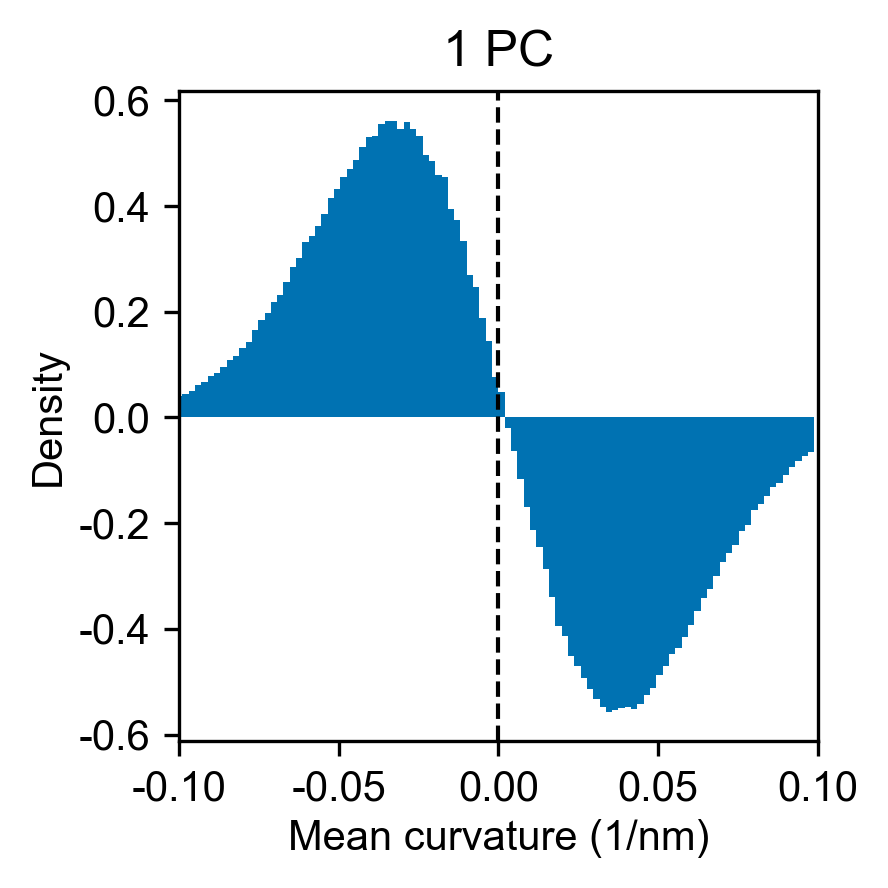

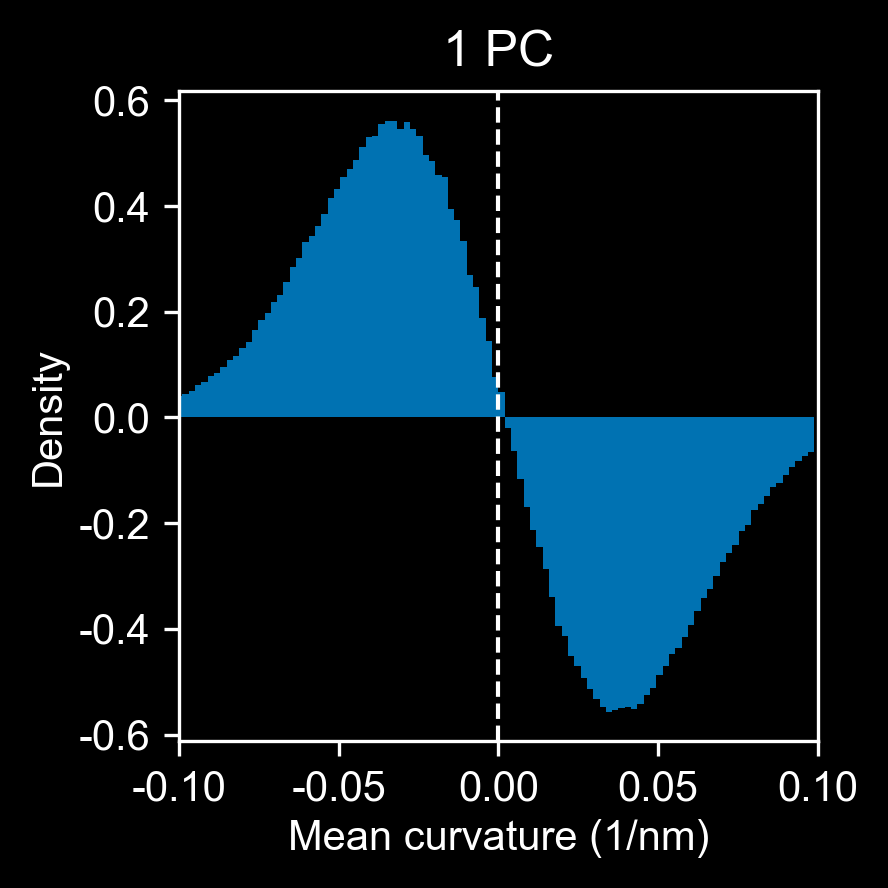

1 Overall mean: 0.002261808074561688; PE mean 0.0037789871539560932


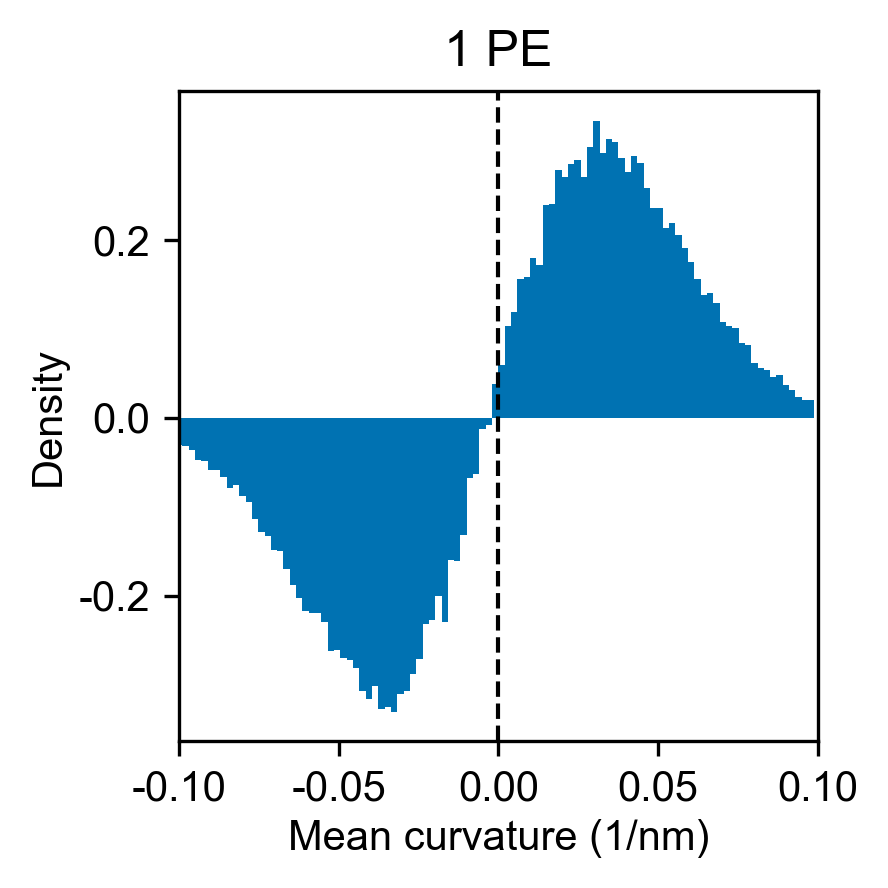

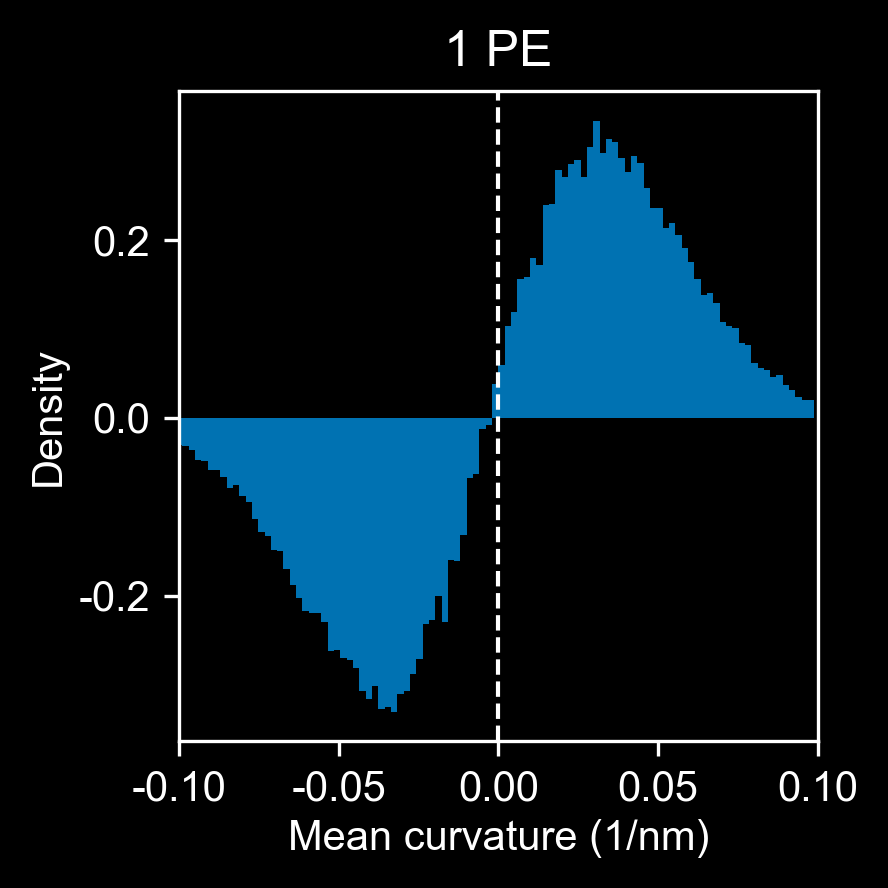

1 Overall mean: 0.002261808074561688; CDL mean 0.01219562336374424


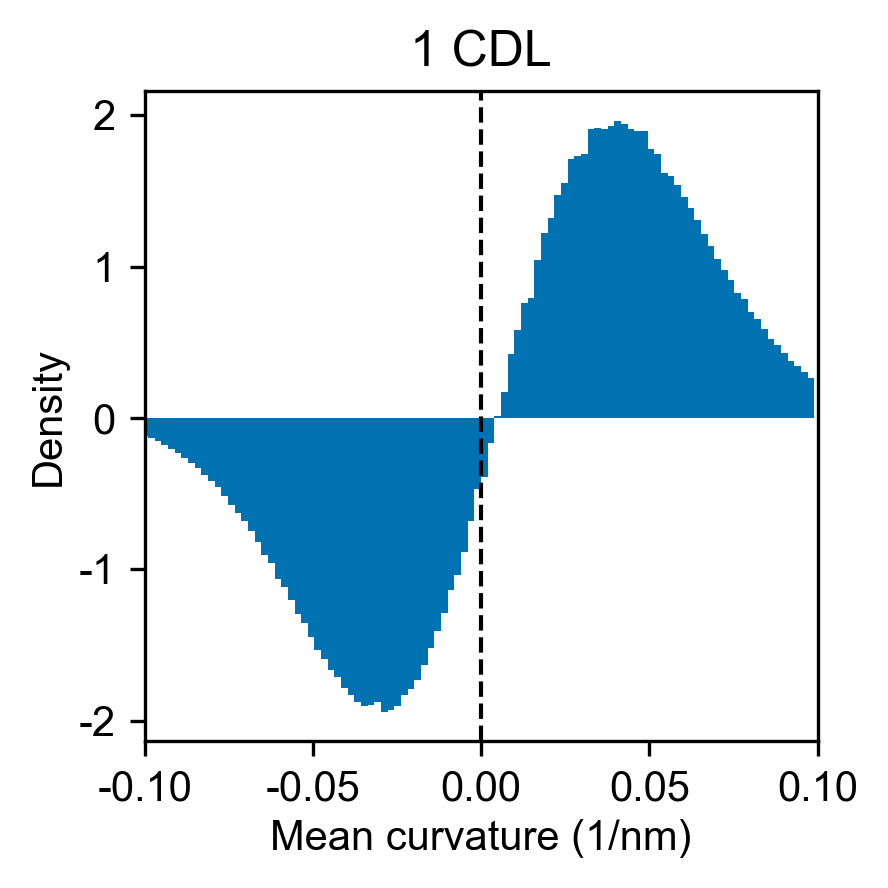

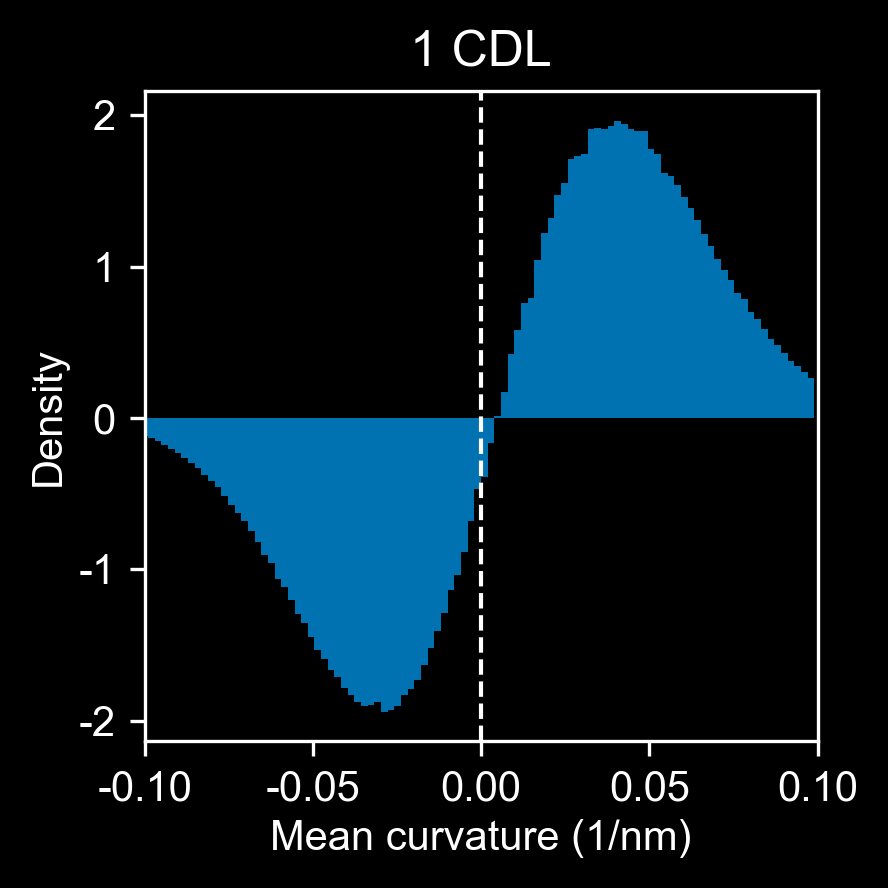

2 Overall mean: 0.002226541334229931; PC mean -0.0009355962844656776


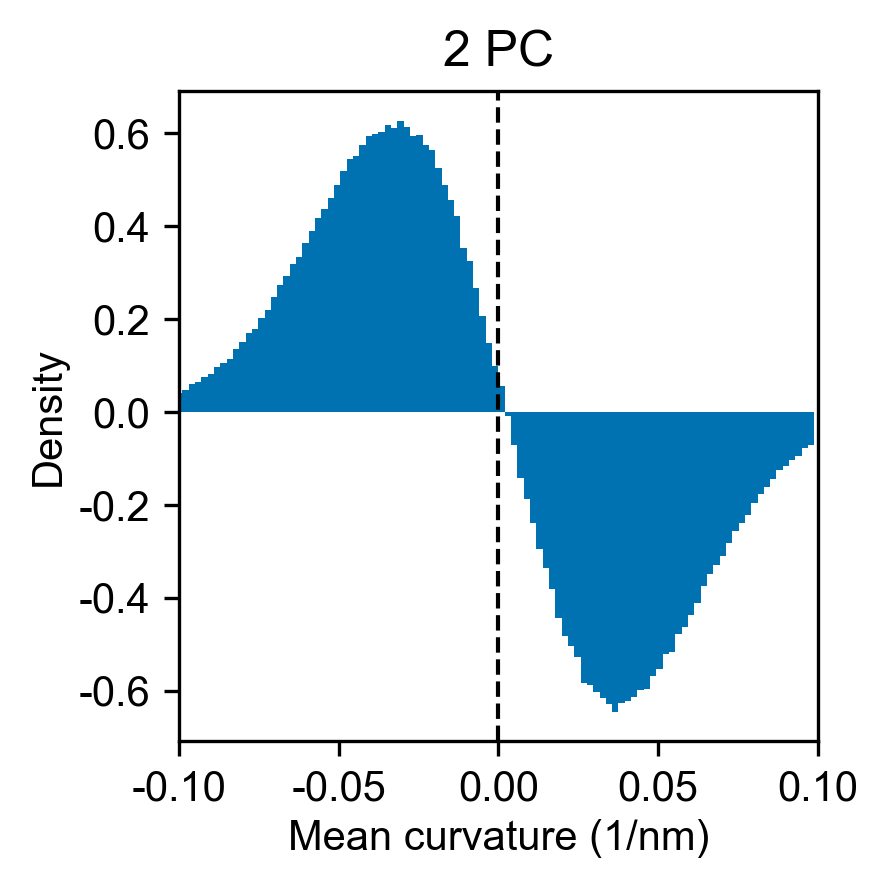

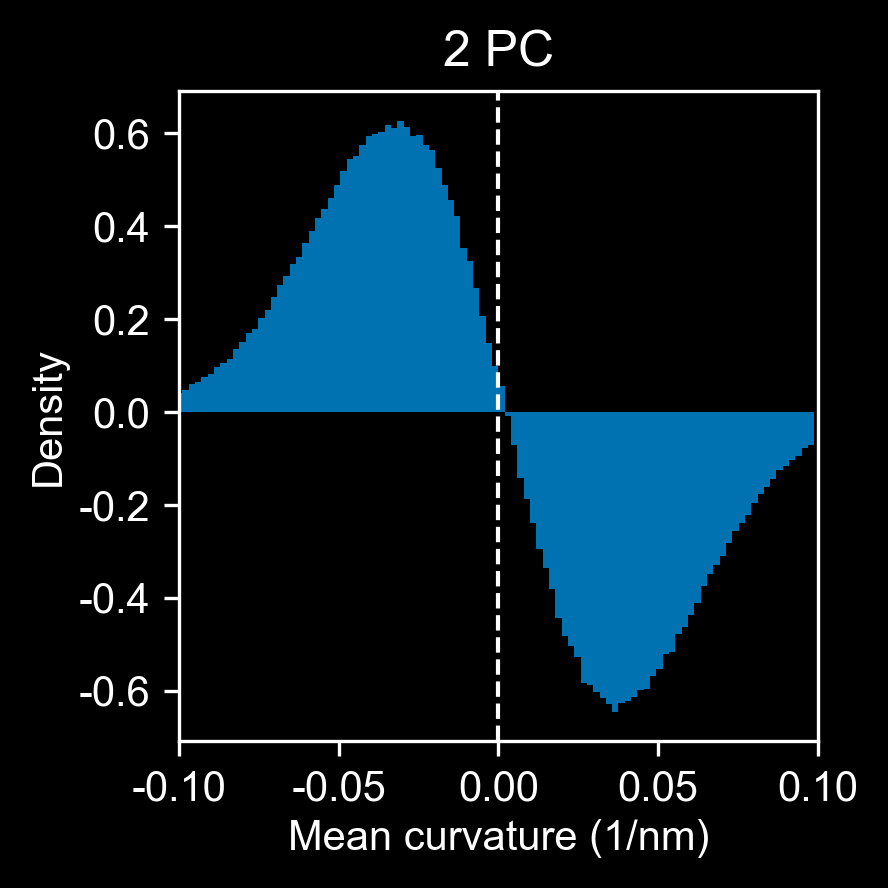

2 Overall mean: 0.002226541334229931; PE mean 0.003347573092968328


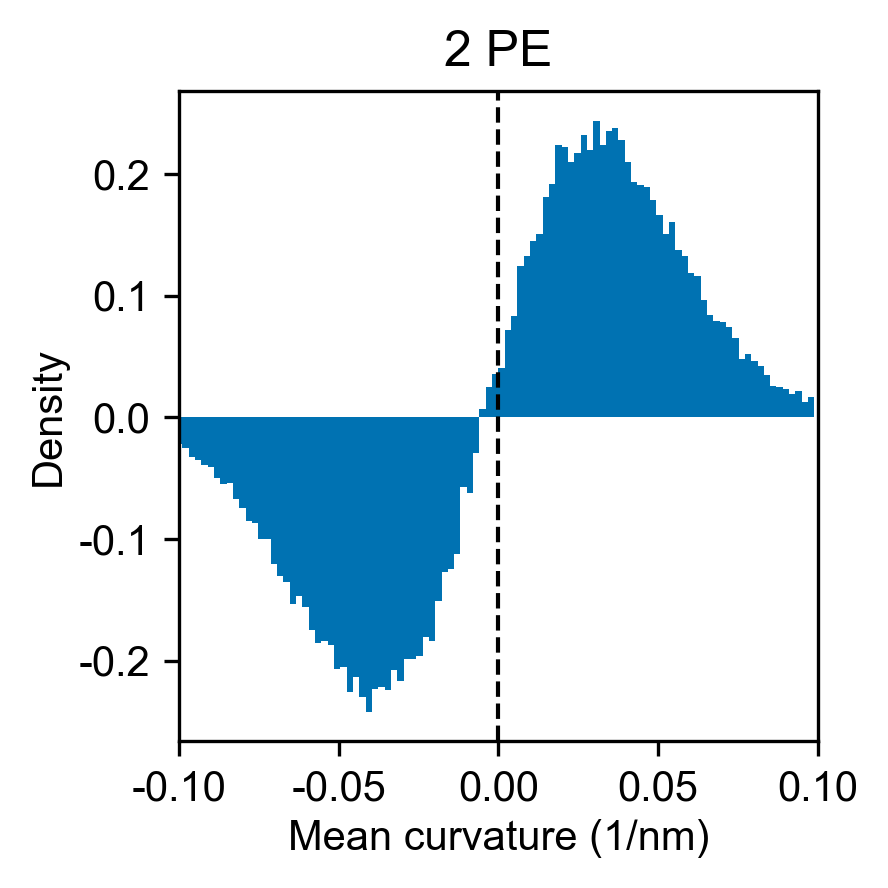

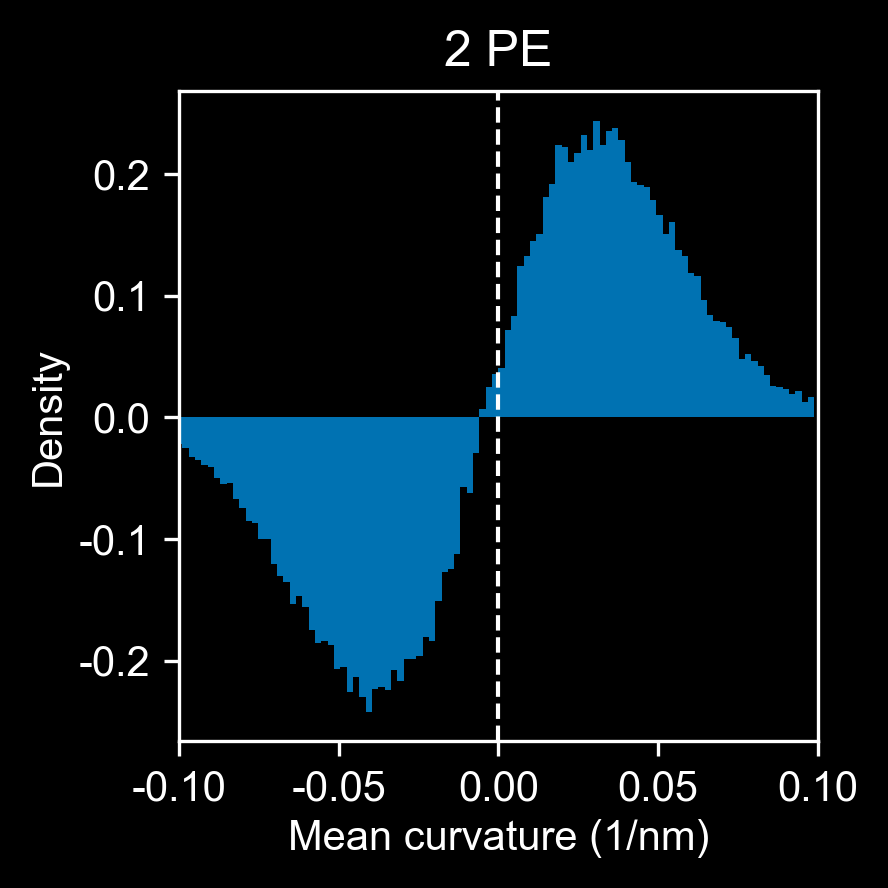

2 Overall mean: 0.002226541334229931; CDL mean 0.01219952464404505


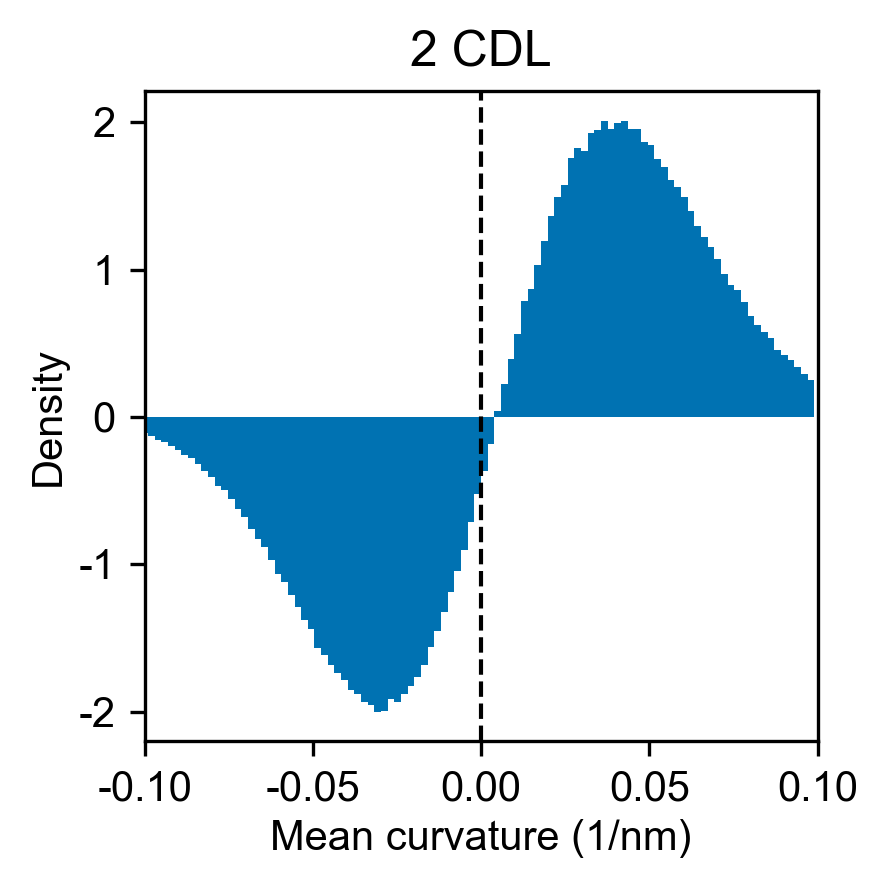

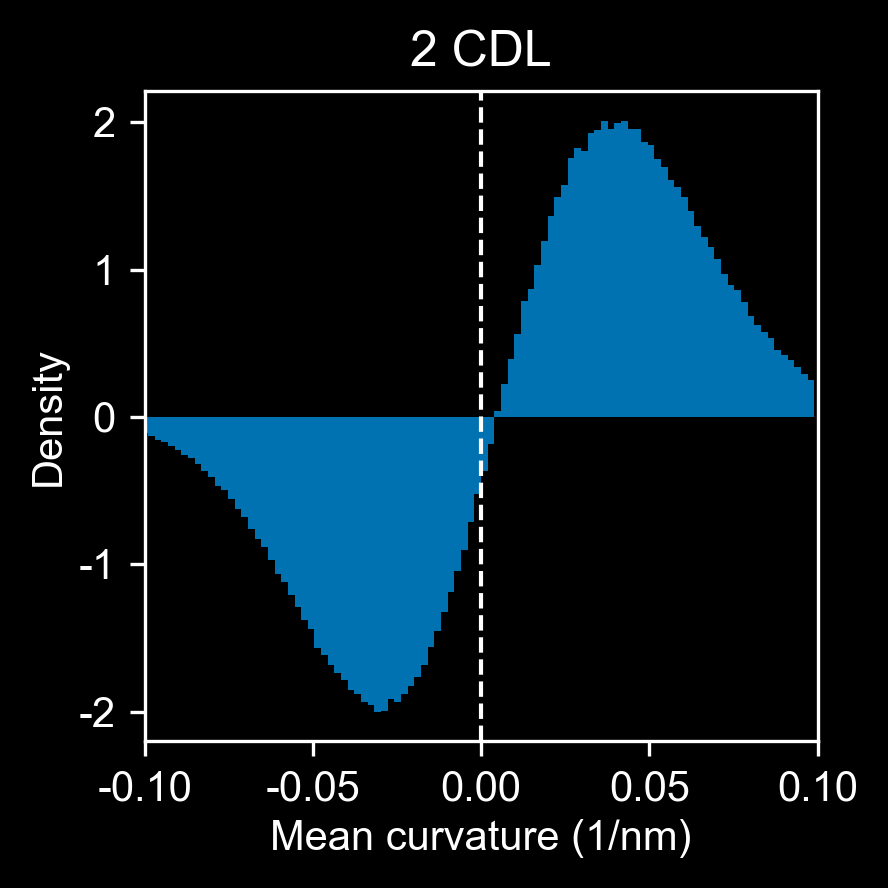

3 Overall mean: 0.00209896589240203; PC mean -0.0006310653106858711


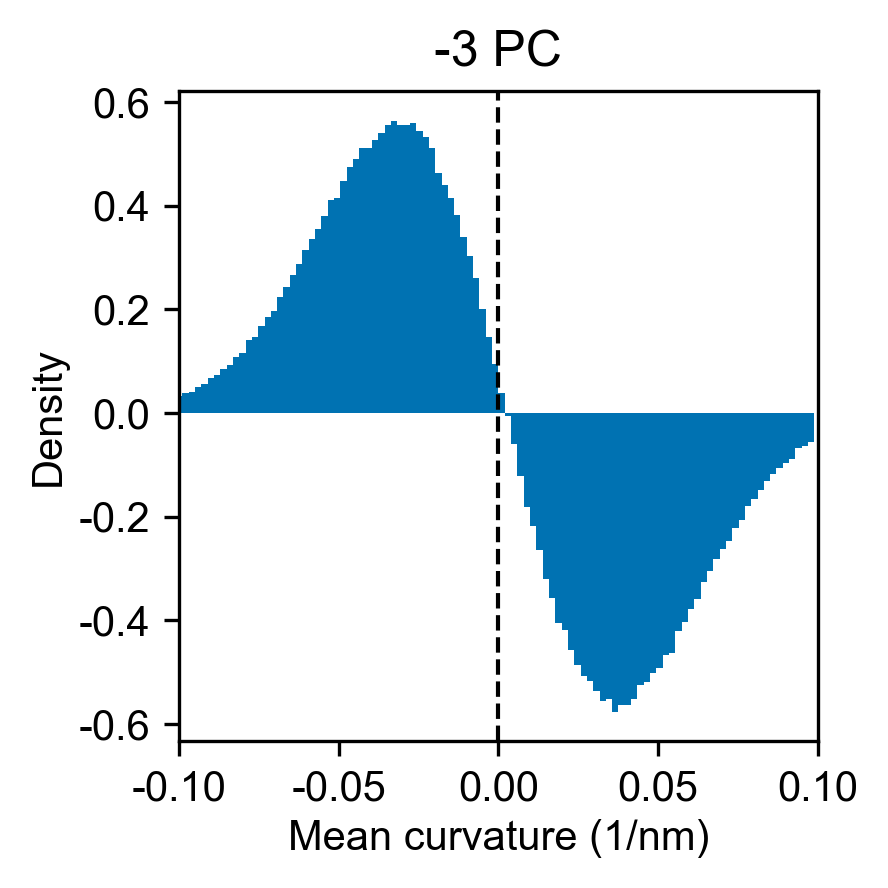

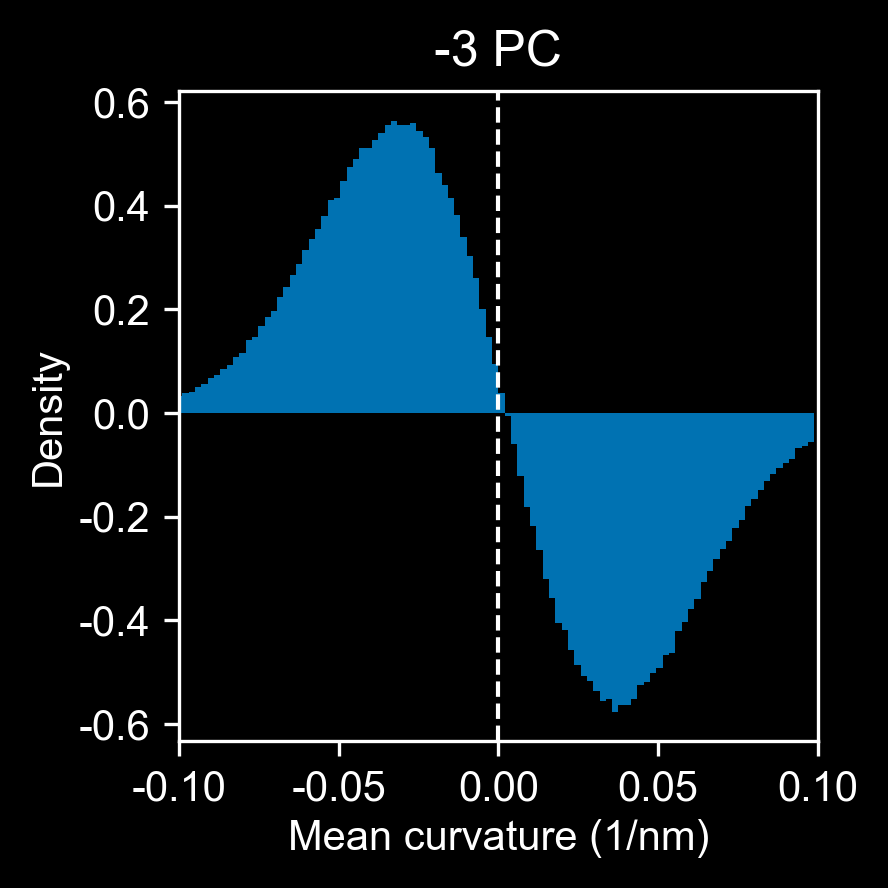

3 Overall mean: 0.00209896589240203; PE mean 0.00341697326010026


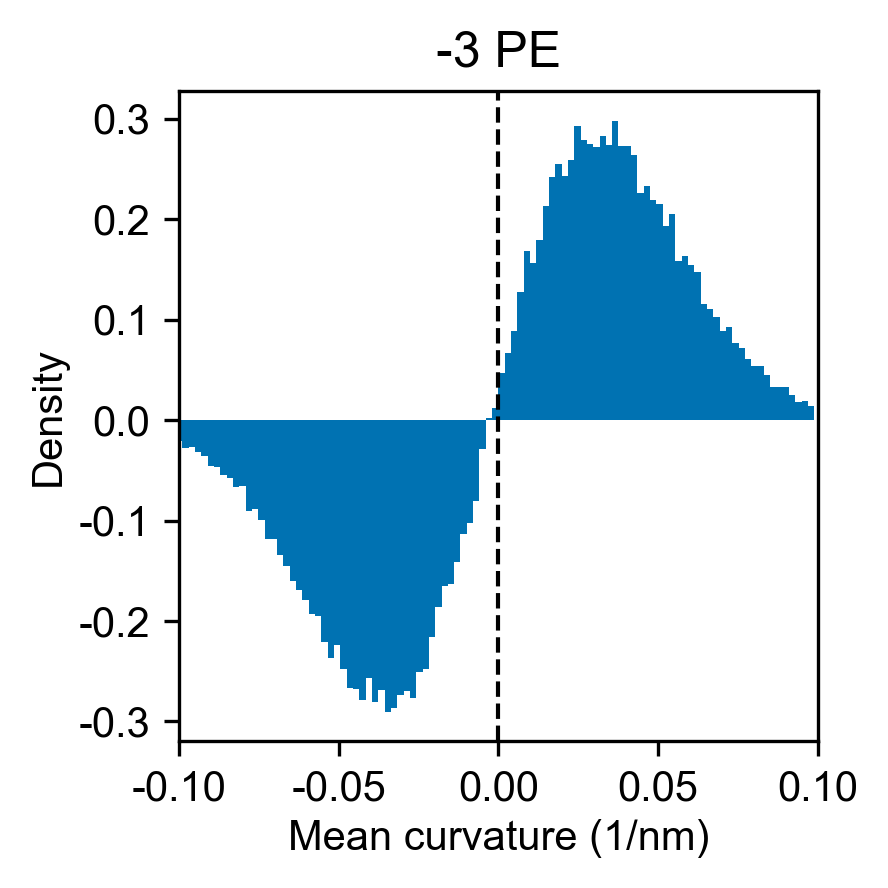

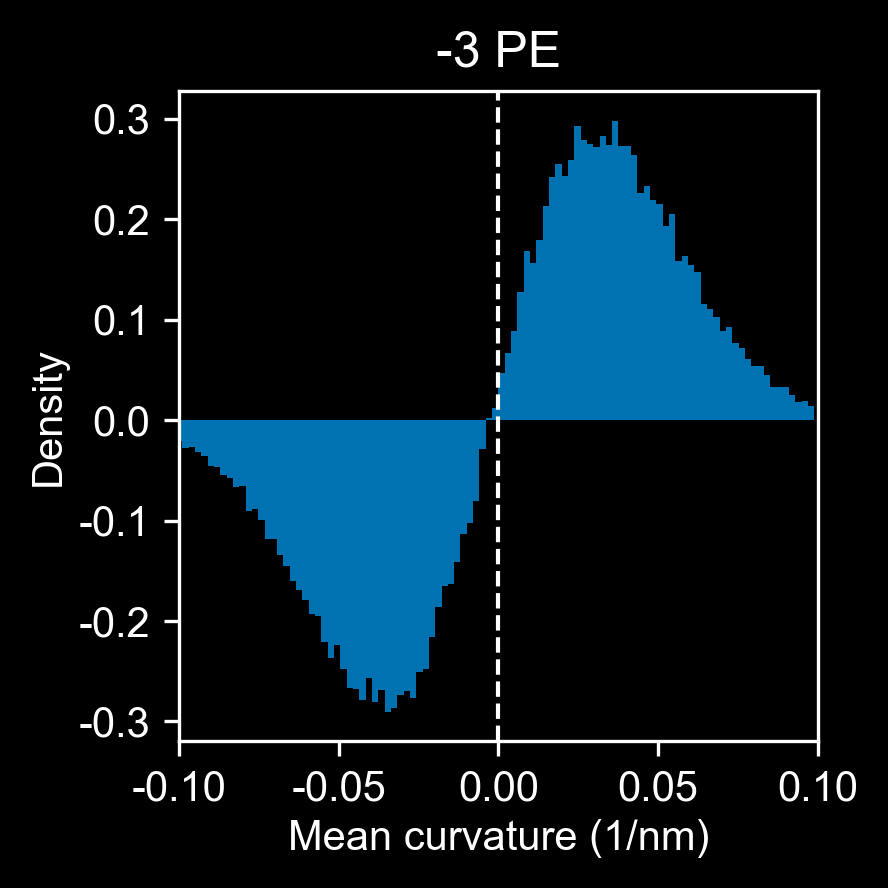

3 Overall mean: 0.00209896589240203; CDL mean 0.011310431801862506


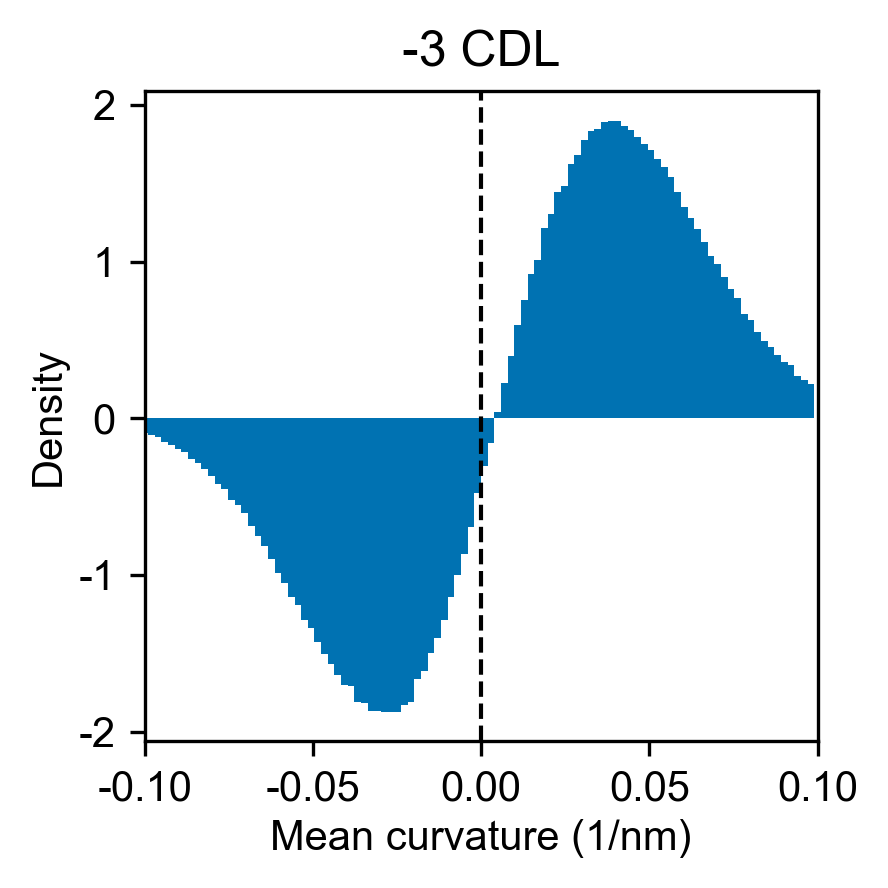

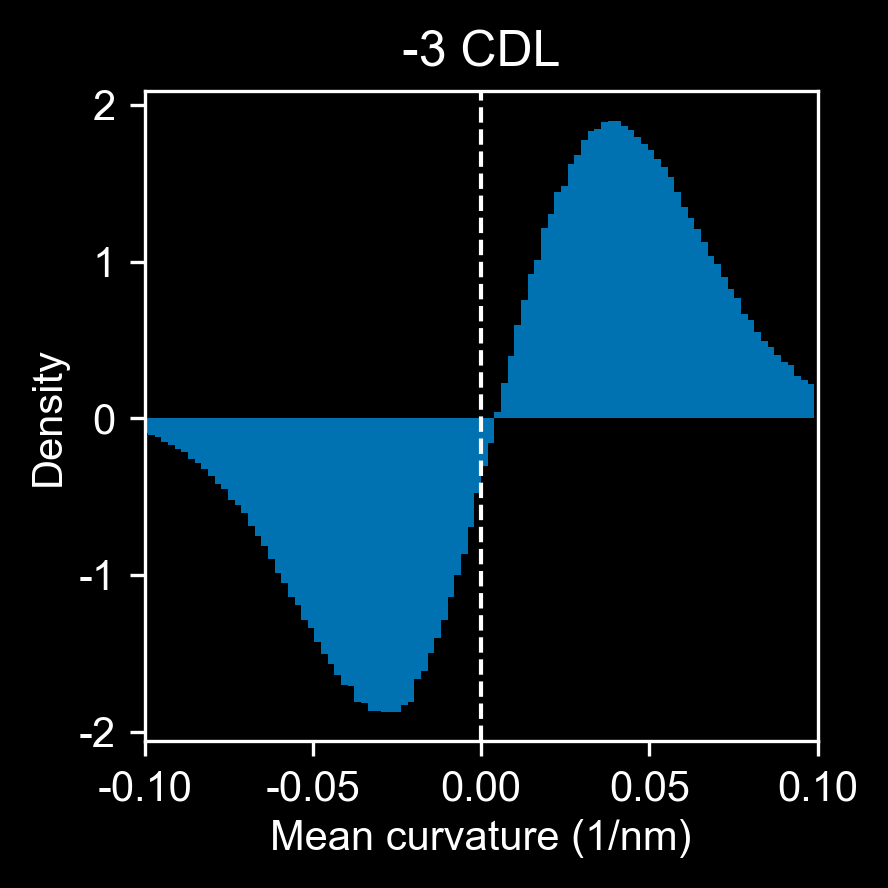

4 Overall mean: 0.0016949382257829726; PC mean 0.000881417856951318


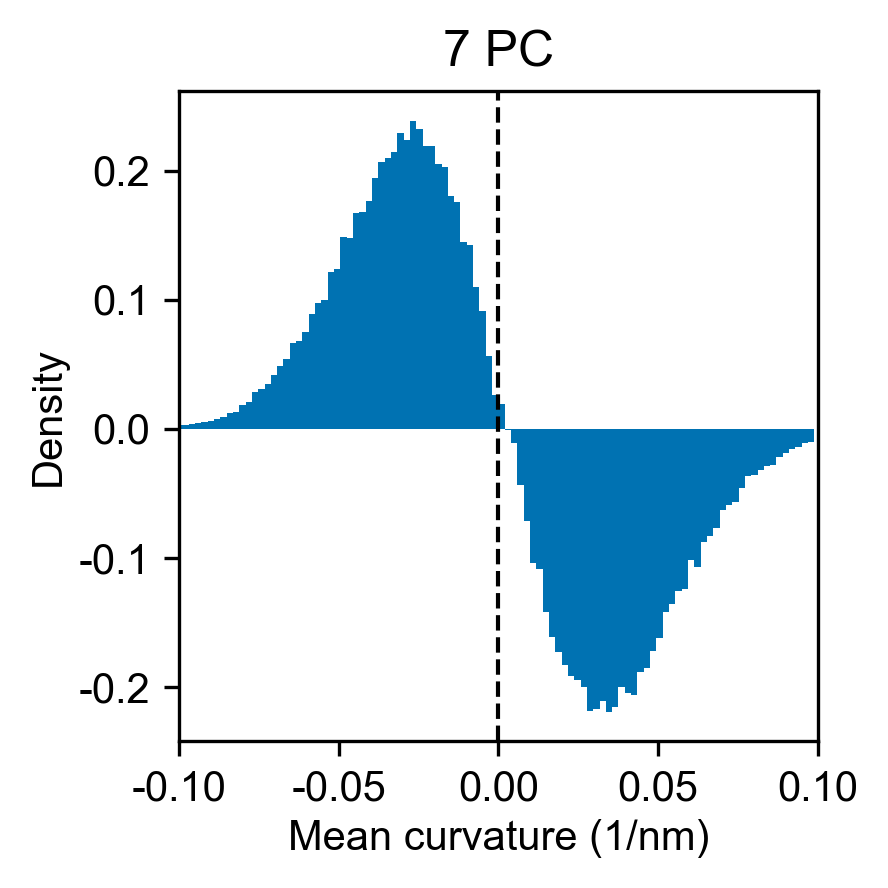

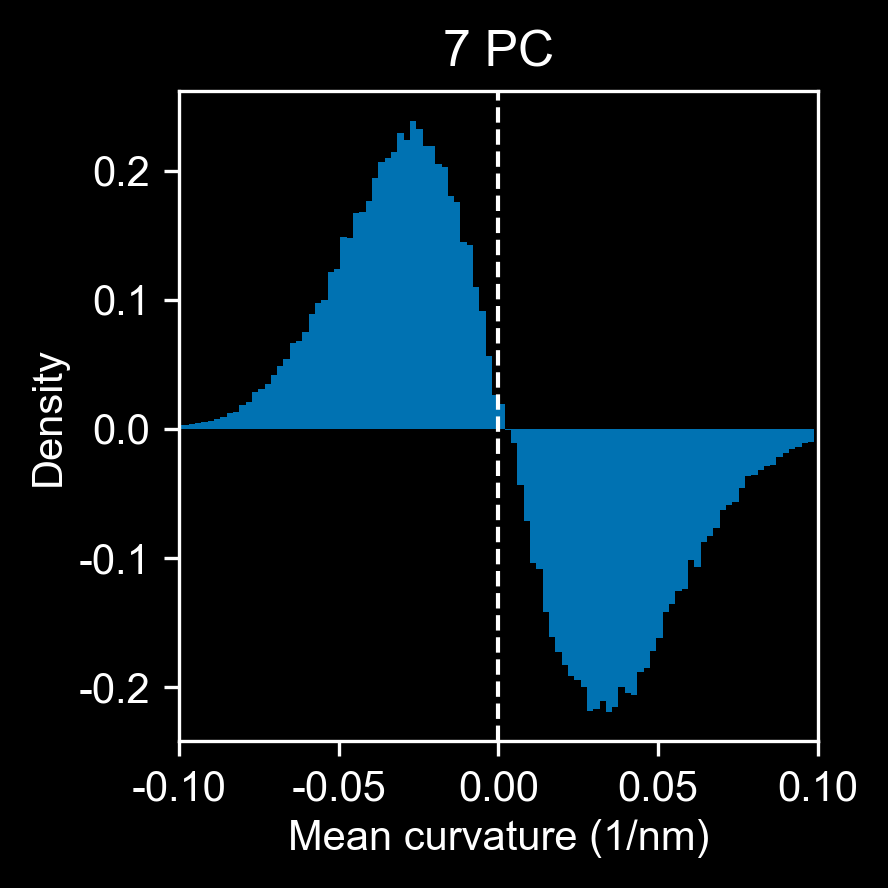

4 Overall mean: 0.0016949382257829726; PE mean 0.0034138498721684785


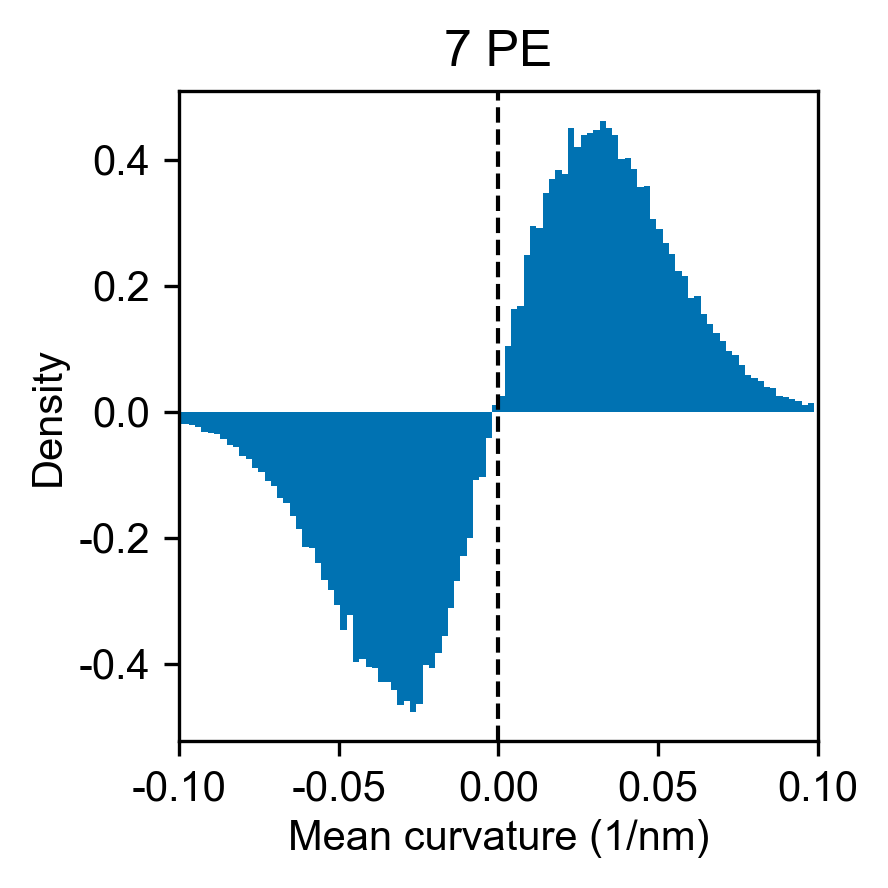

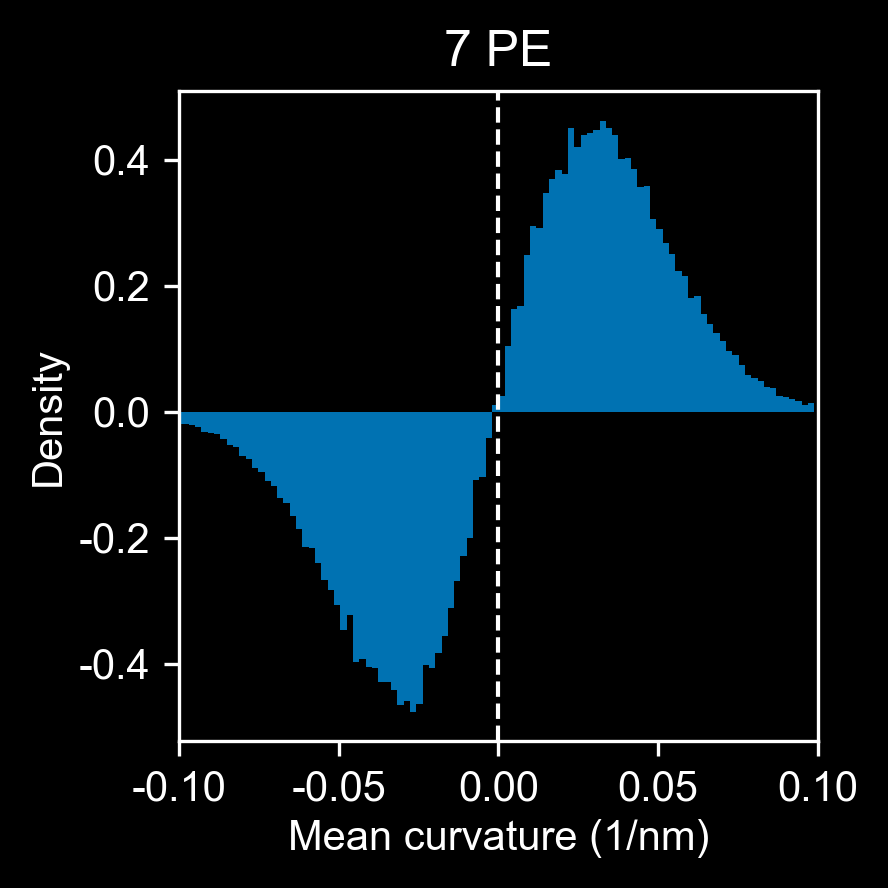

4 Overall mean: 0.0016949382257829726; PG mean 0.002221845762601727


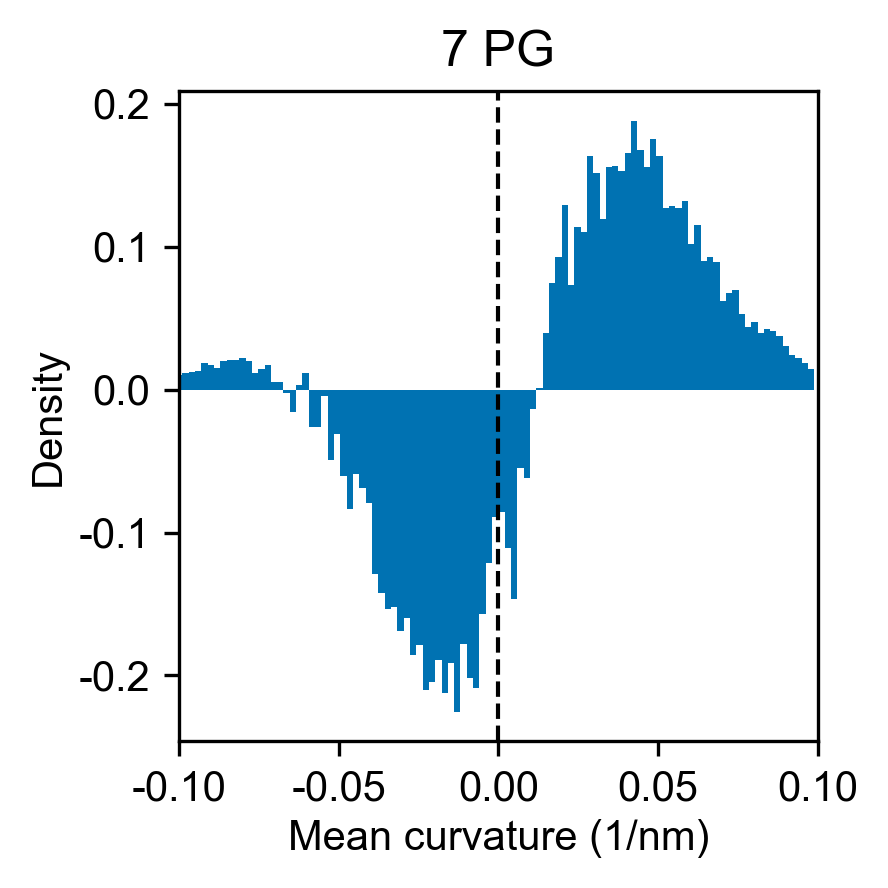

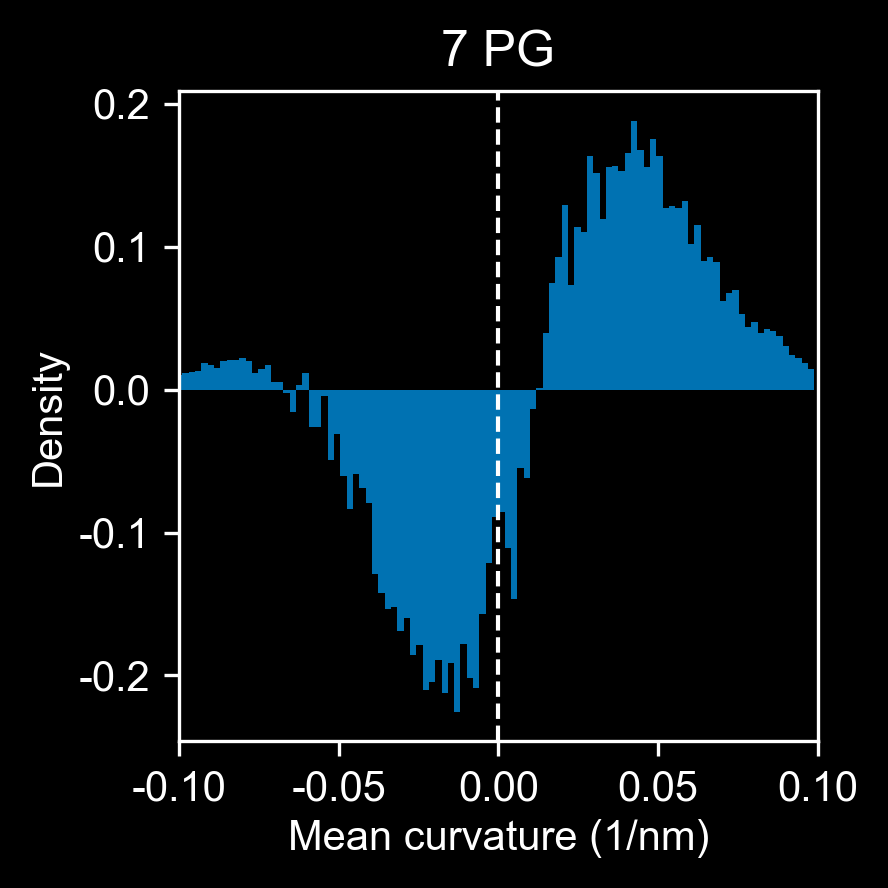

5 Overall mean: 0.0016905304826738252; PC mean 0.0006735239618793699


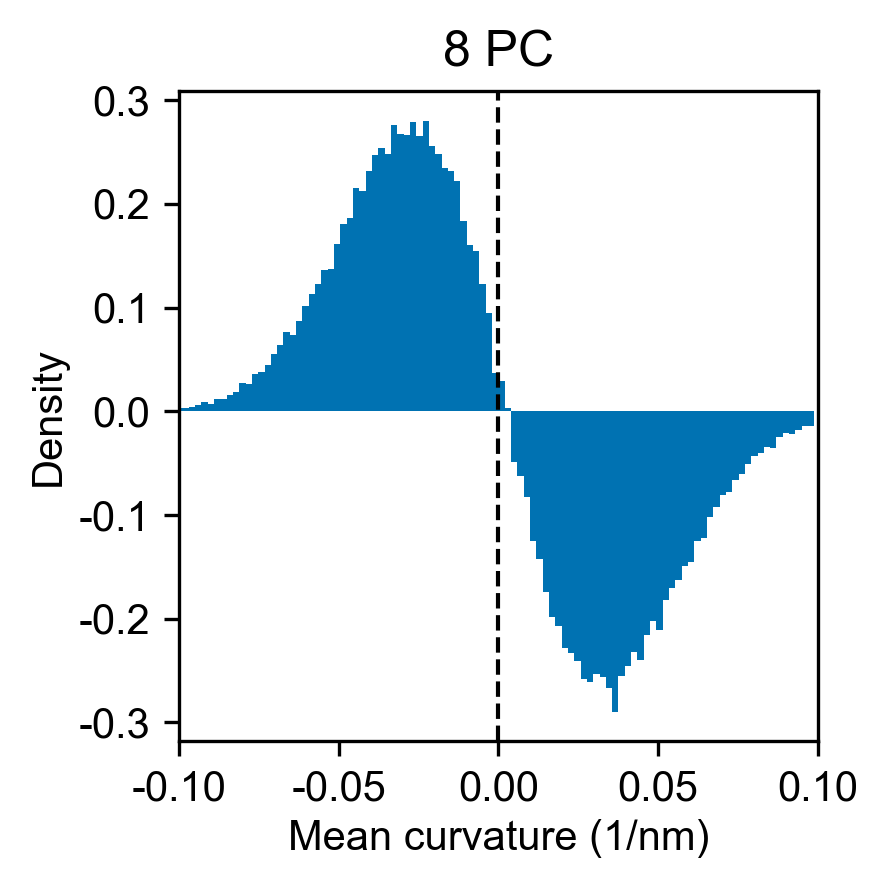

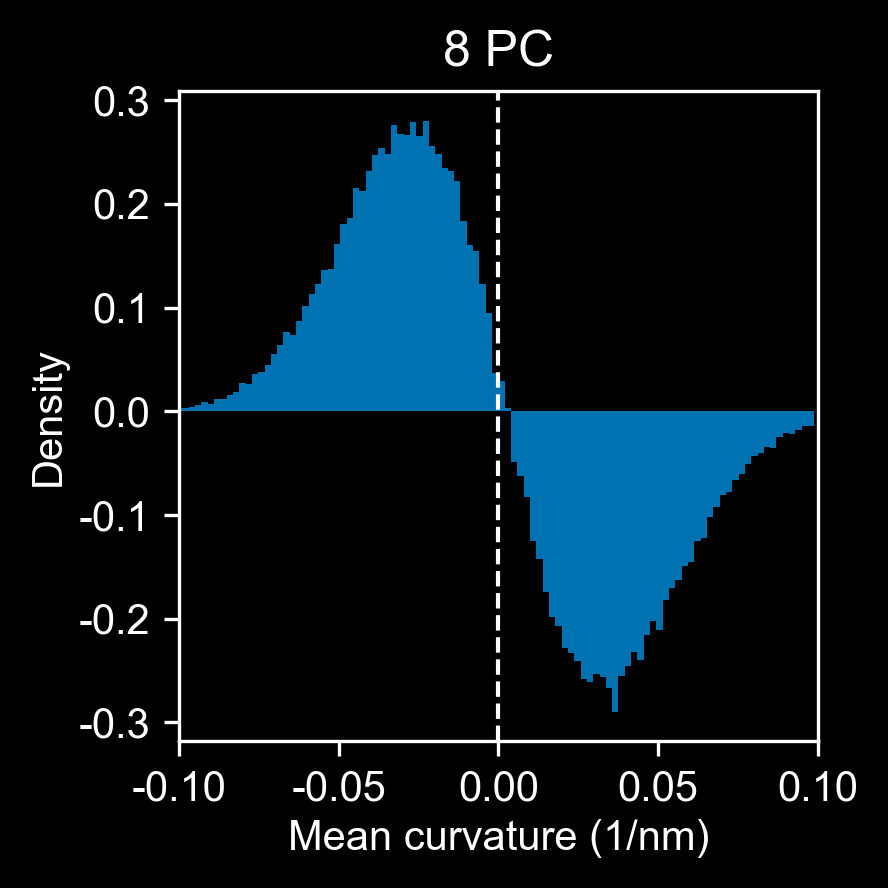

5 Overall mean: 0.0016905304826738252; PE mean 0.0031920871316017682


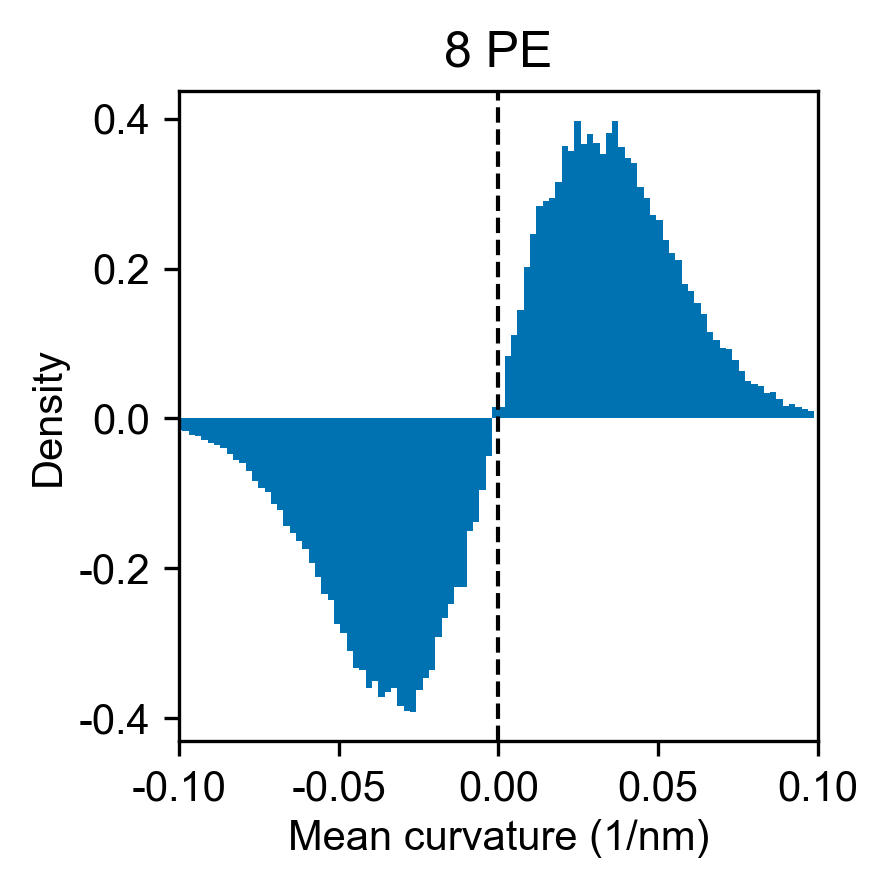

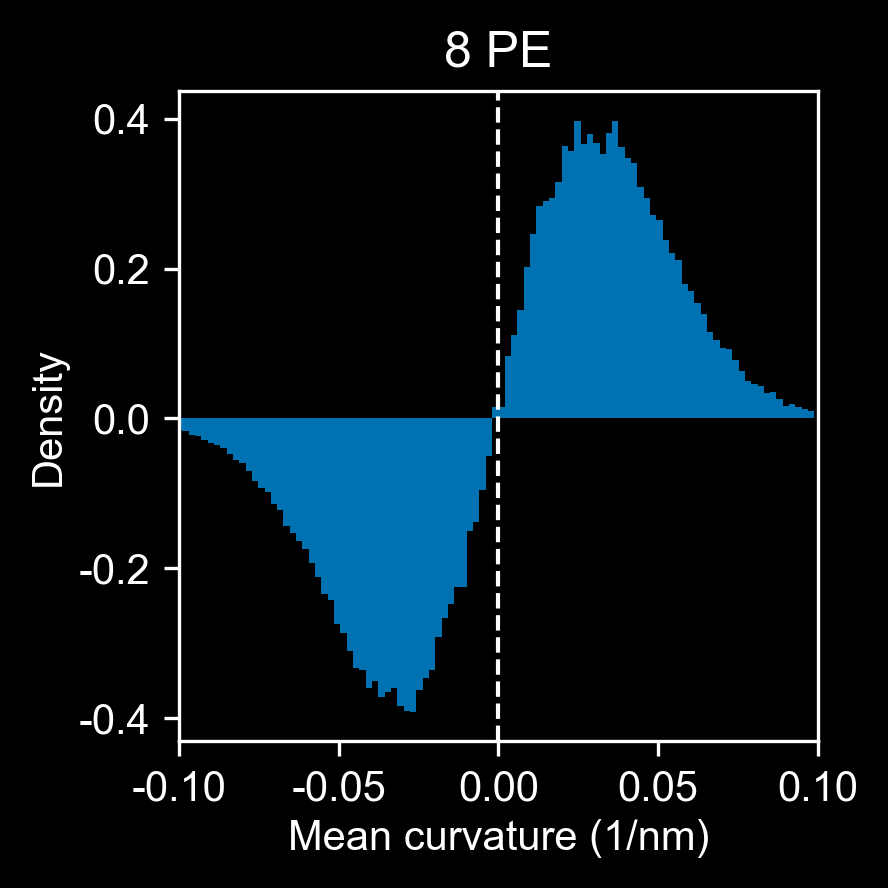

5 Overall mean: 0.0016905304826738252; PG mean 0.0019355009721117292


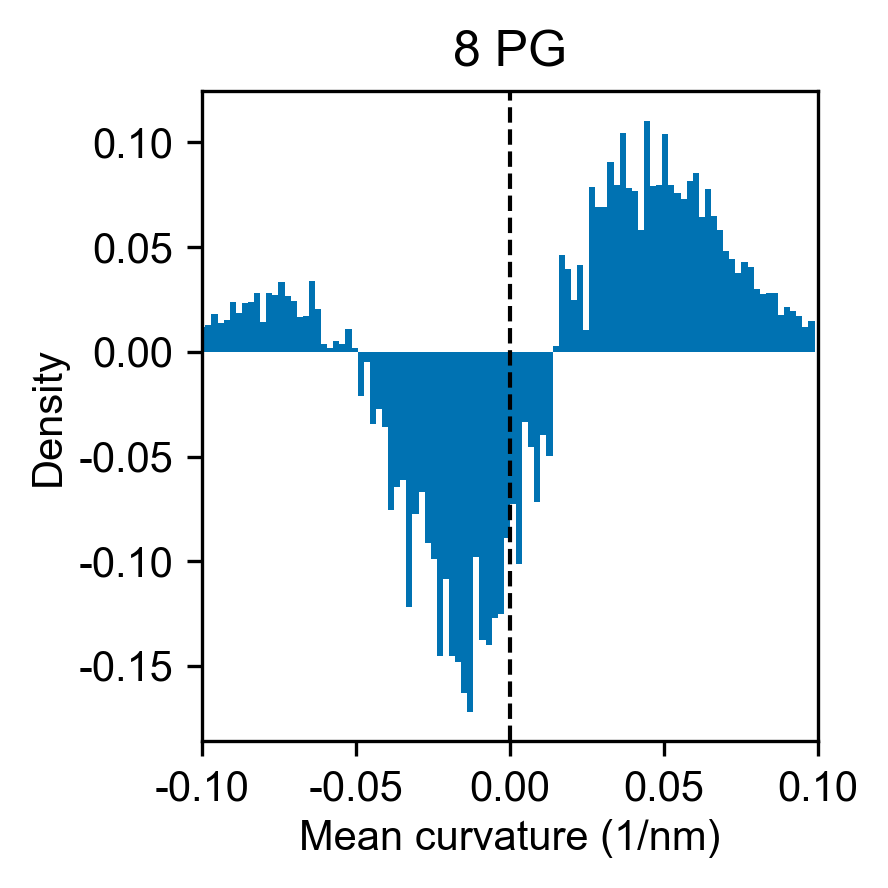

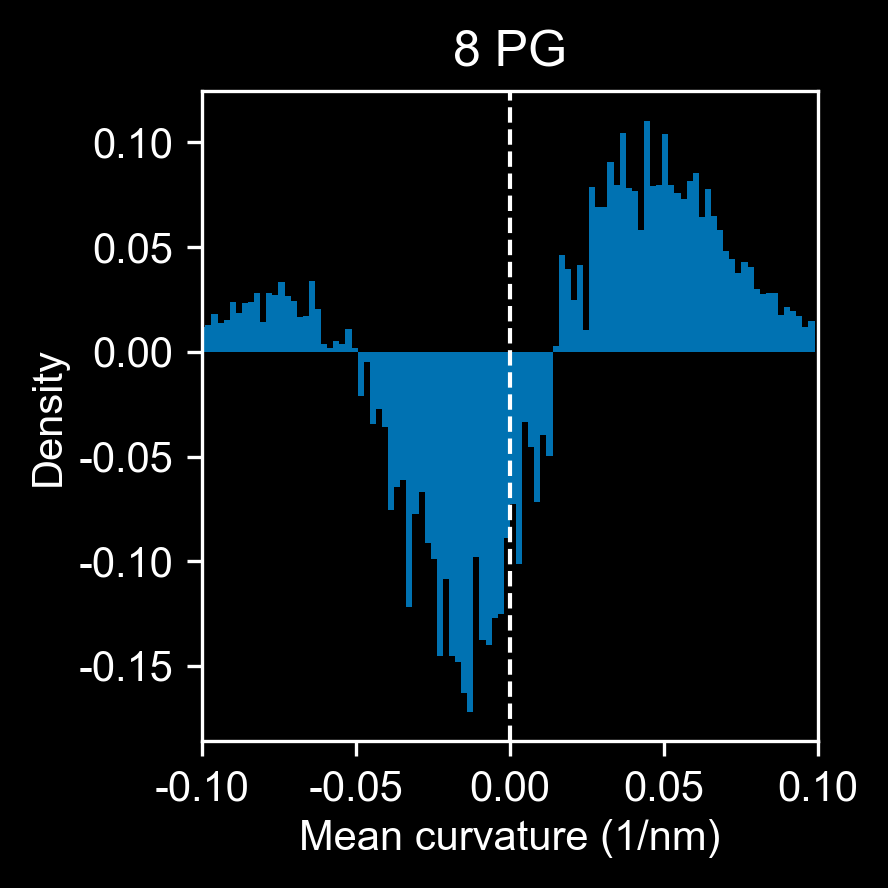

6 Overall mean: 0.0016392958764083788; PC mean 0.0006140525415169179


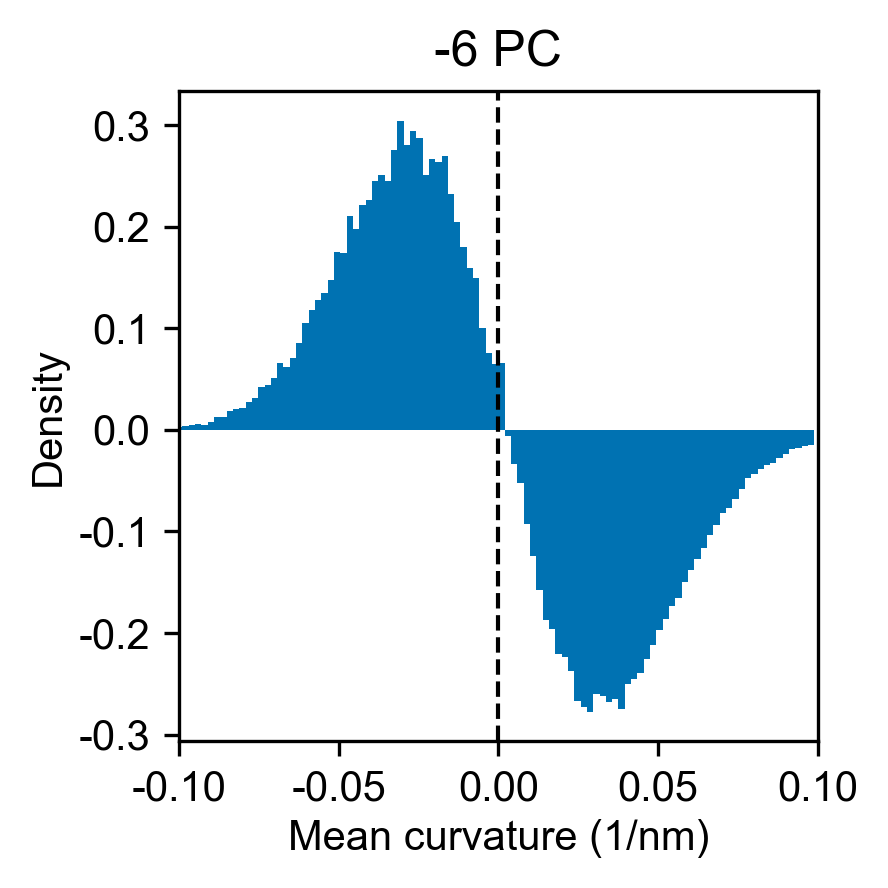

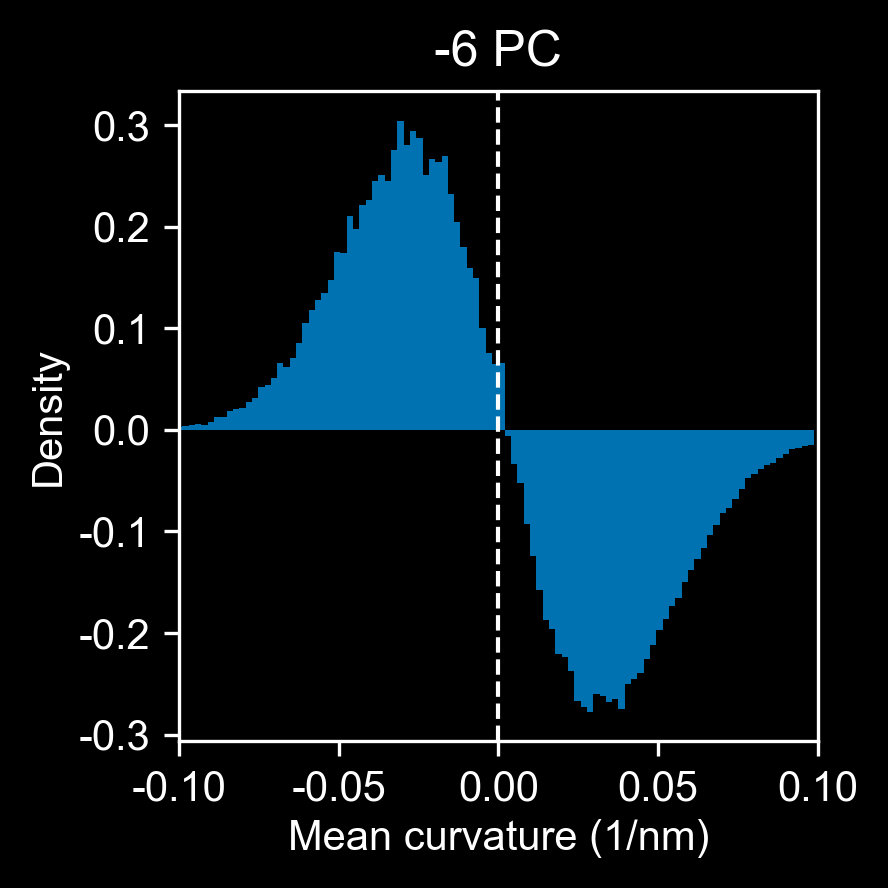

6 Overall mean: 0.0016392958764083788; PE mean 0.0031370484377238796


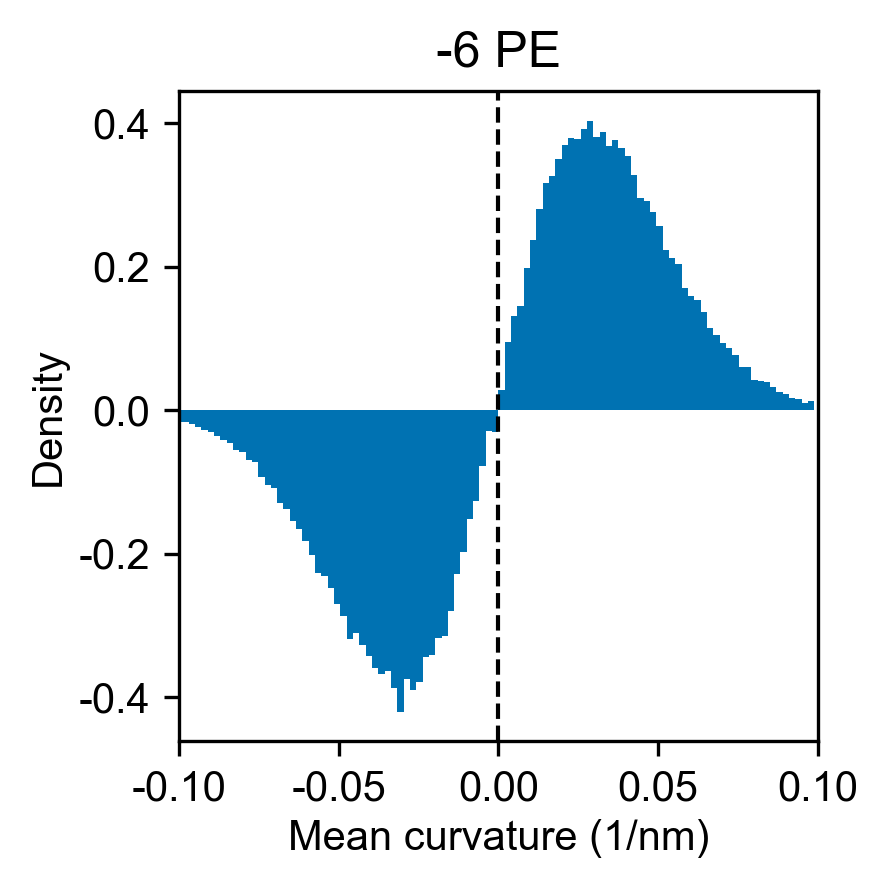

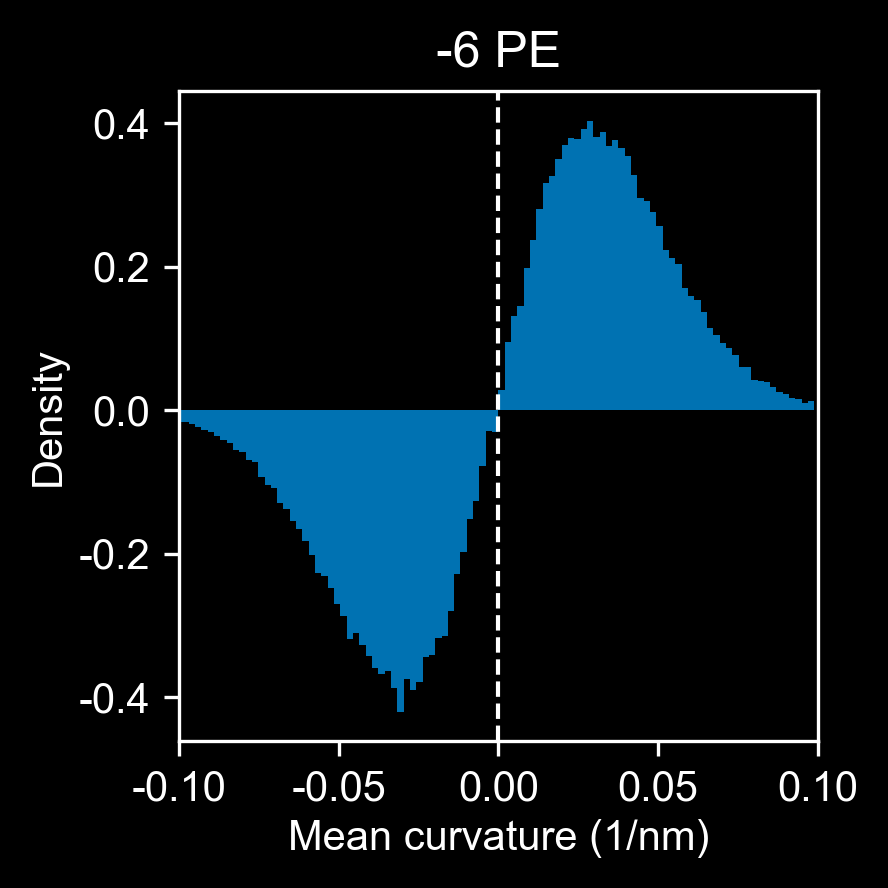

6 Overall mean: 0.0016392958764083788; PG mean 0.001908976483681053


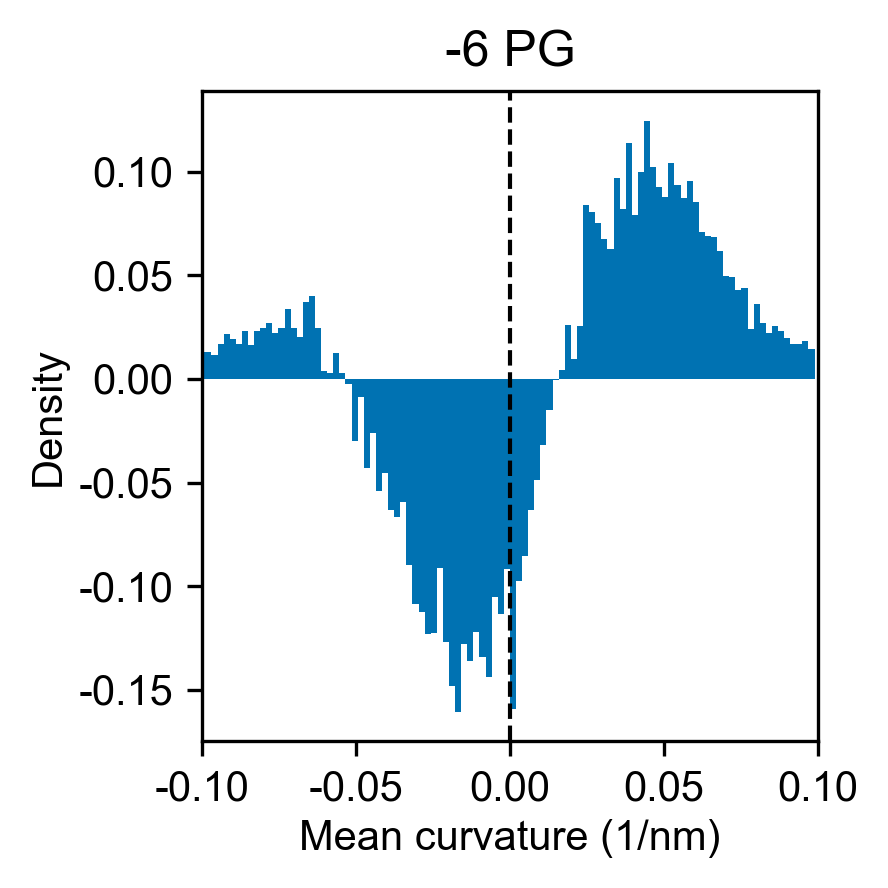

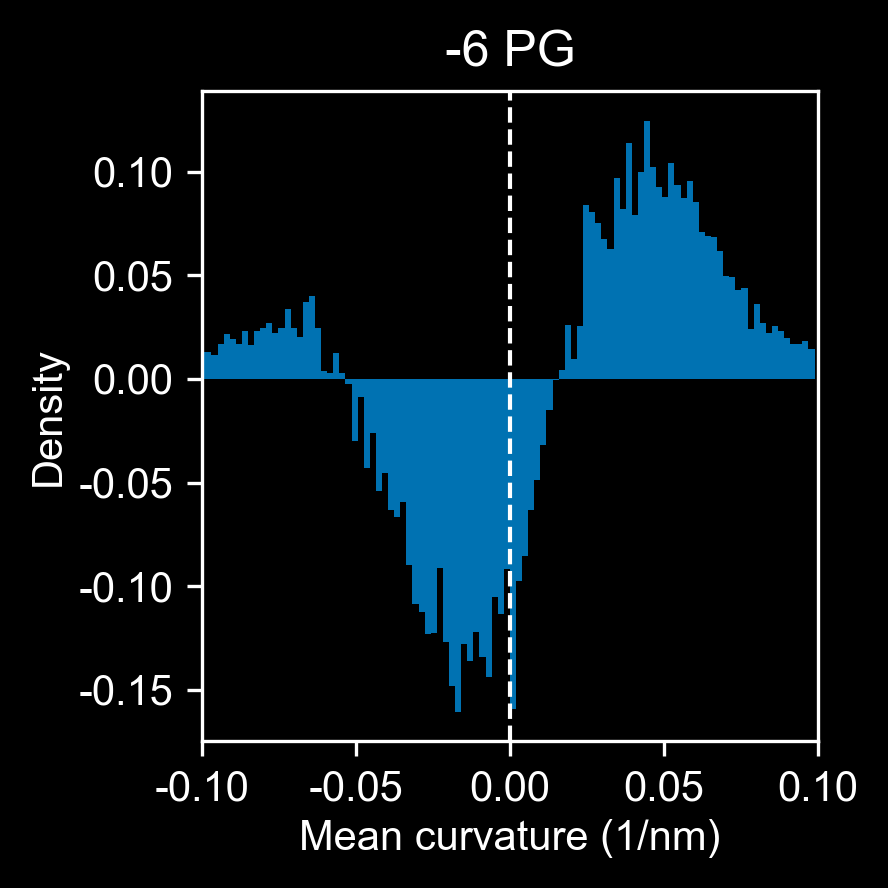

7 Overall mean: 0.005869769499615605; CDL mean 0.005869769499615605


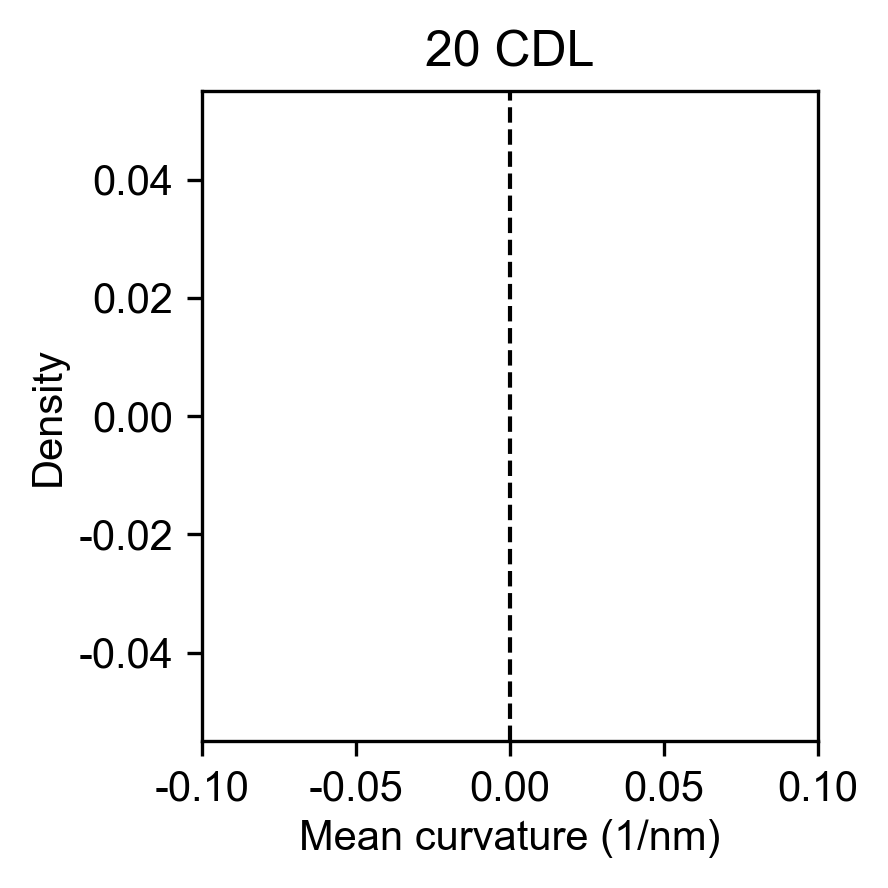

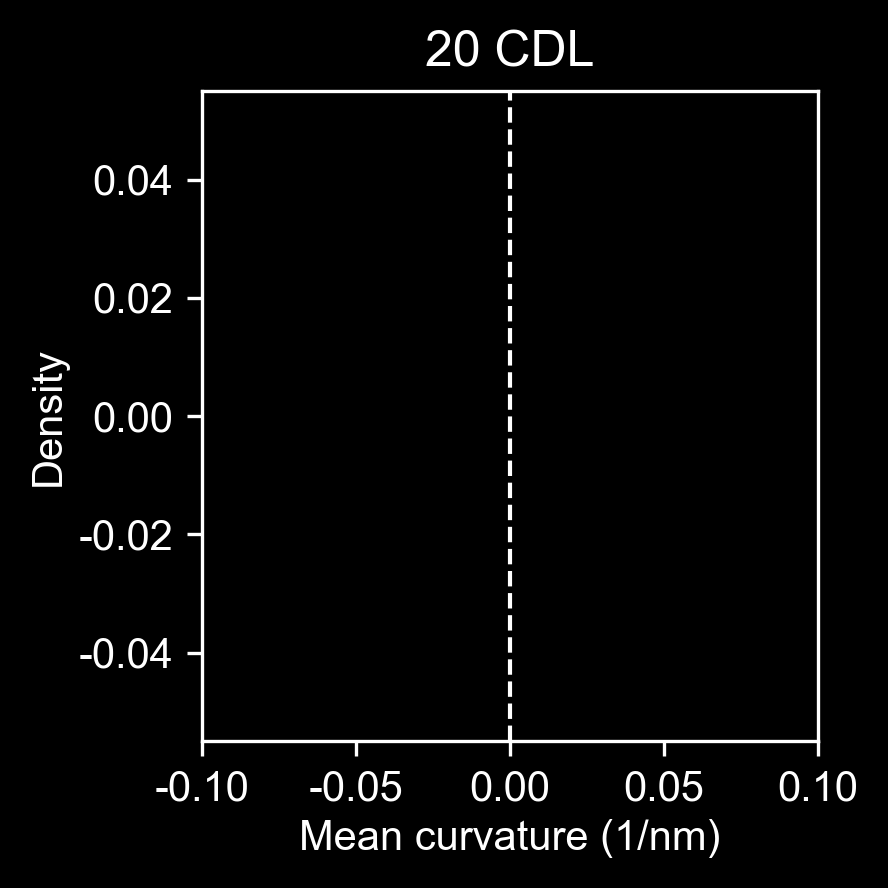

8 Overall mean: 0.002253292604535527; PC mean -0.0018855453630716357


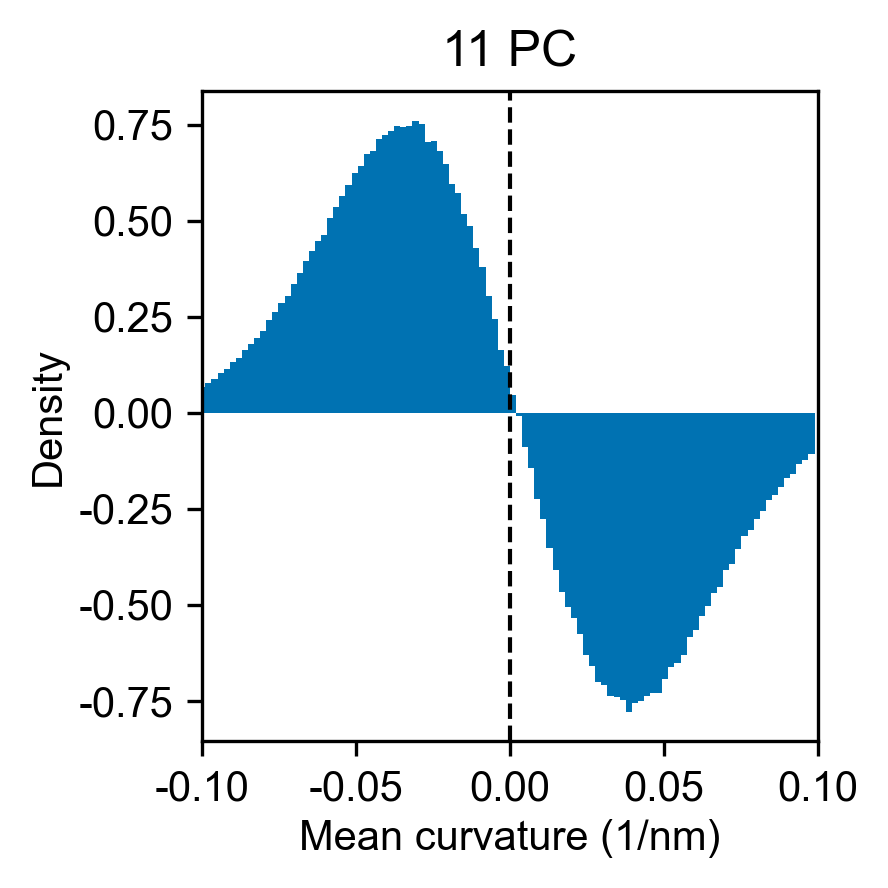

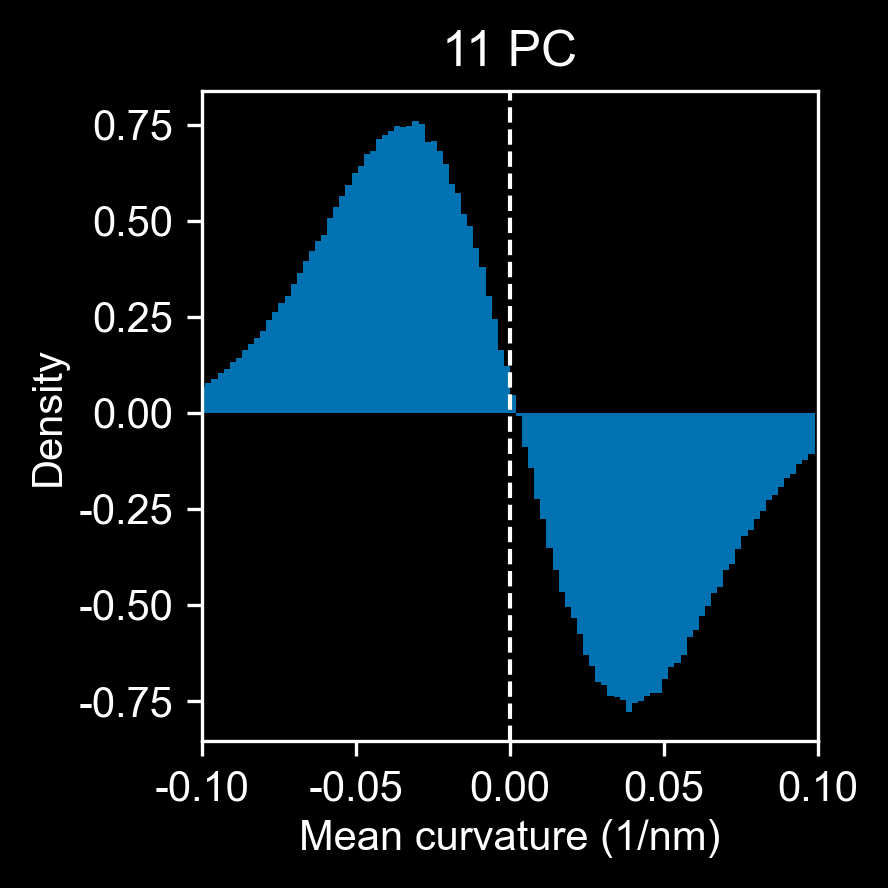

8 Overall mean: 0.002253292604535527; PE mean 0.003268593725134571


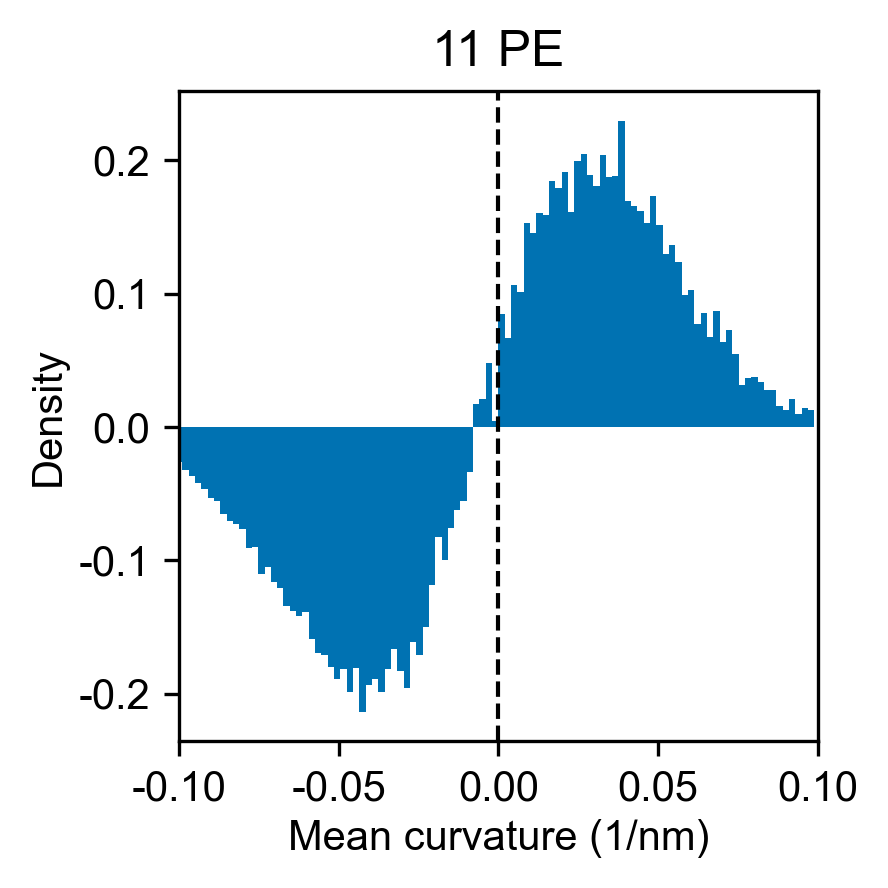

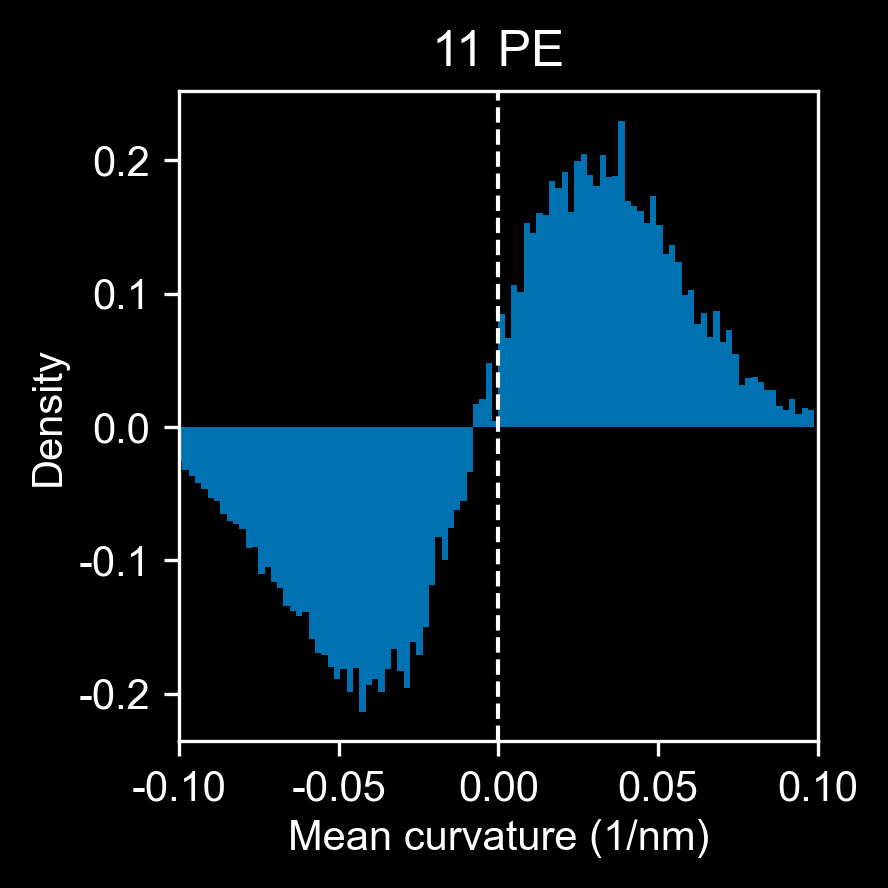

8 Overall mean: 0.002253292604535527; CDL mean 0.01106936716261726


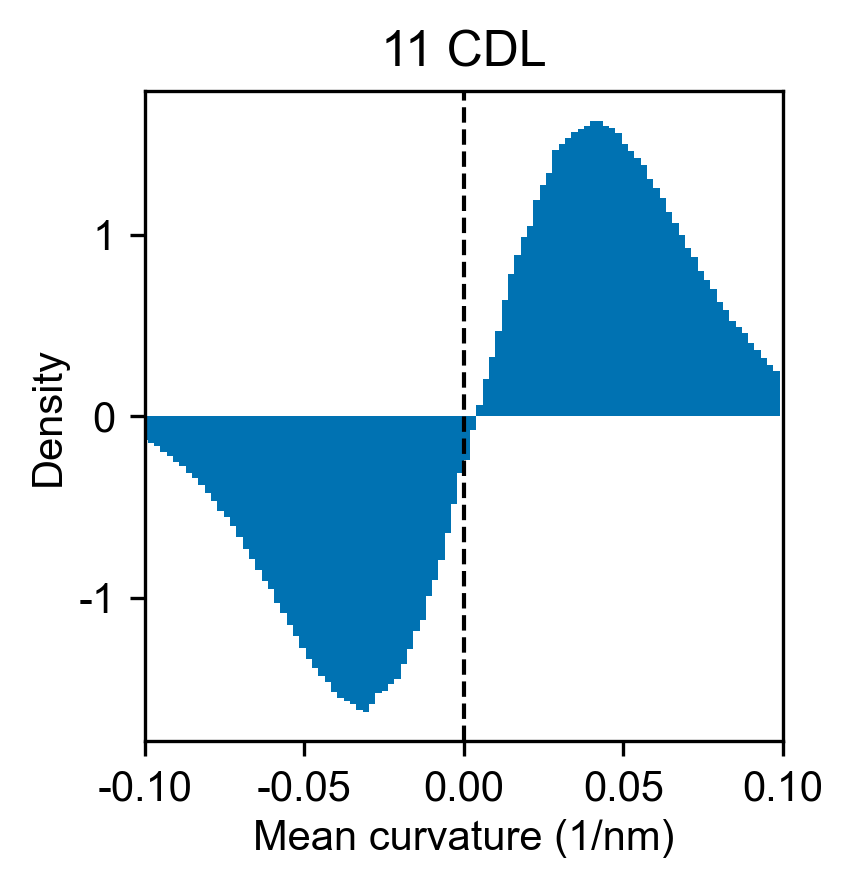

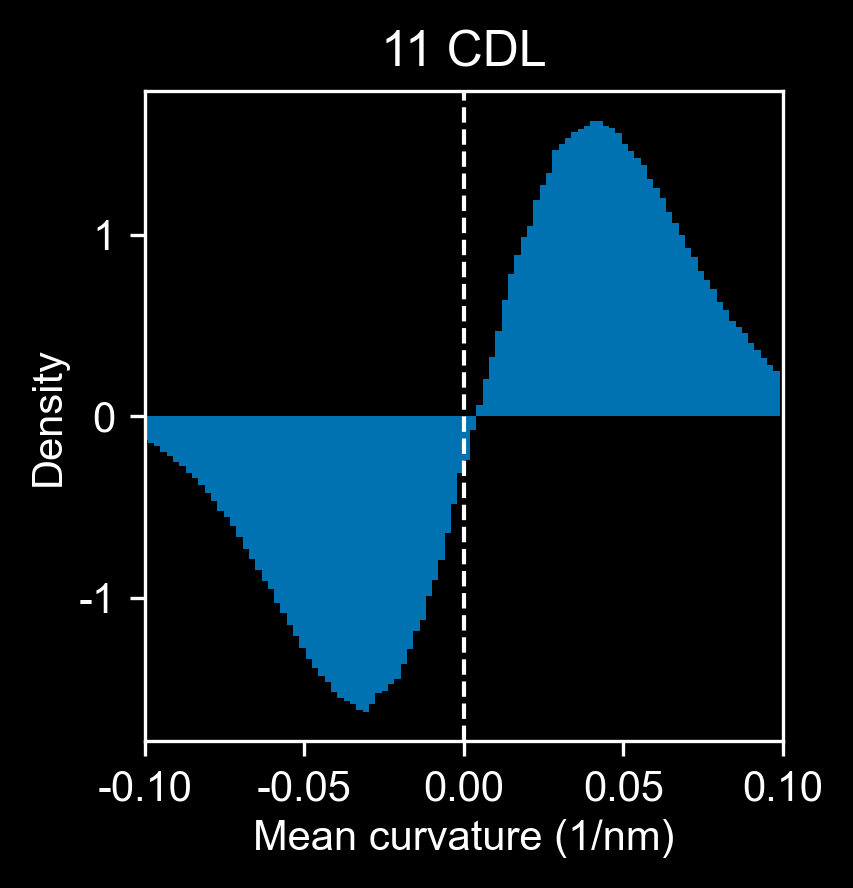

9 Overall mean: 0.0028532831187164072; PC mean -0.0019289041420488613


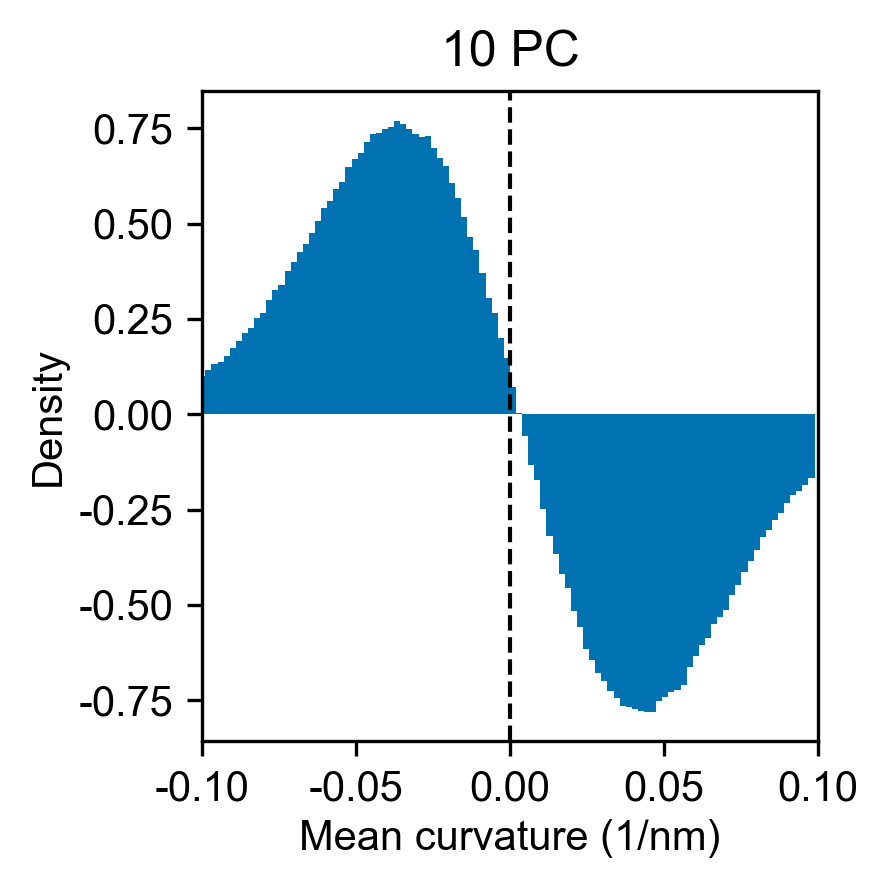

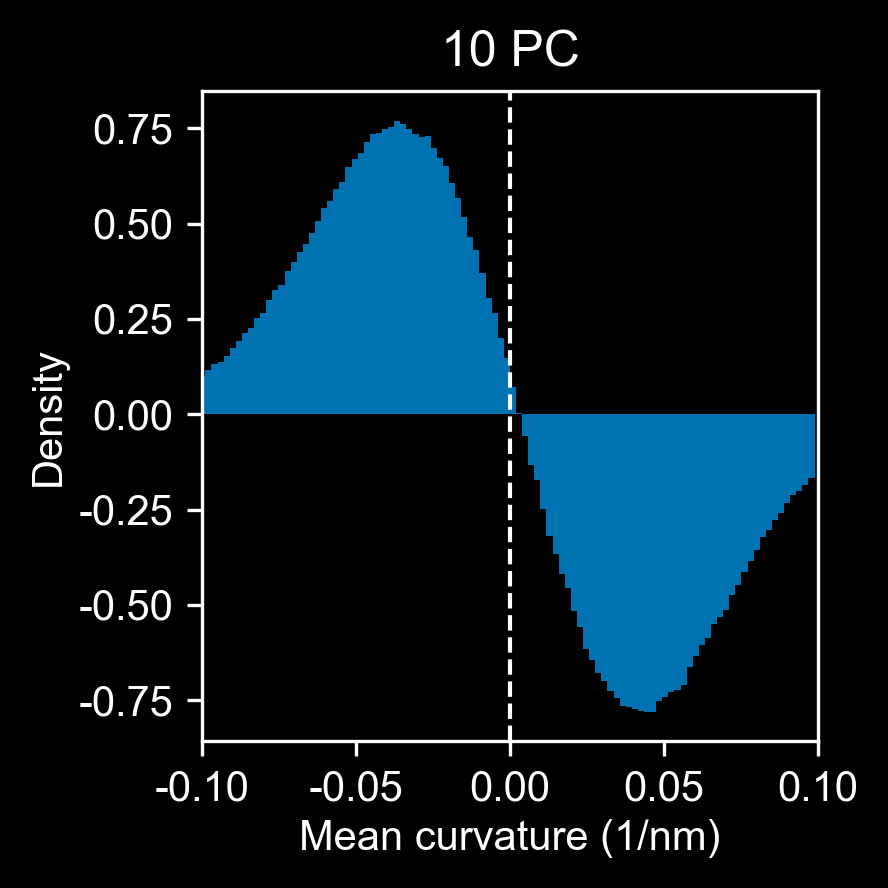

9 Overall mean: 0.0028532831187164072; PE mean 0.0039174272887690775


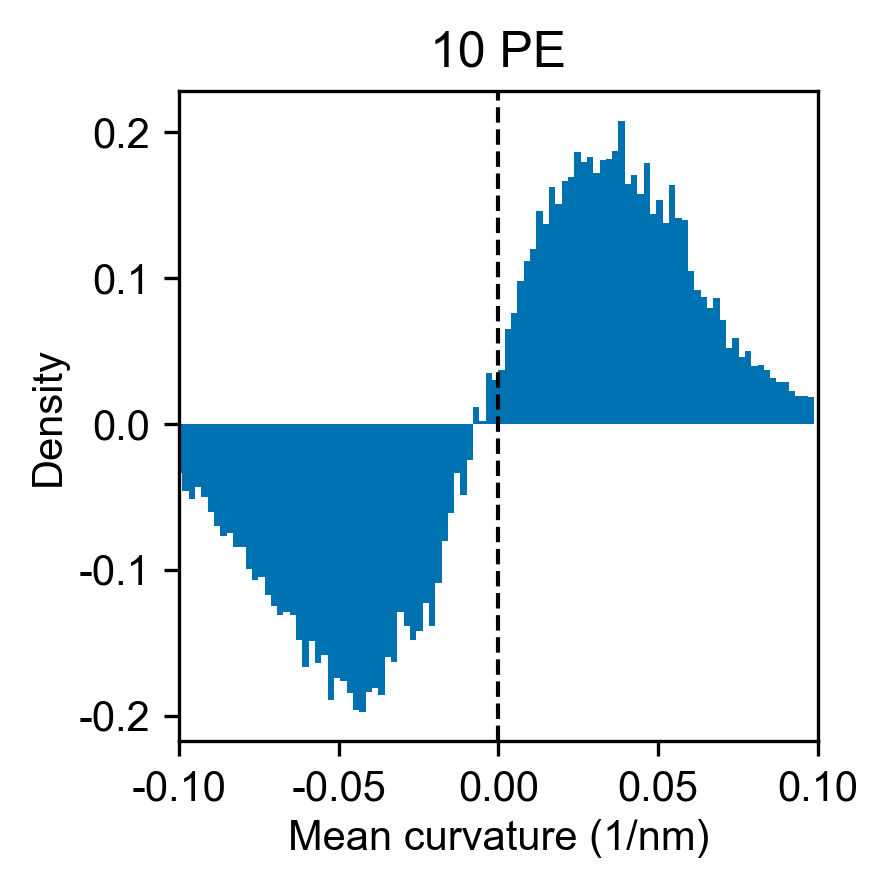

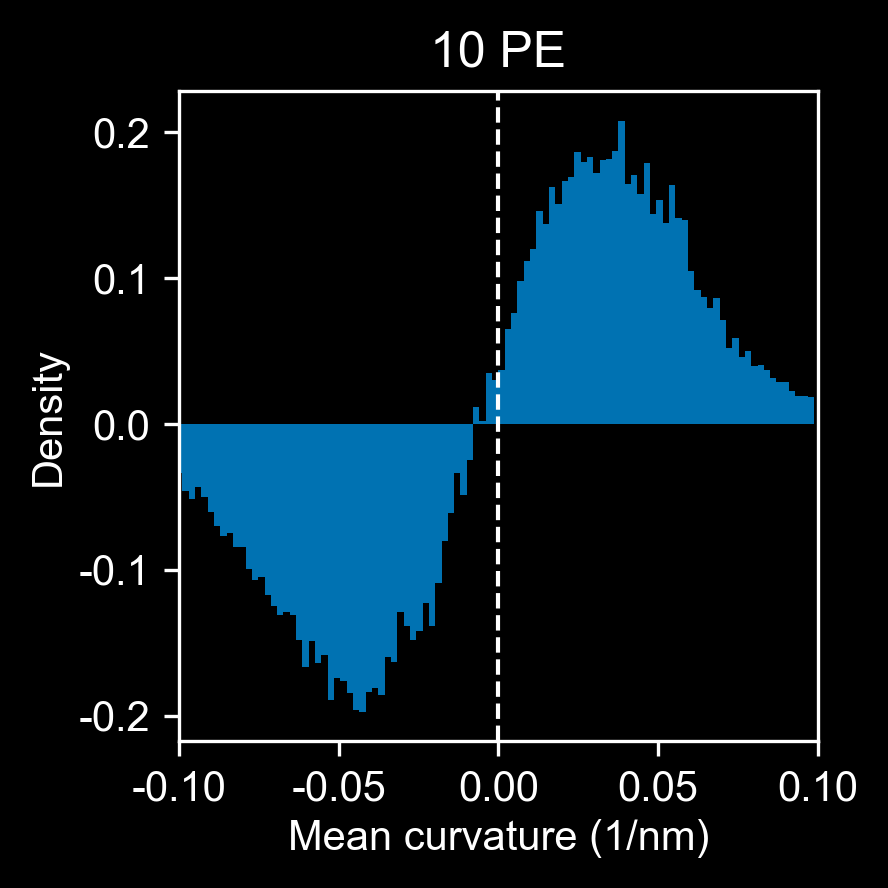

9 Overall mean: 0.0028532831187164072; CDL mean 0.013232178051814735


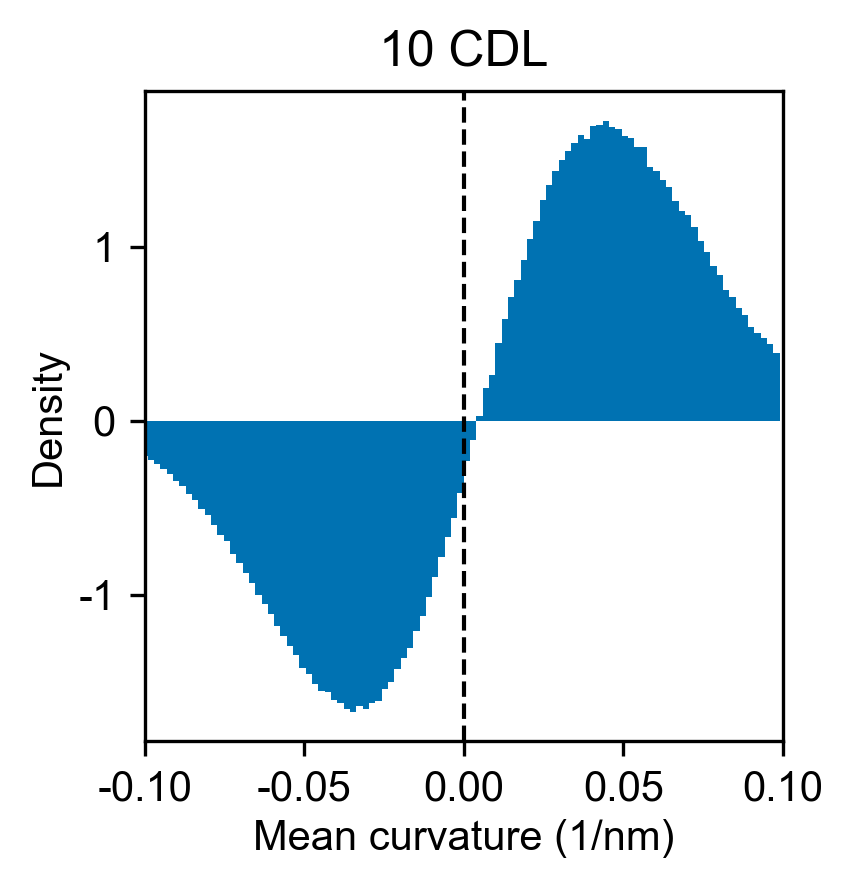

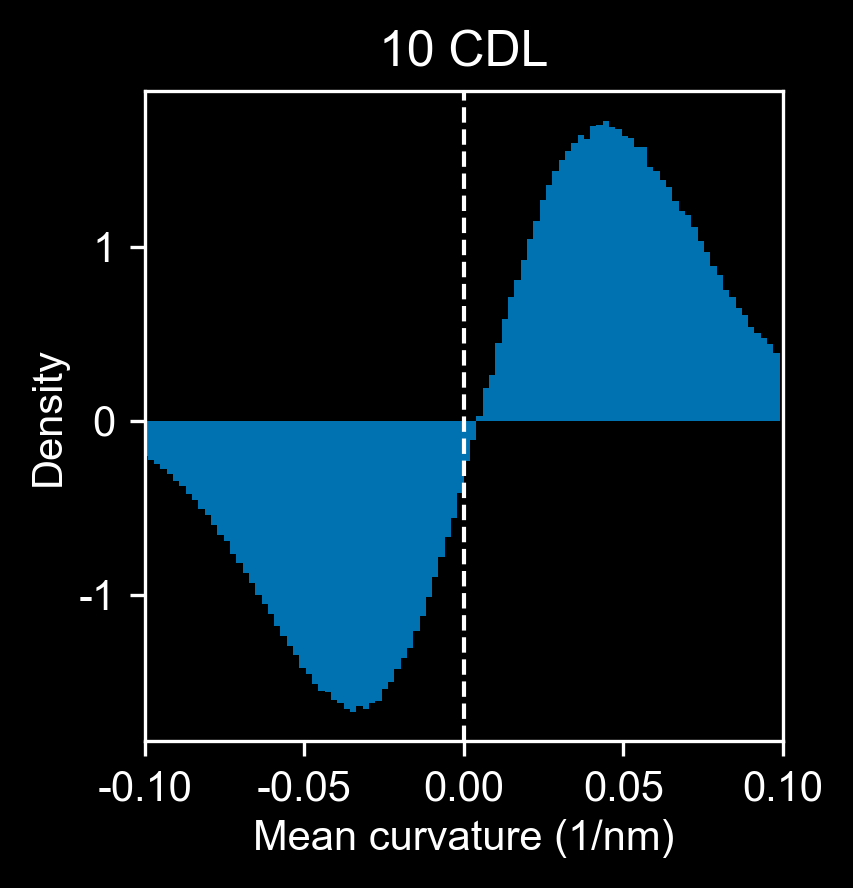

10 Overall mean: 0.0015214509345336208; PC mean 0.0006332215557732467


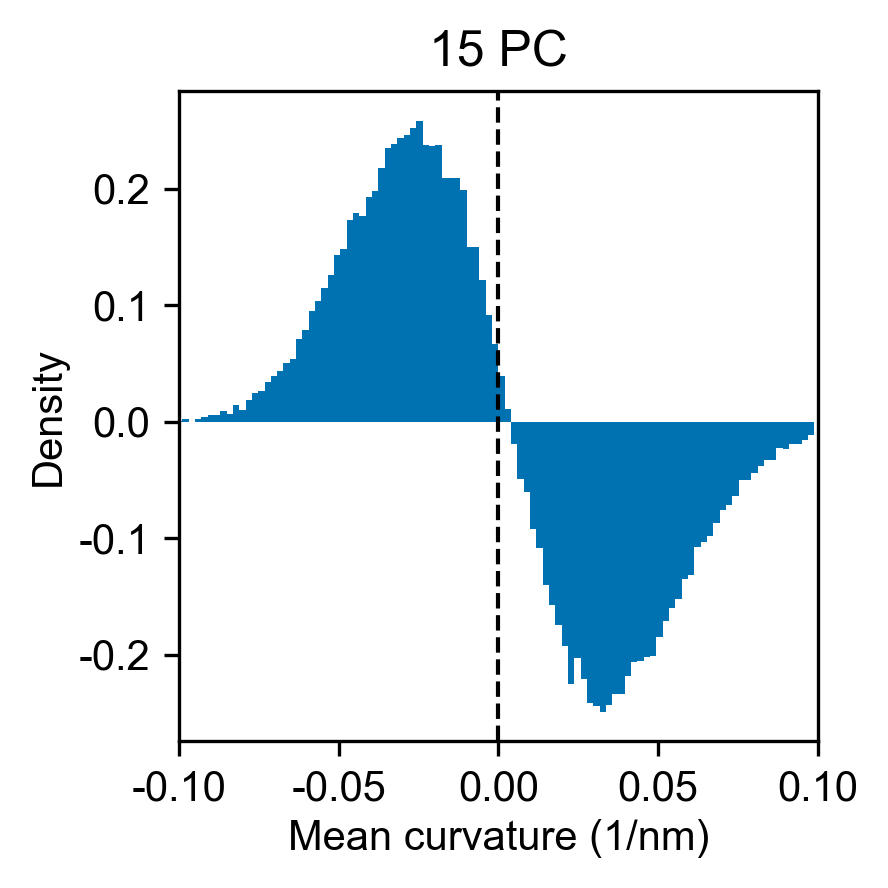

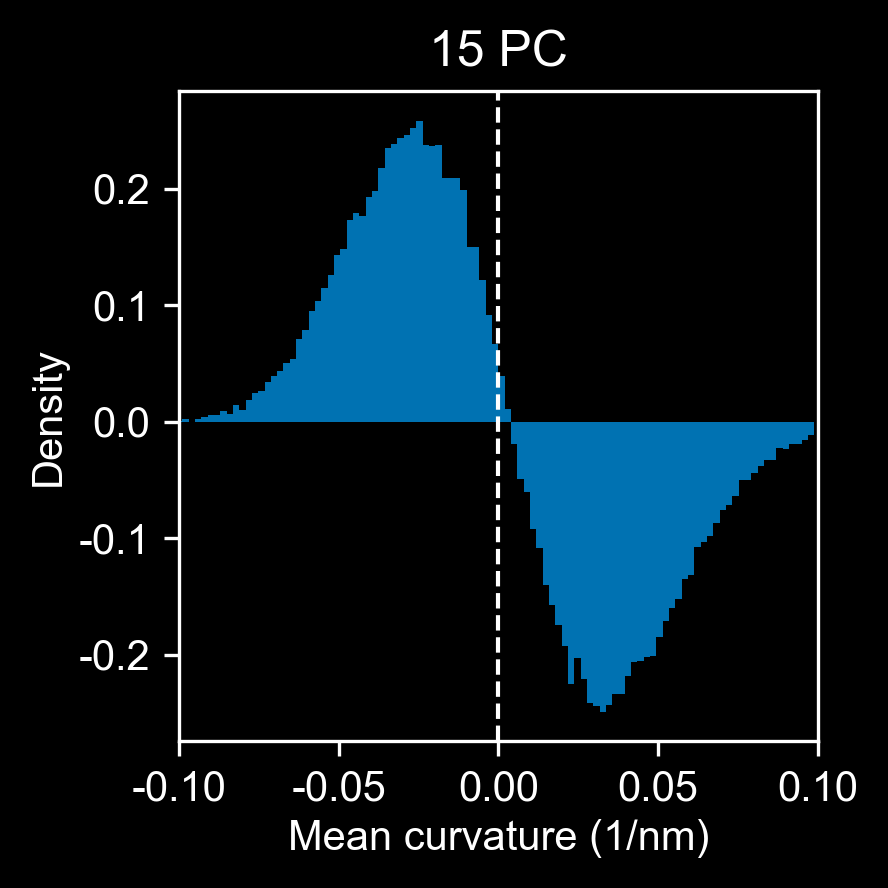

10 Overall mean: 0.0015214509345336208; PE mean 0.002900023853723908


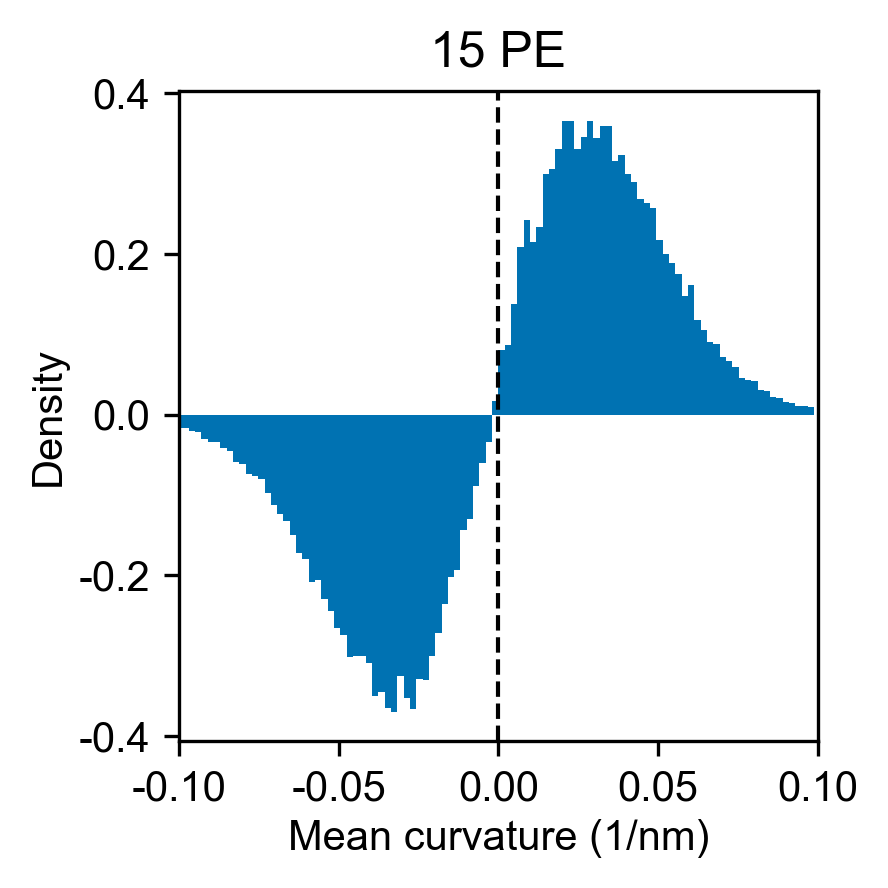

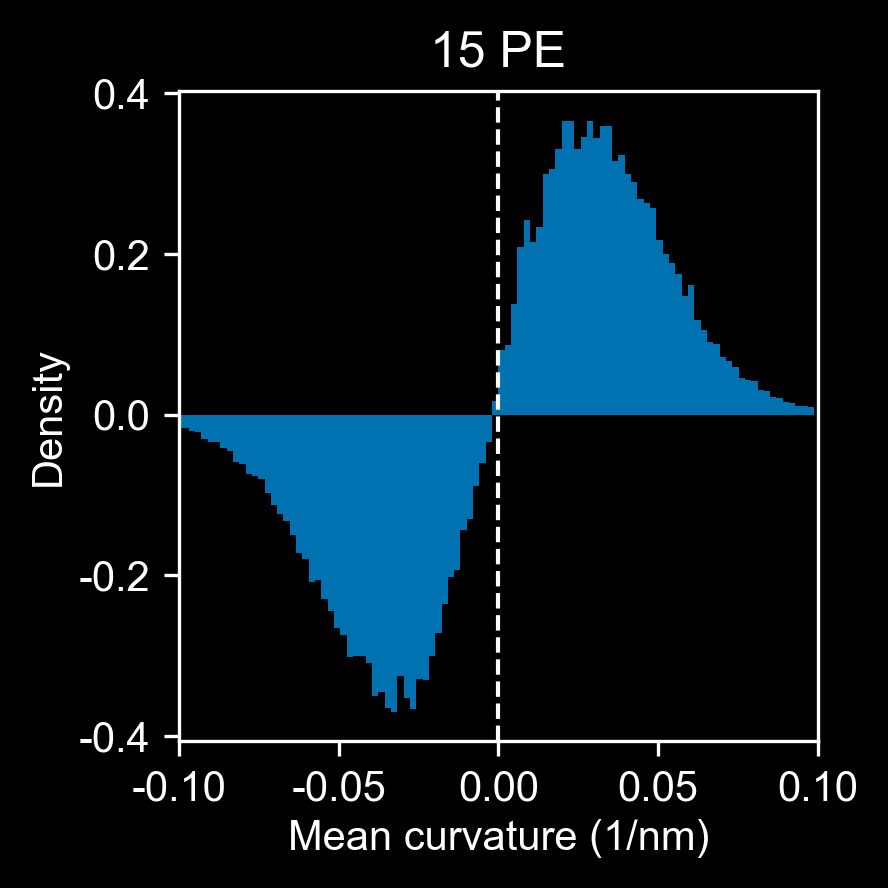

10 Overall mean: 0.0015214509345336208; PG mean 0.0015966910700166356


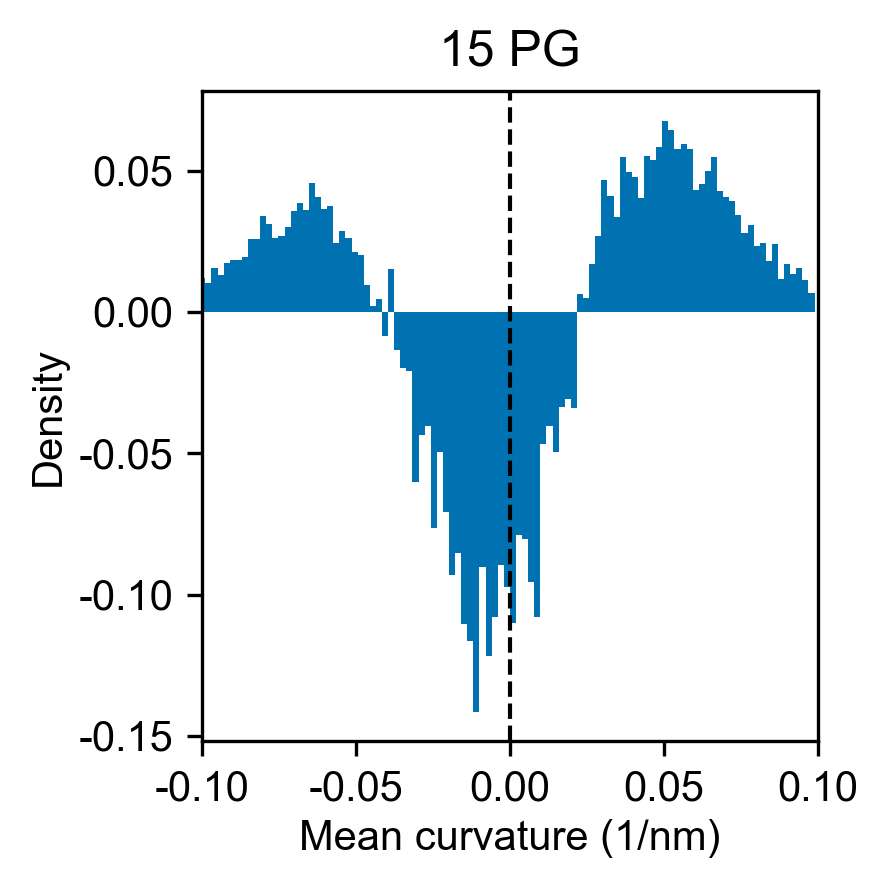

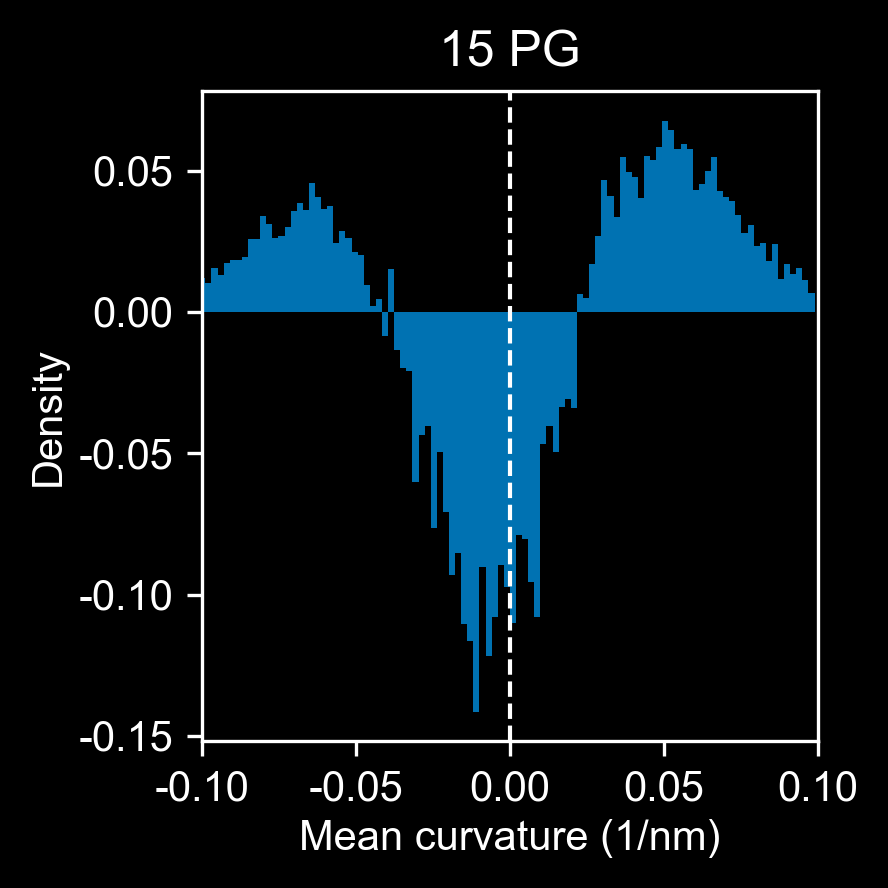

11 Overall mean: 0.001782166169513652; PC mean 0.00079386296811935


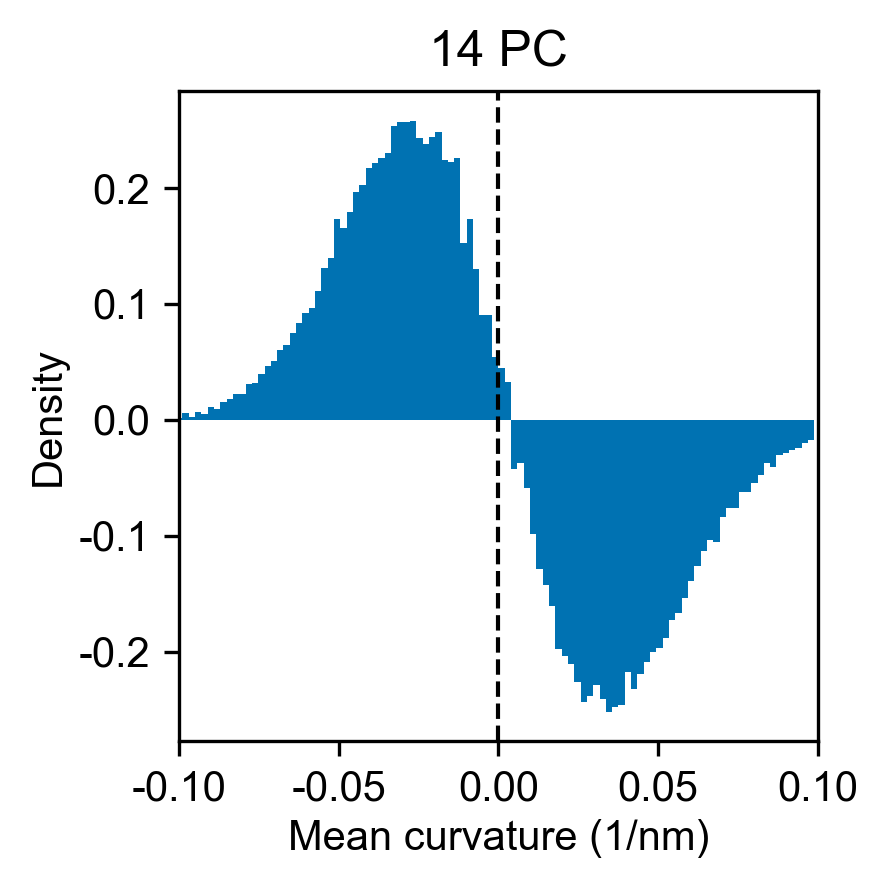

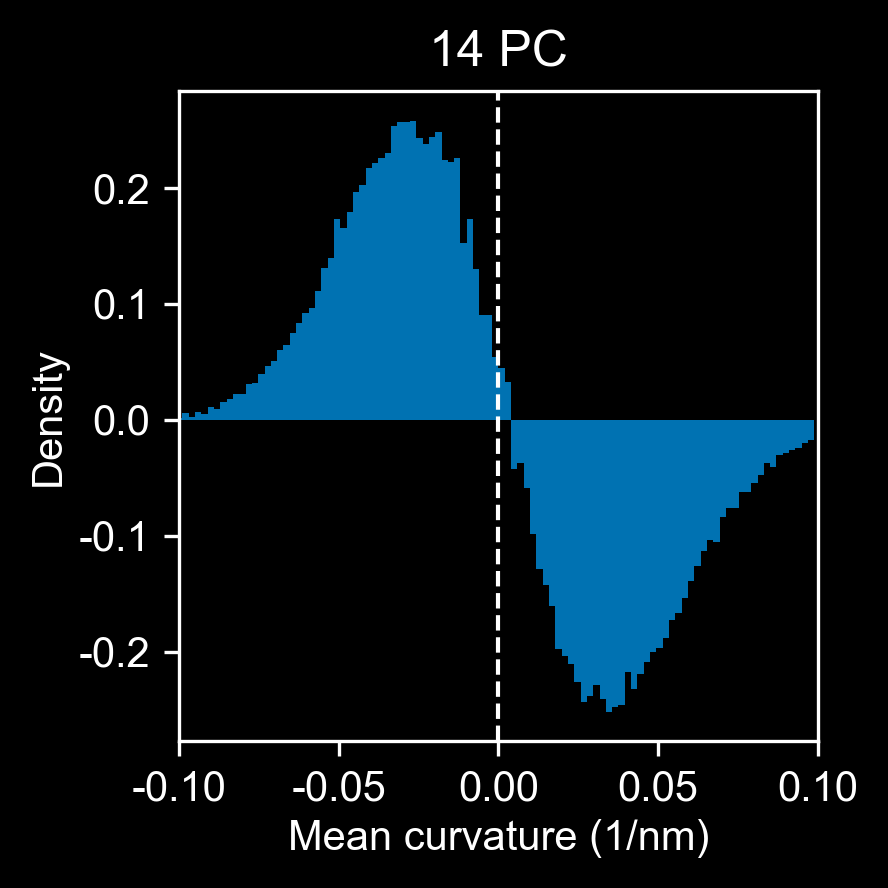

11 Overall mean: 0.001782166169513652; PE mean 0.0032662376320098667


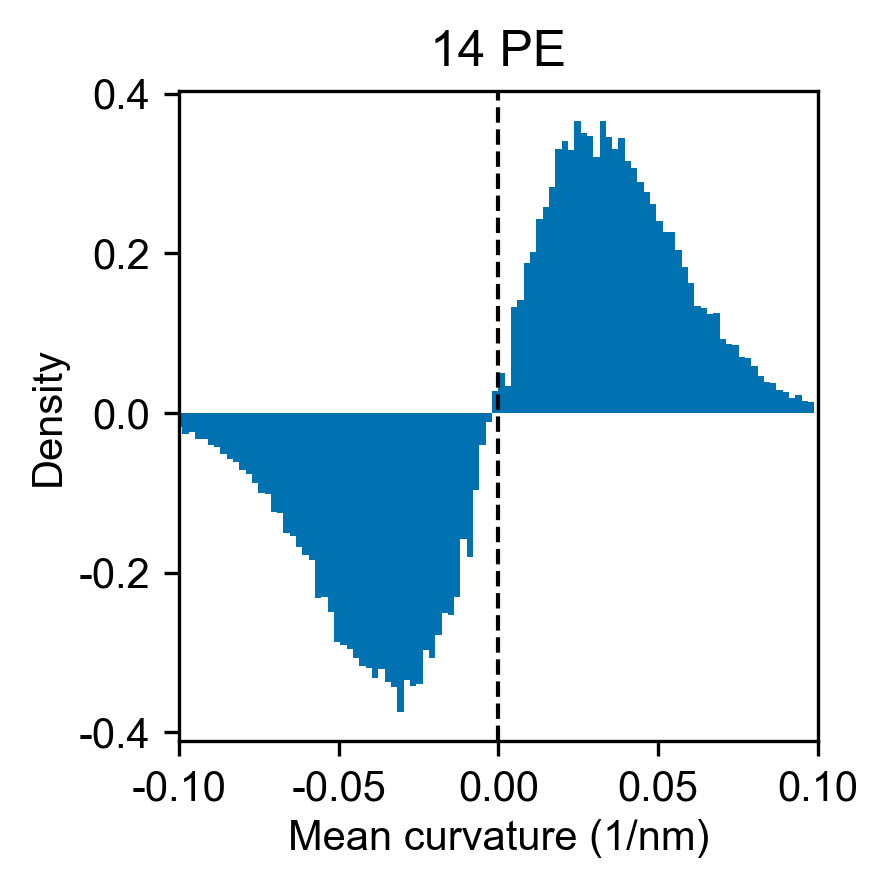

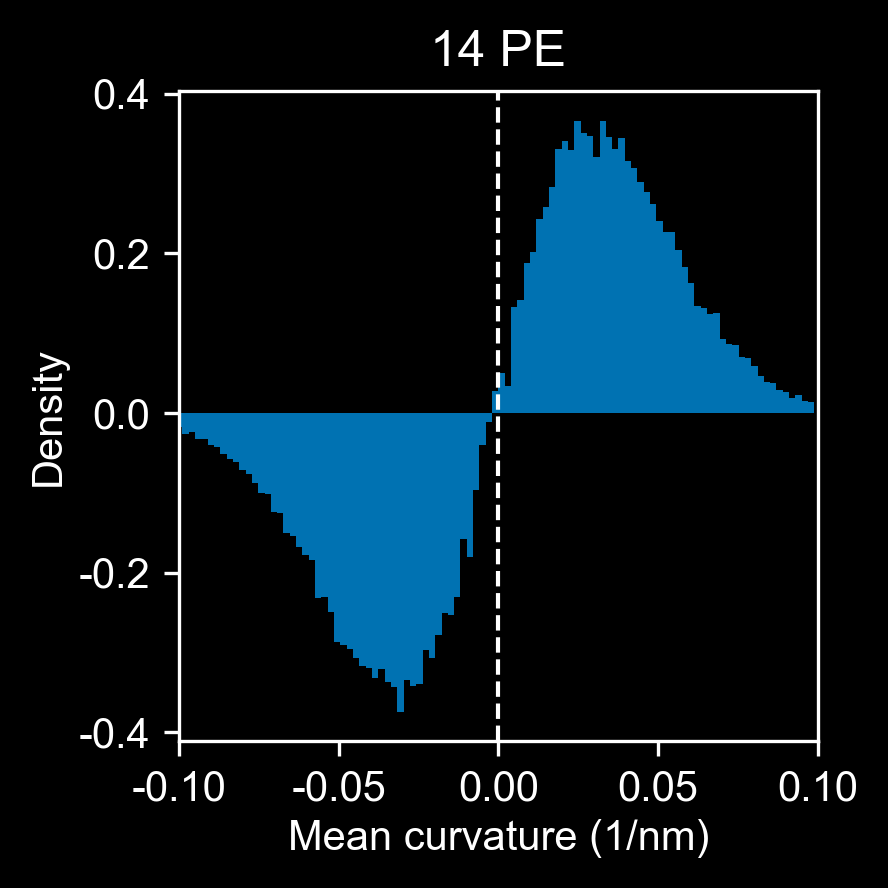

11 Overall mean: 0.001782166169513652; PG mean 0.0019017942237723507


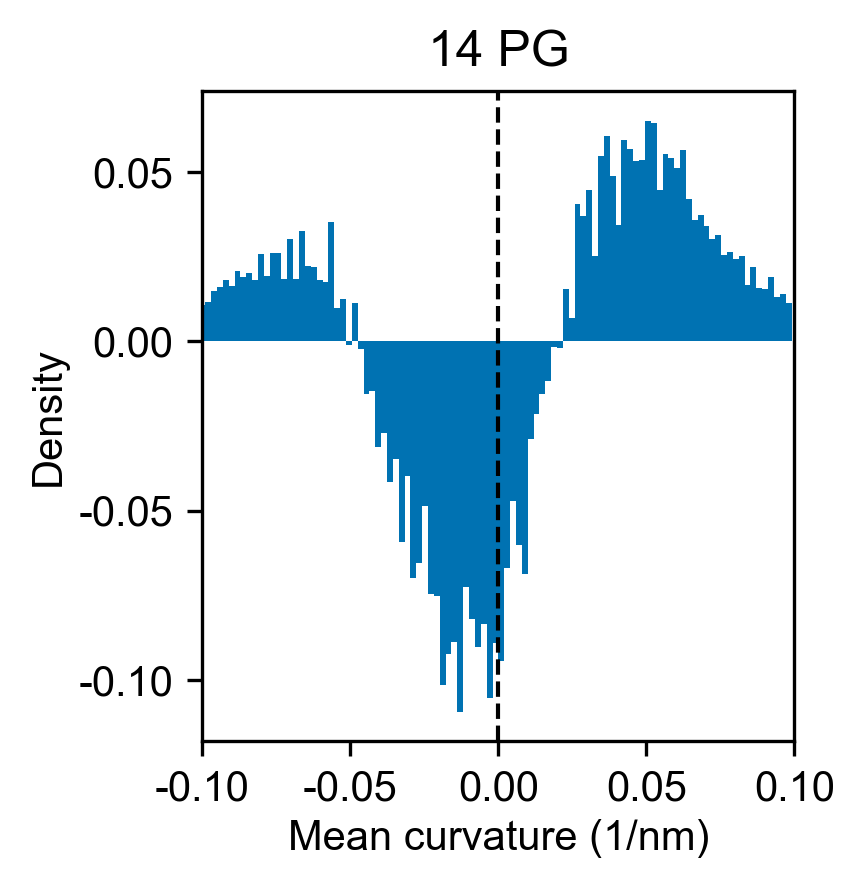

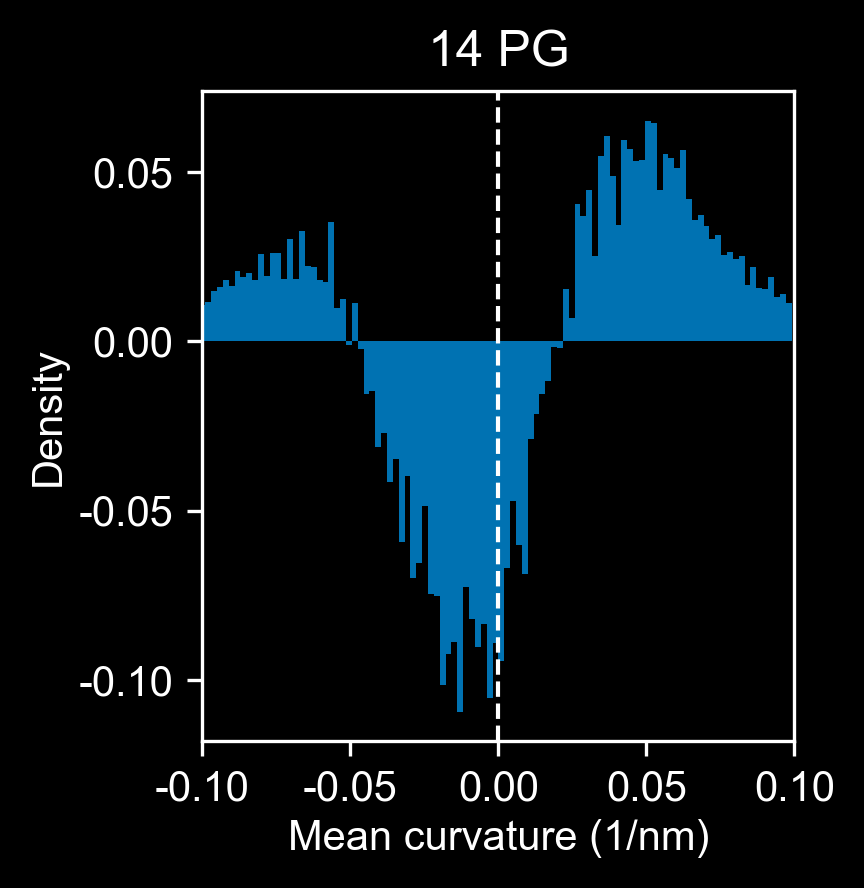

12 Overall mean: 0.0017195395752847187; PC mean 0.00045114625668101773


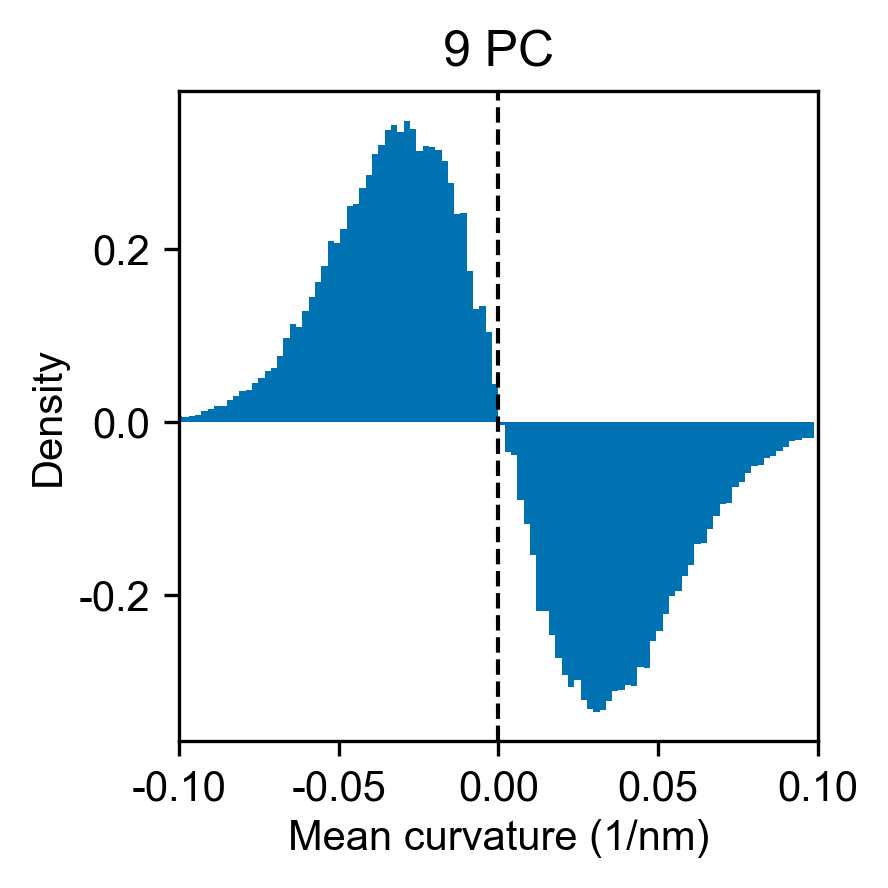

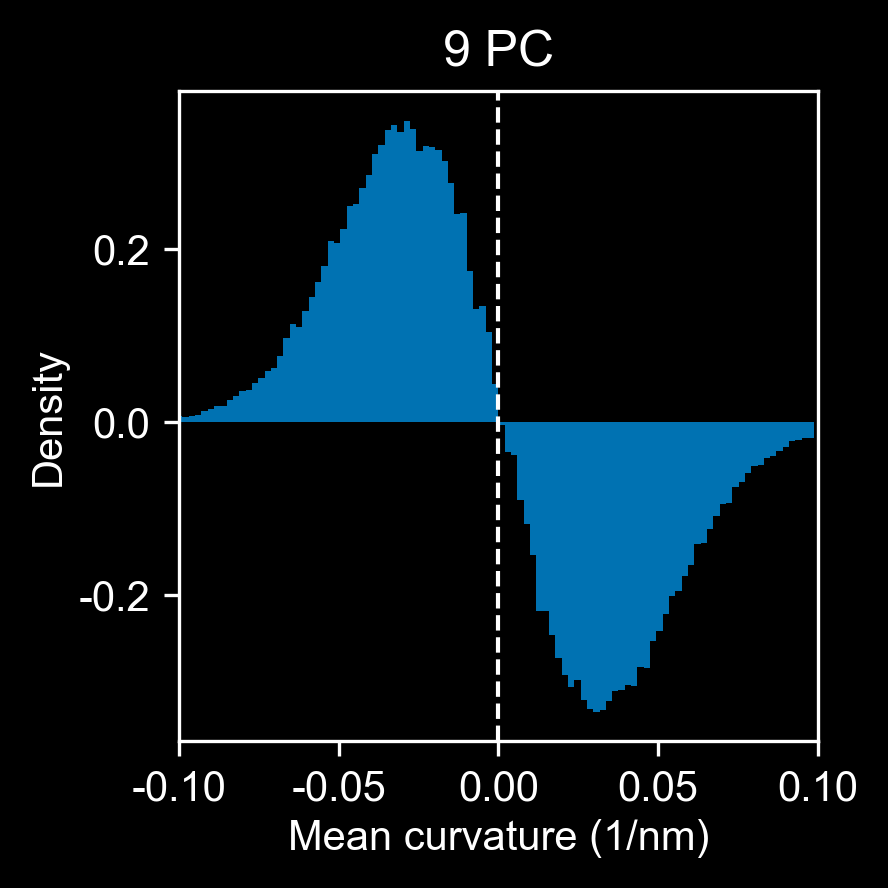

12 Overall mean: 0.0017195395752847187; PE mean 0.0029384743976411548


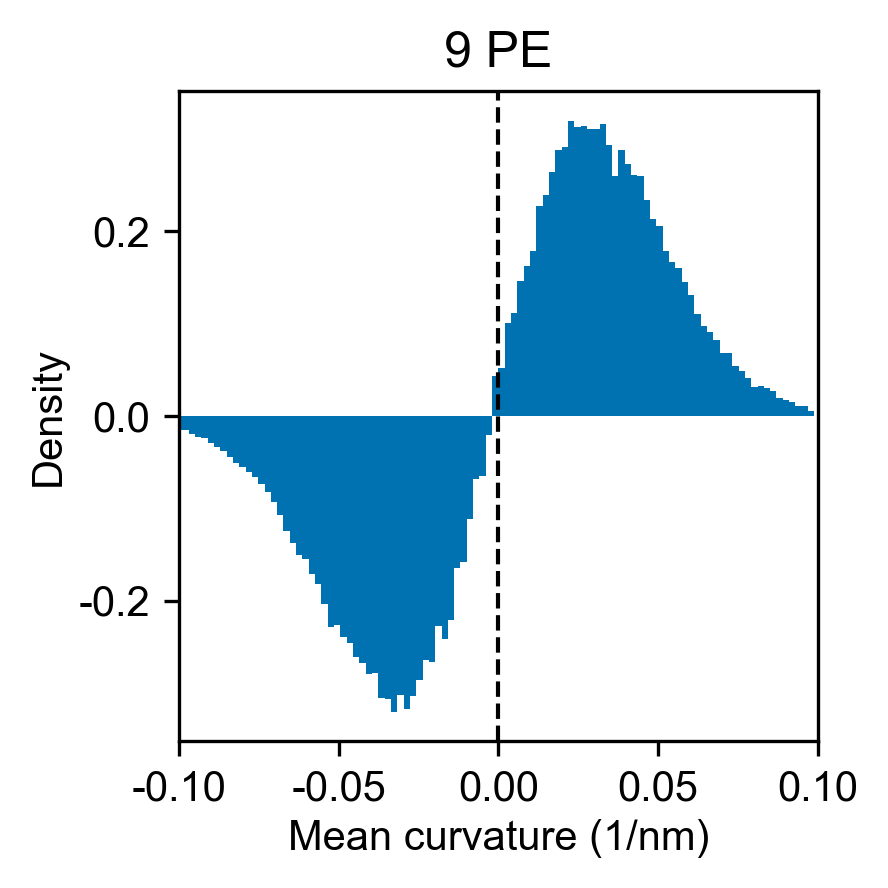

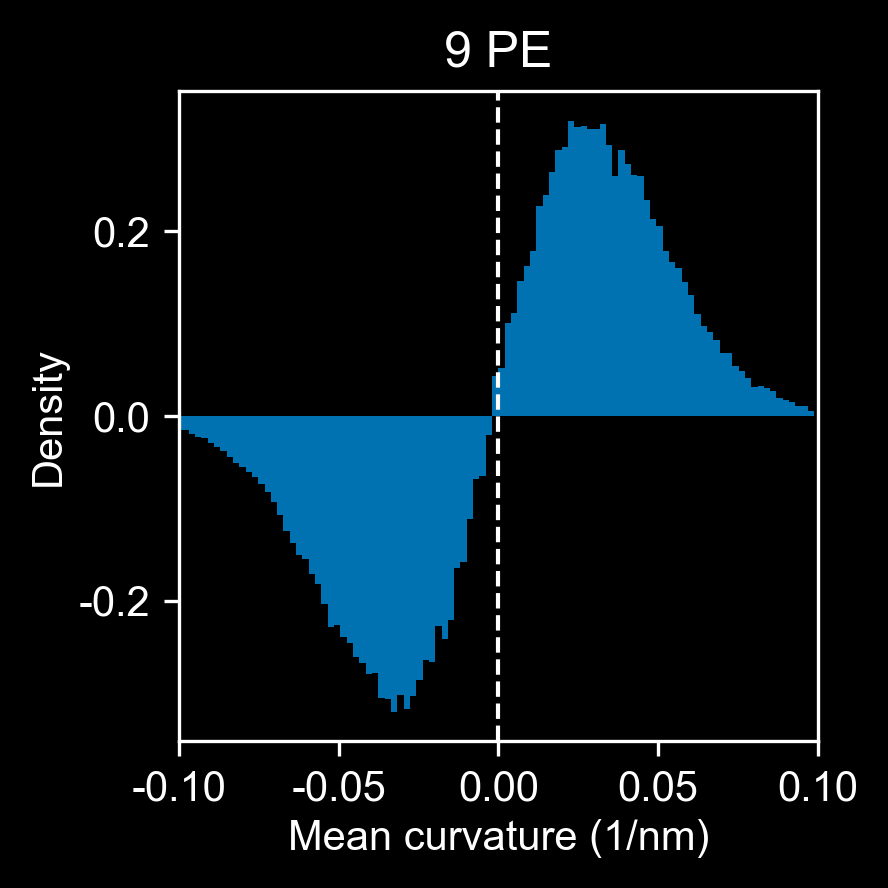

12 Overall mean: 0.0017195395752847187; PG mean 0.0018020079276670038


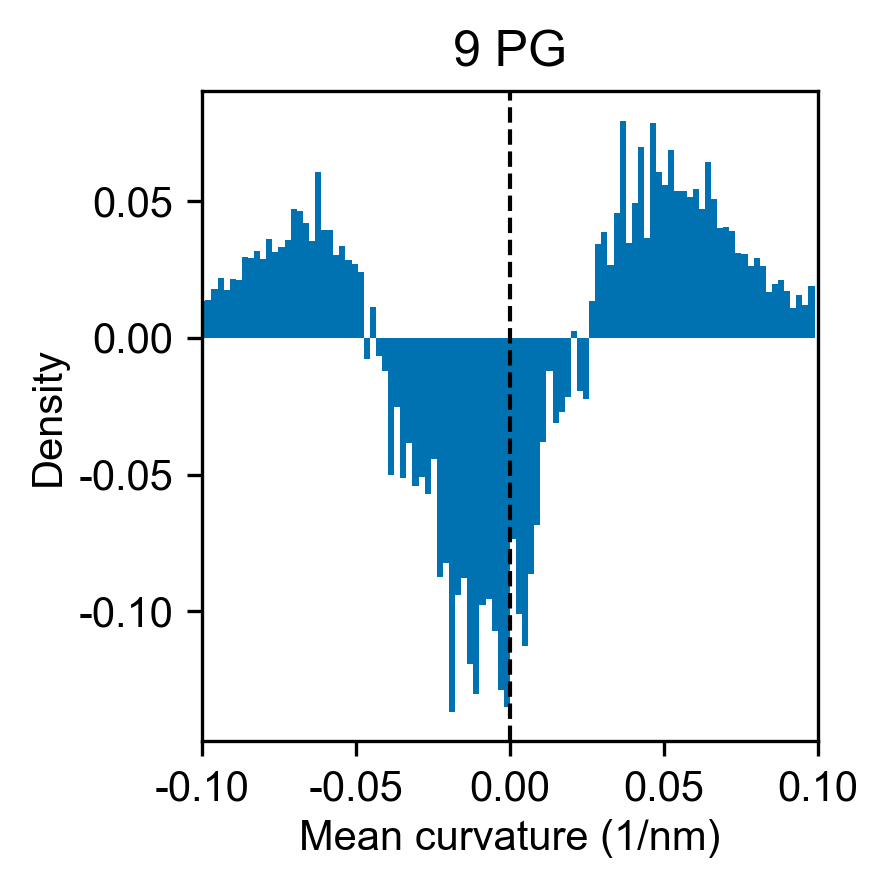

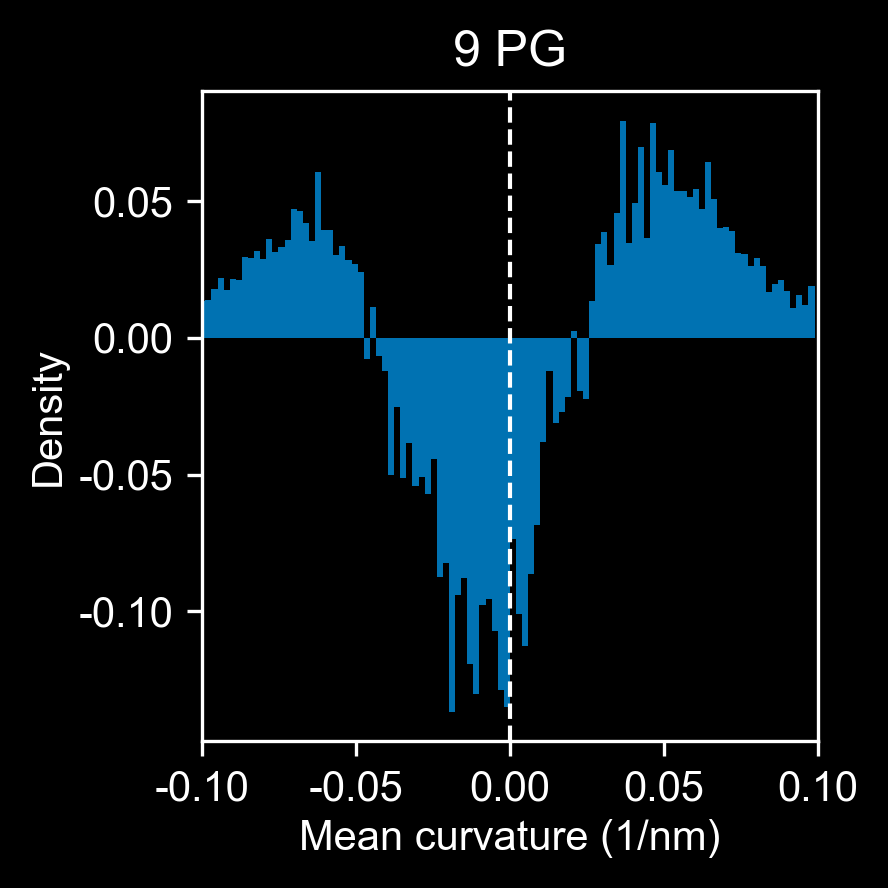

13 Overall mean: 0.0024664612117926495; PC mean -0.0011194787123957896


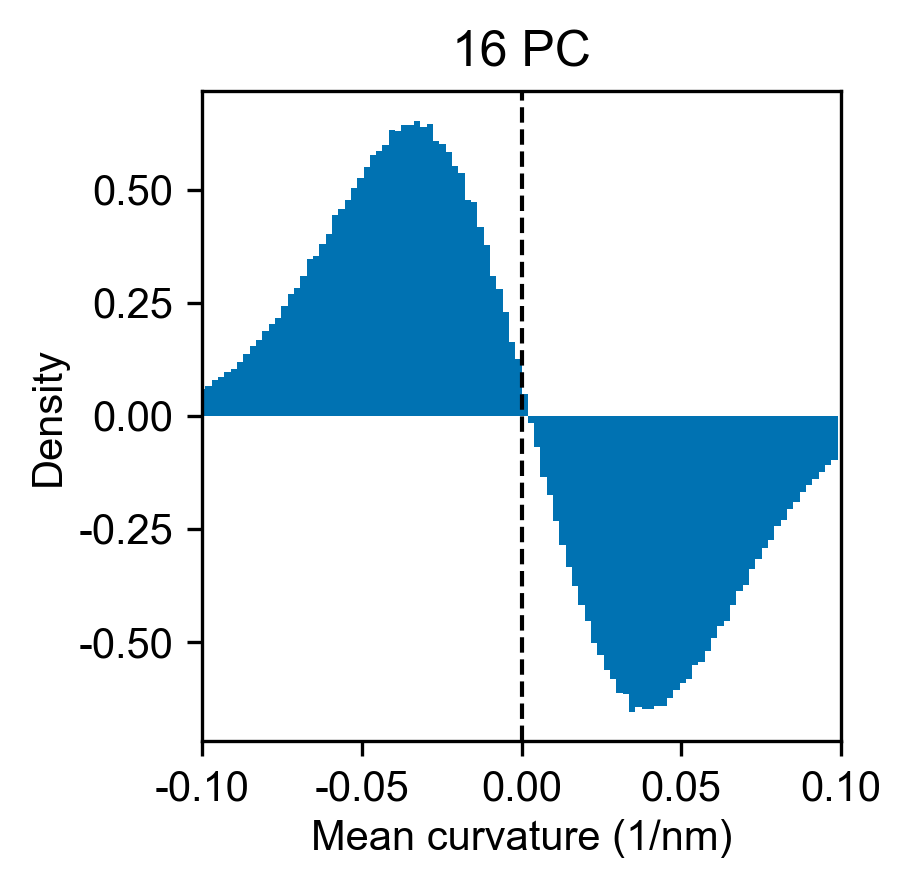

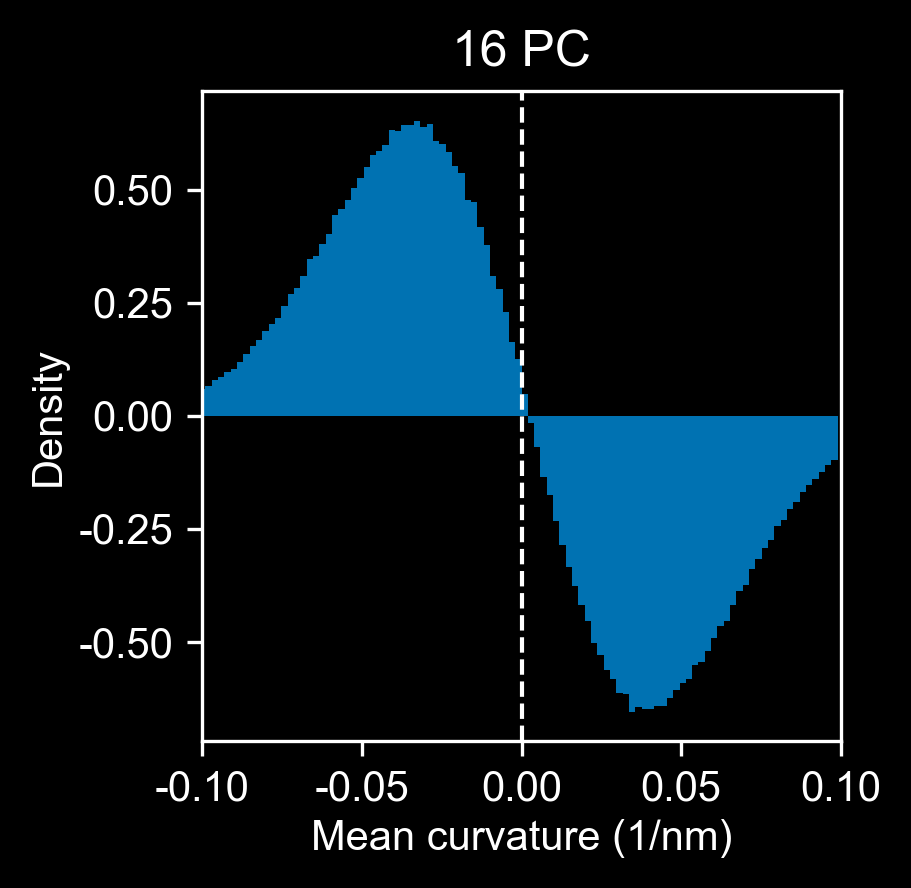

13 Overall mean: 0.0024664612117926495; PE mean 0.003837734407466683


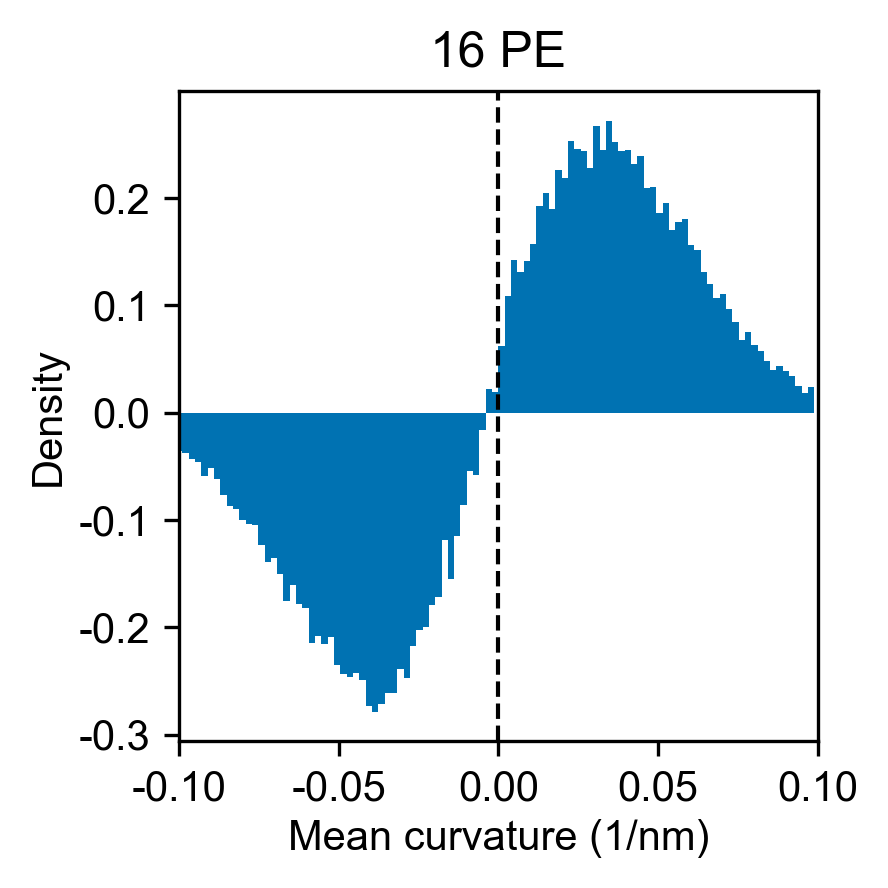

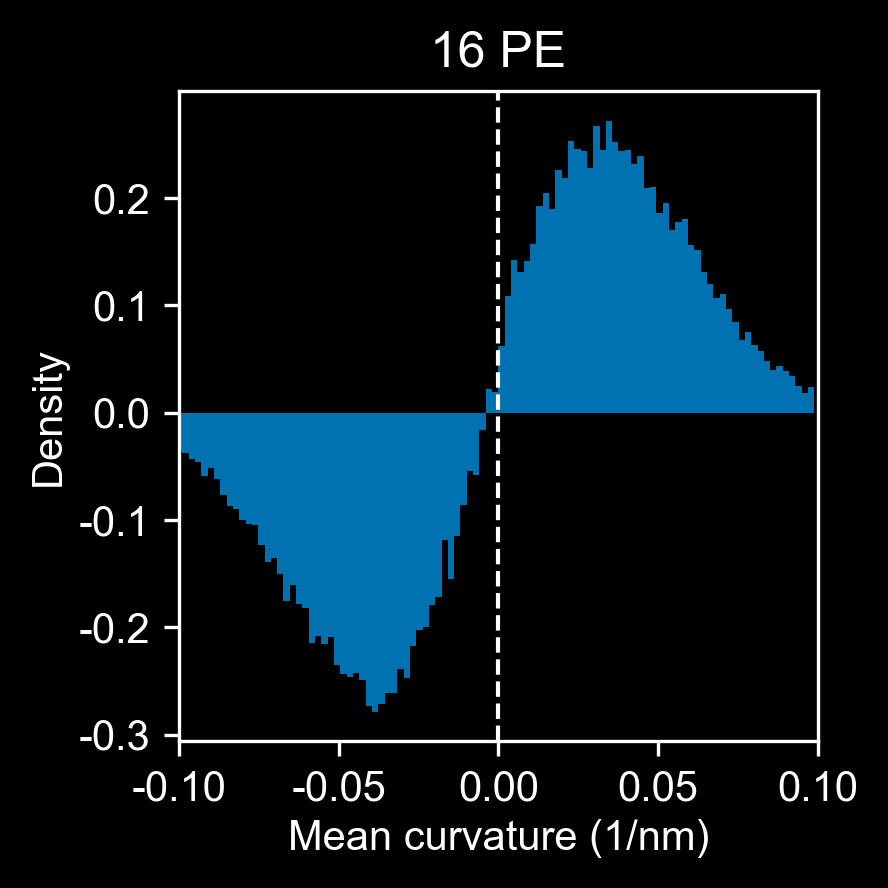

13 Overall mean: 0.0024664612117926495; CDL mean 0.012301694243739638


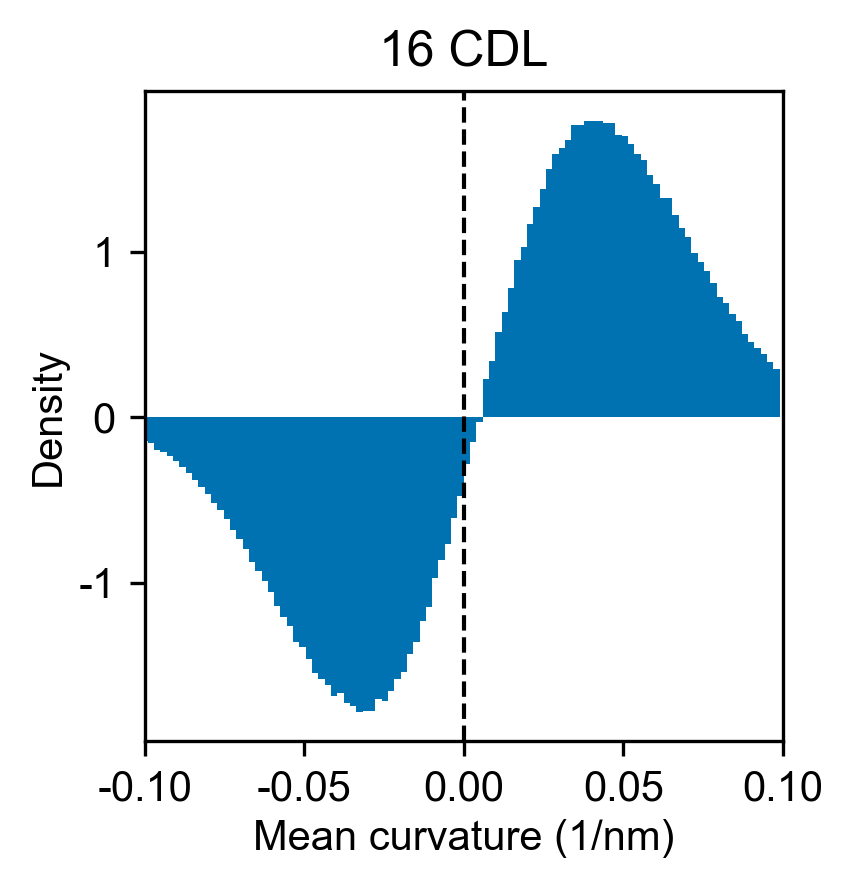

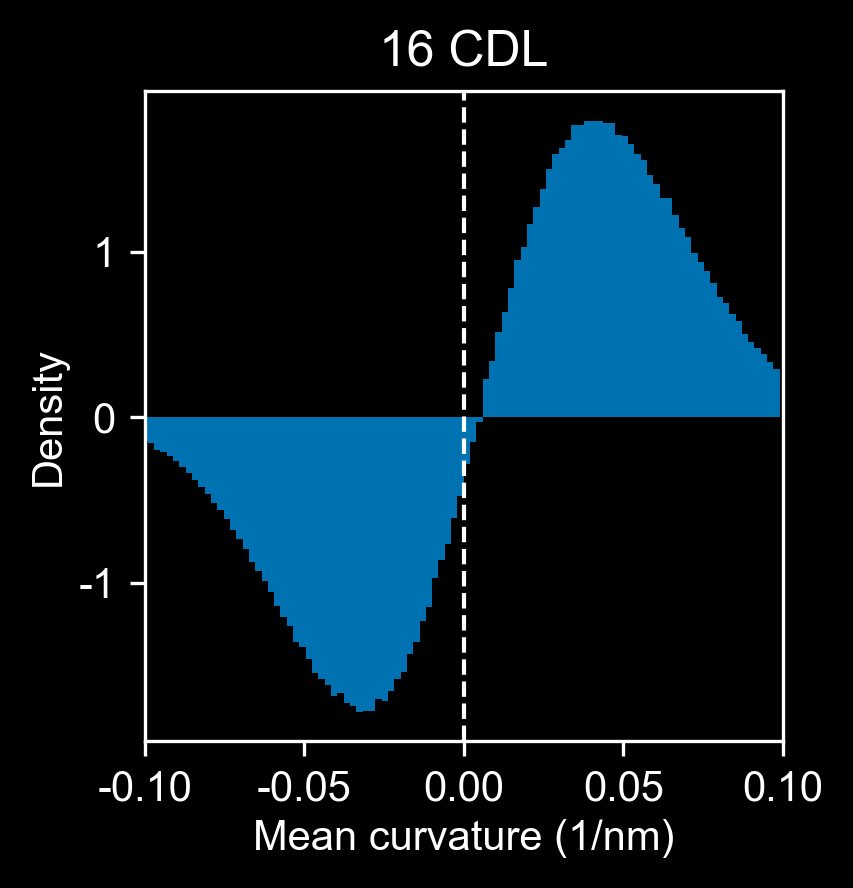

14 Overall mean: 0.002093464139375764; PC mean -0.000172052654599935


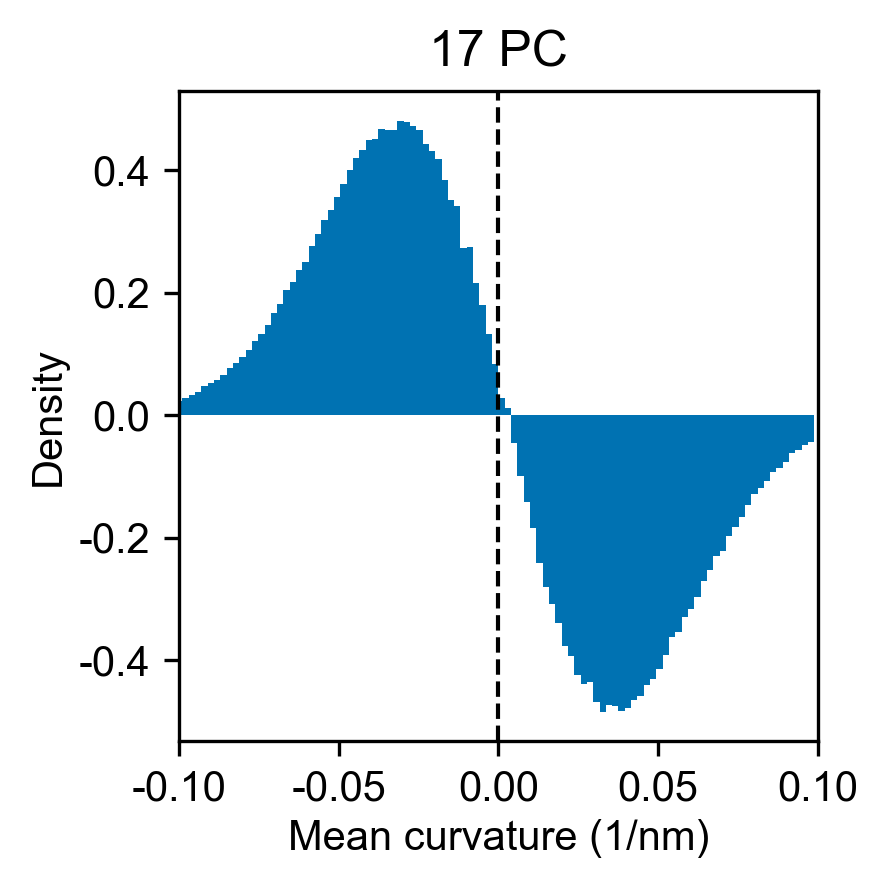

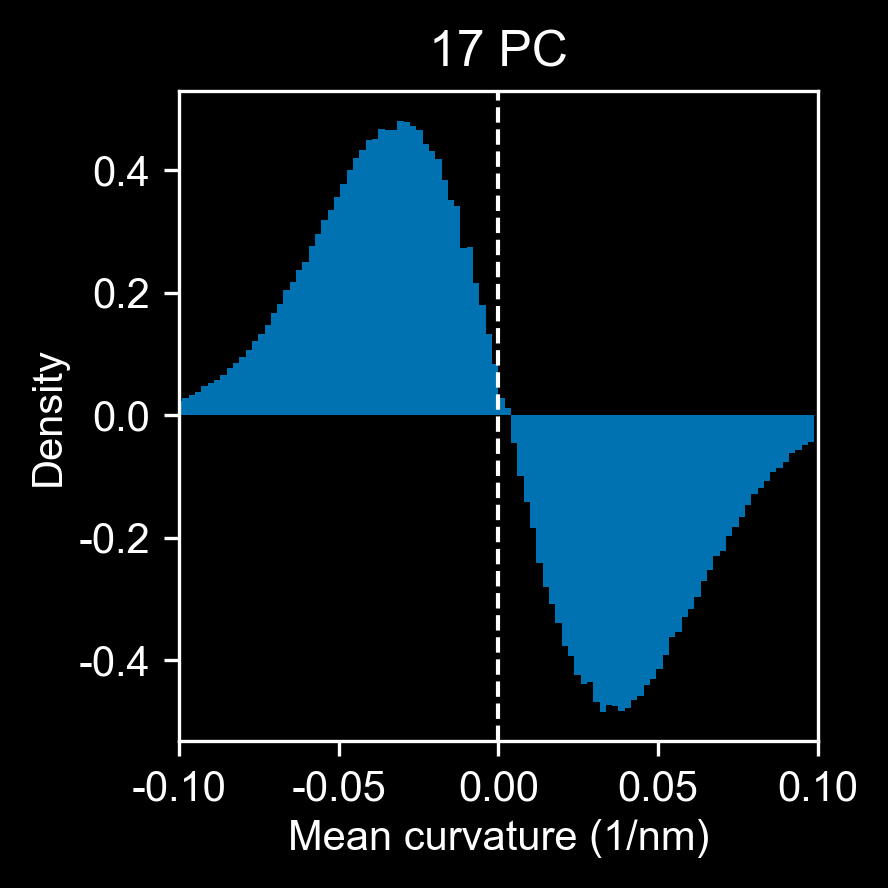

14 Overall mean: 0.002093464139375764; PE mean 0.003682029976718528


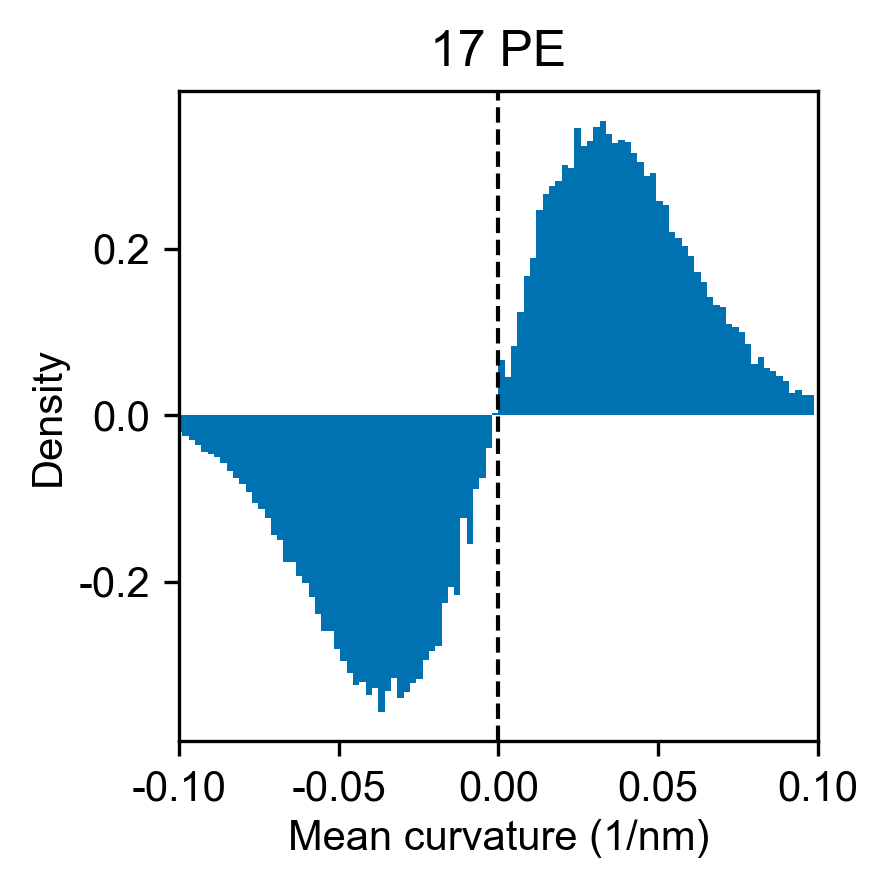

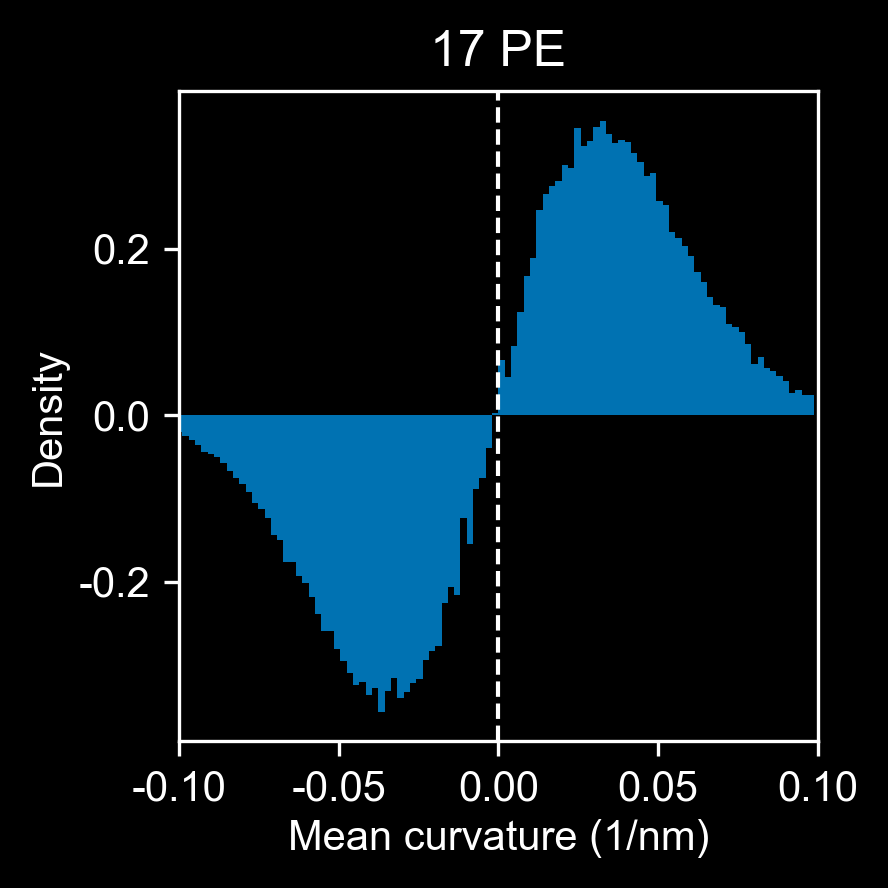

14 Overall mean: 0.002093464139375764; CDL mean 0.011746282201799116


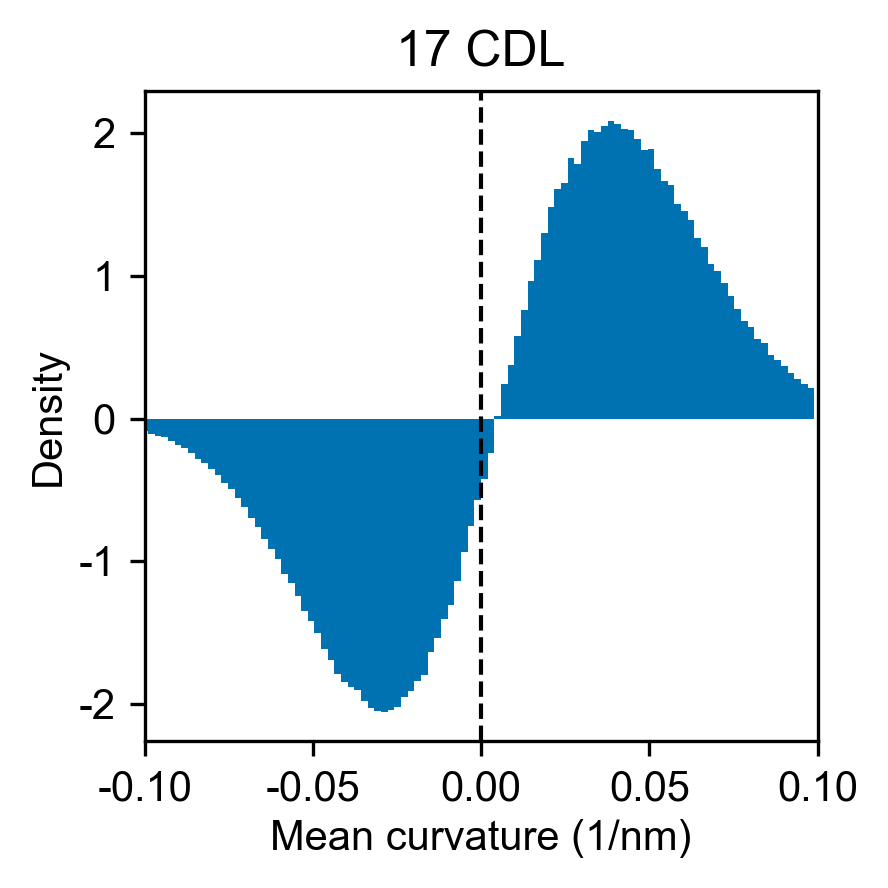

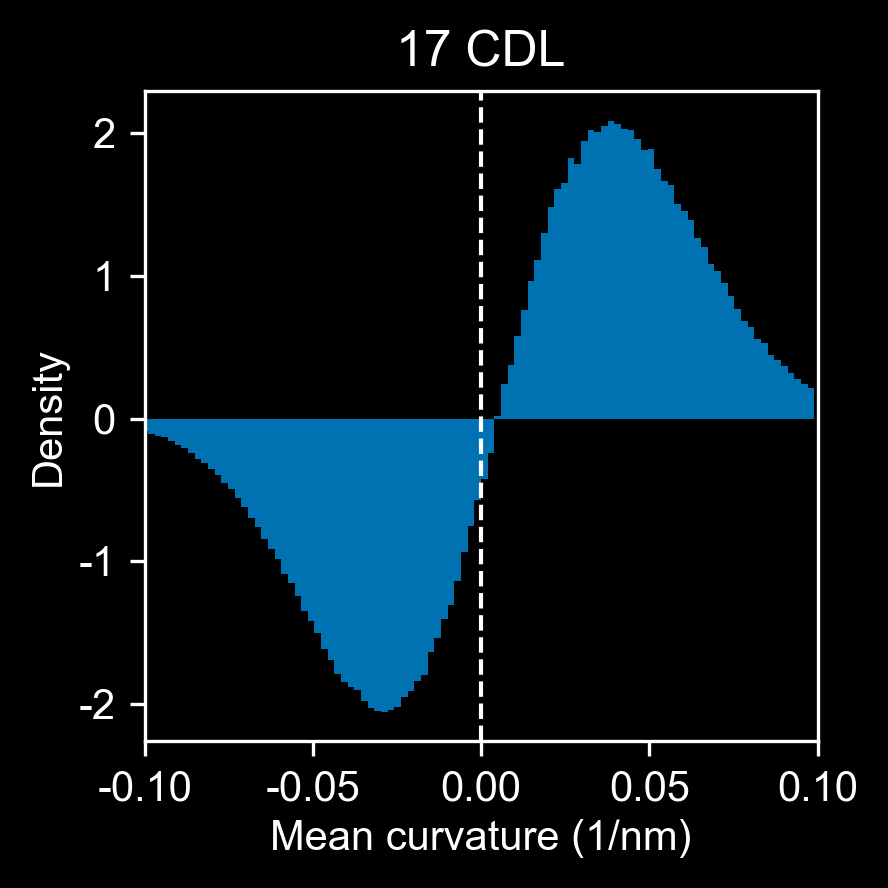

15 Overall mean: 0.0022864237087687604; PC mean -0.001168953431902979


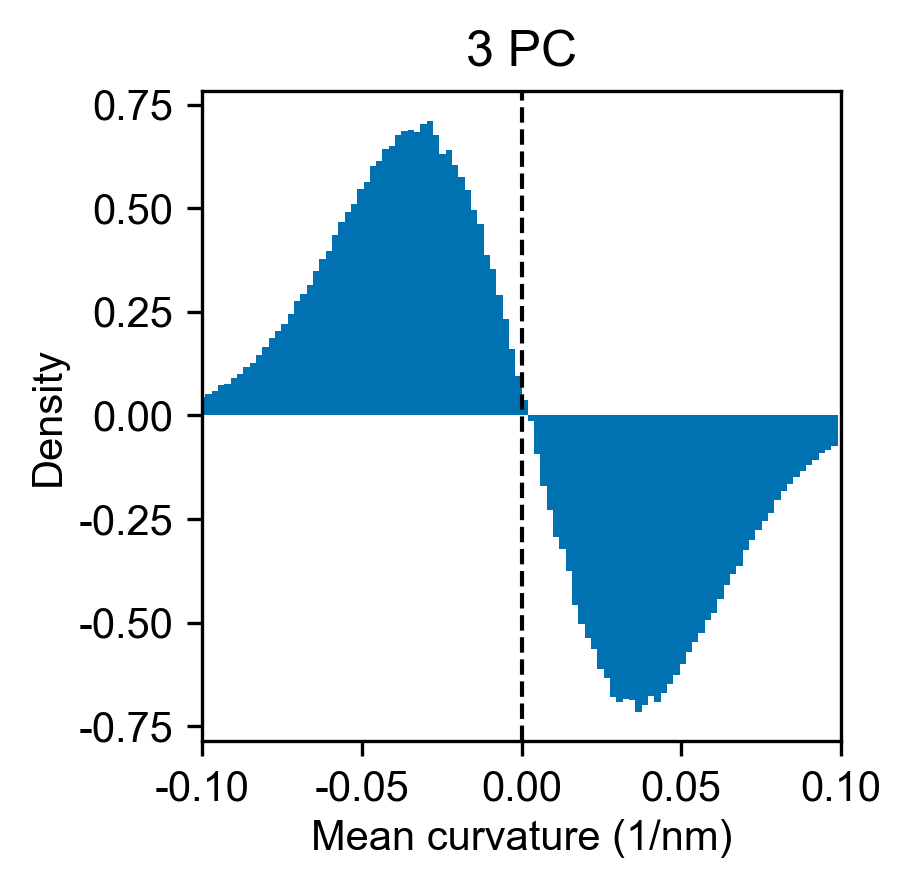

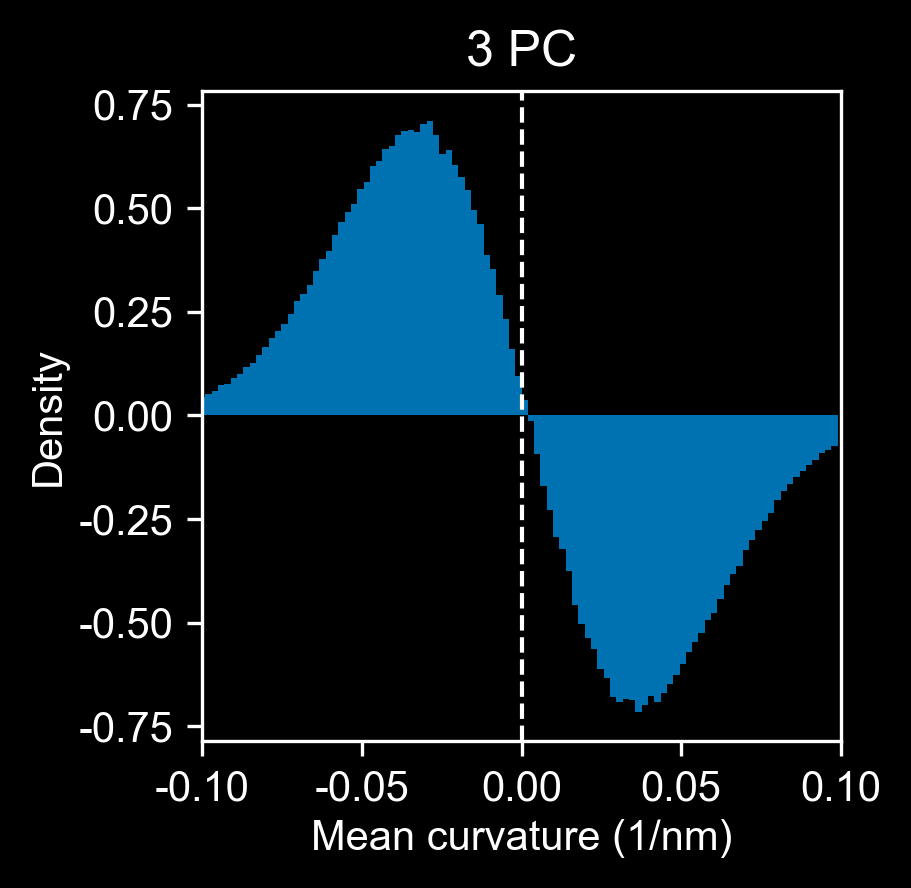

15 Overall mean: 0.0022864237087687604; PE mean 0.0033080525918300833


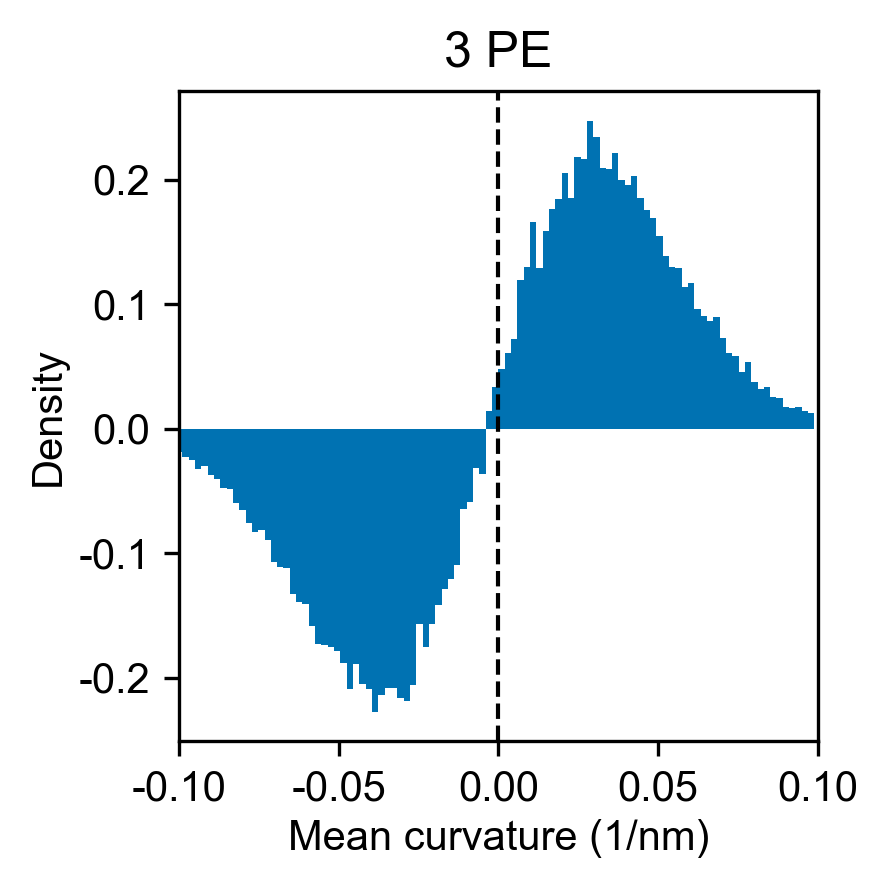

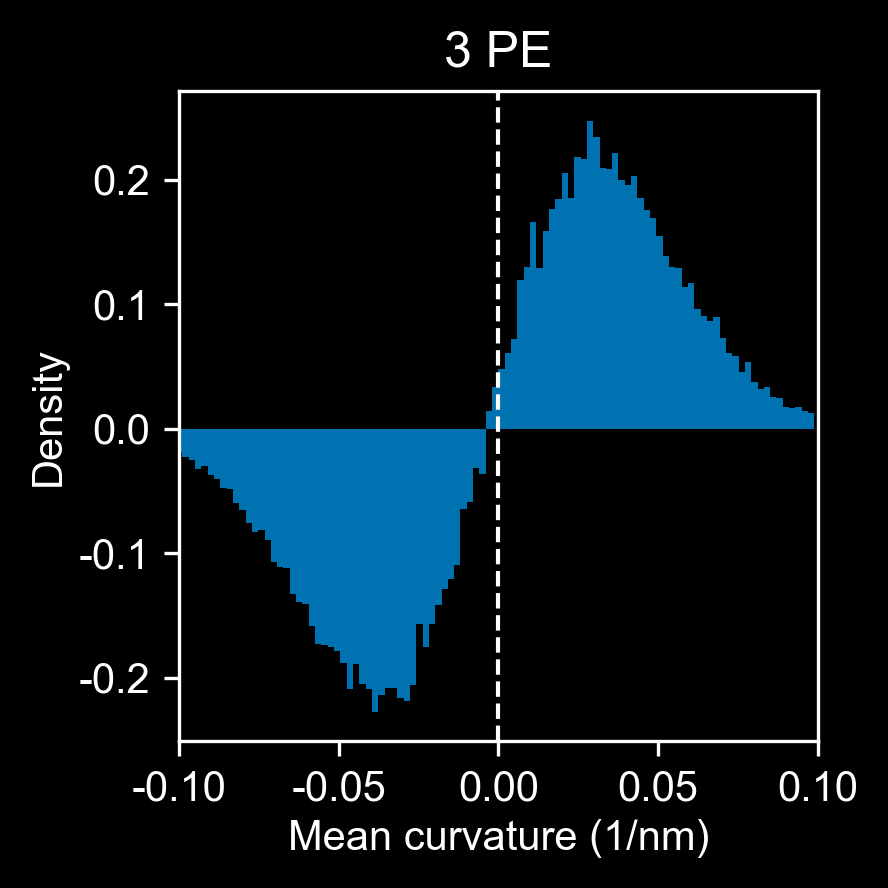

15 Overall mean: 0.0022864237087687604; CDL mean 0.011245496334961507


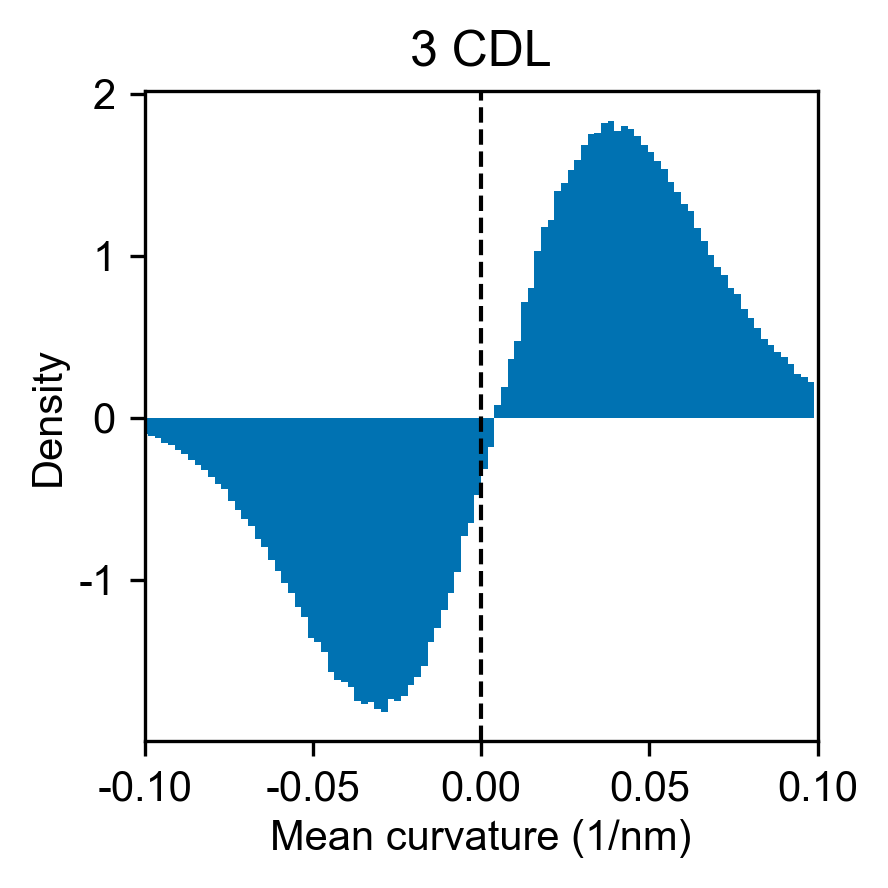

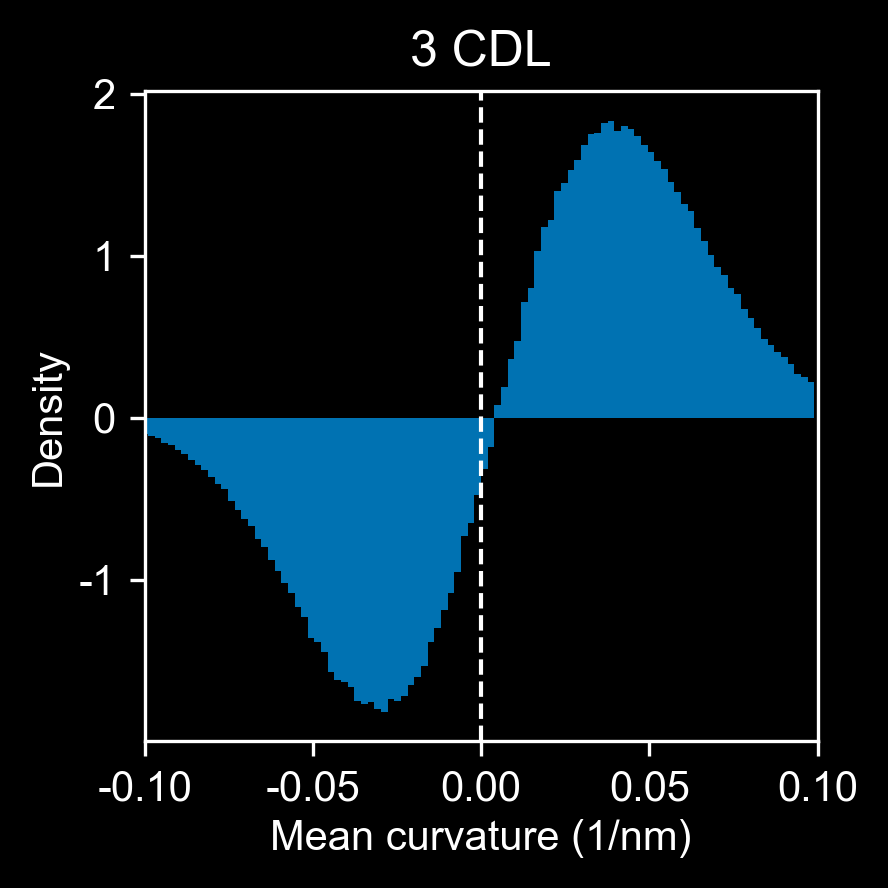

16 Overall mean: 0.0019709806748546958; PC mean -0.0002849979331559919


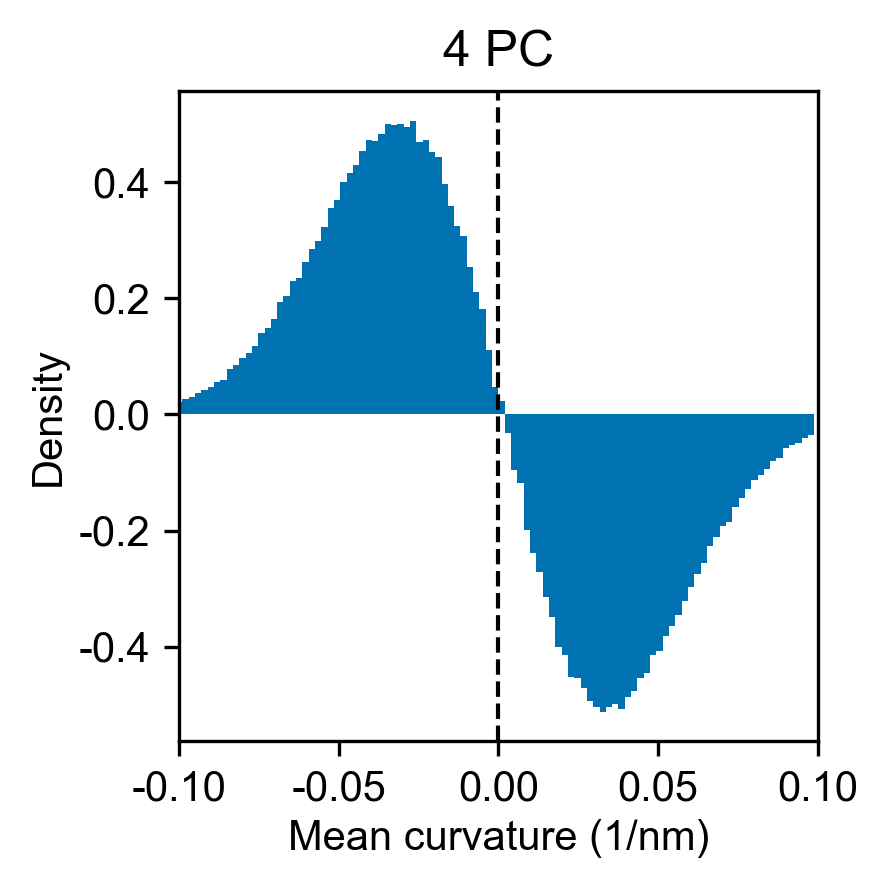

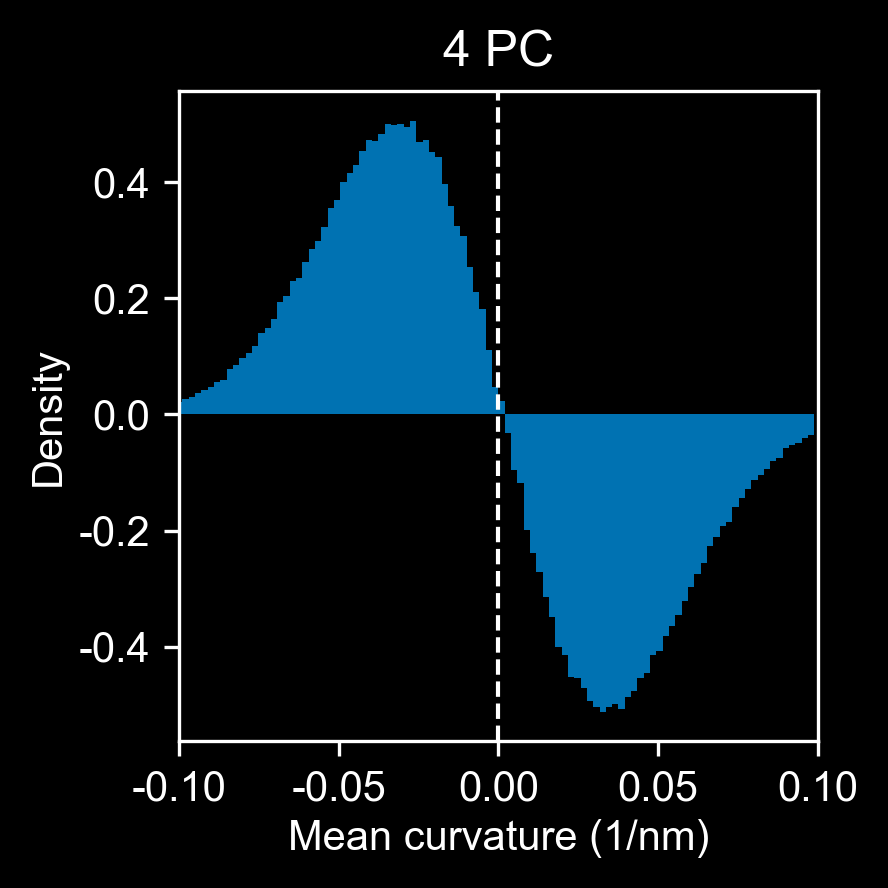

16 Overall mean: 0.0019709806748546958; PE mean 0.0037728795220485917


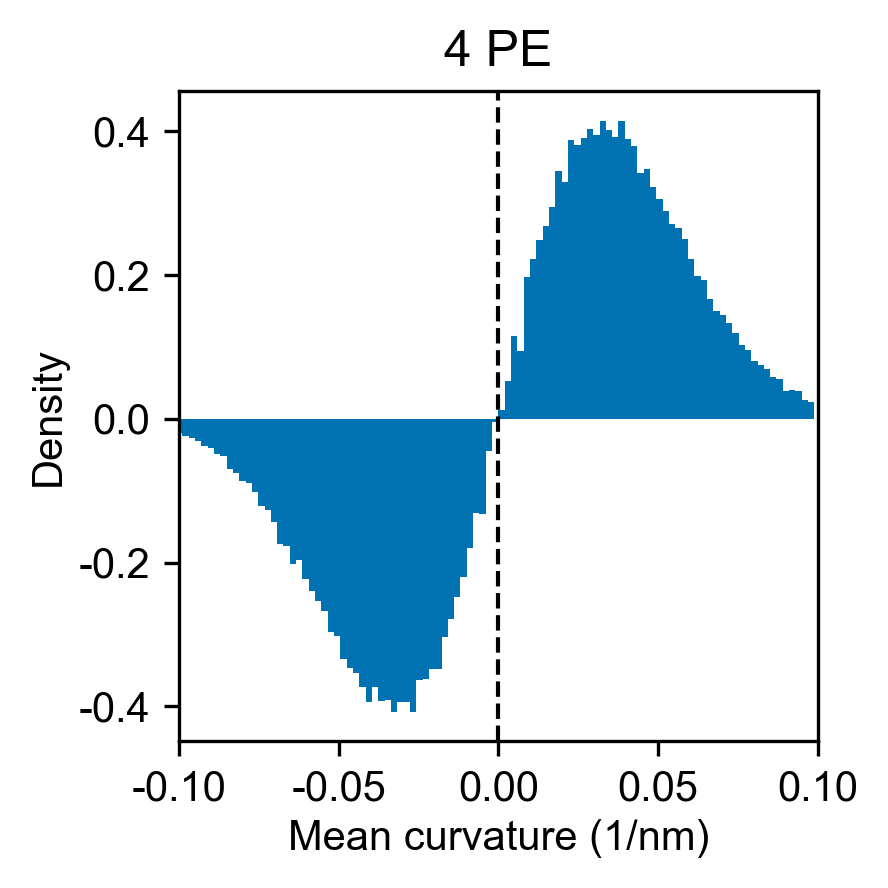

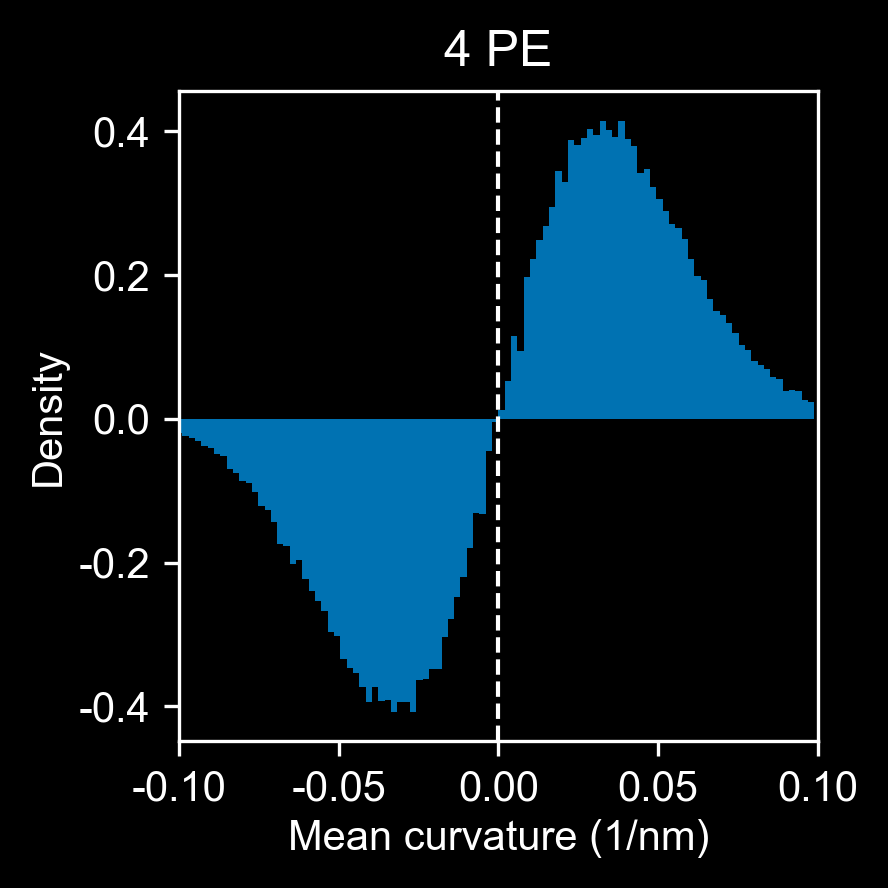

16 Overall mean: 0.0019709806748546958; CDL mean 0.008383021529036864


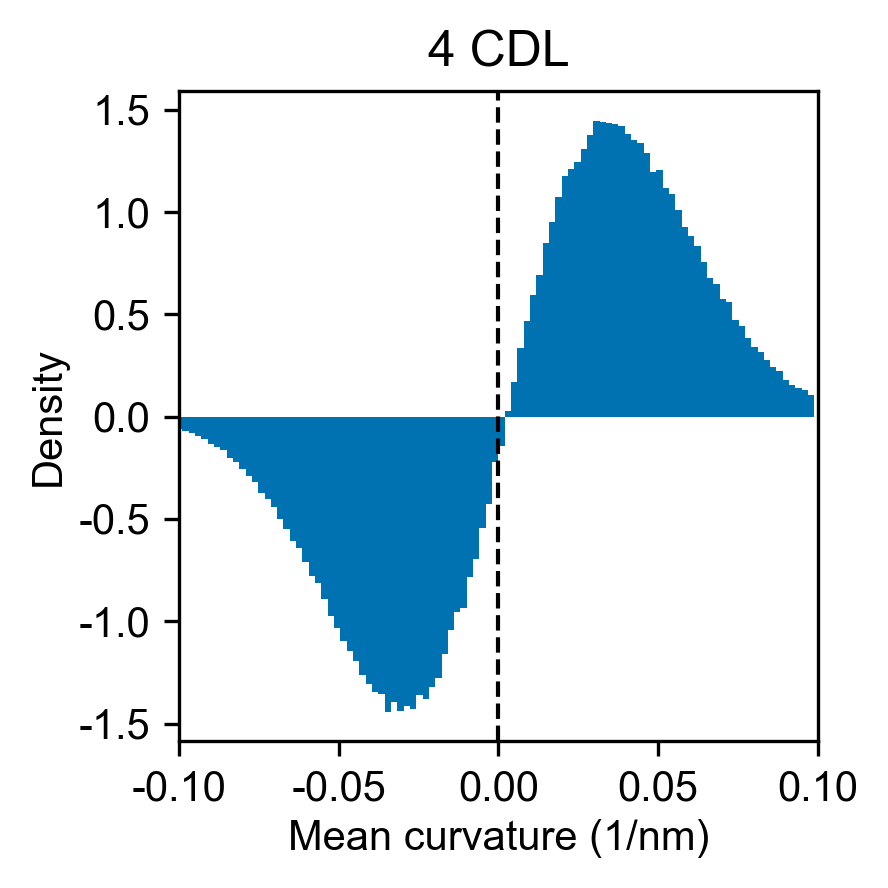

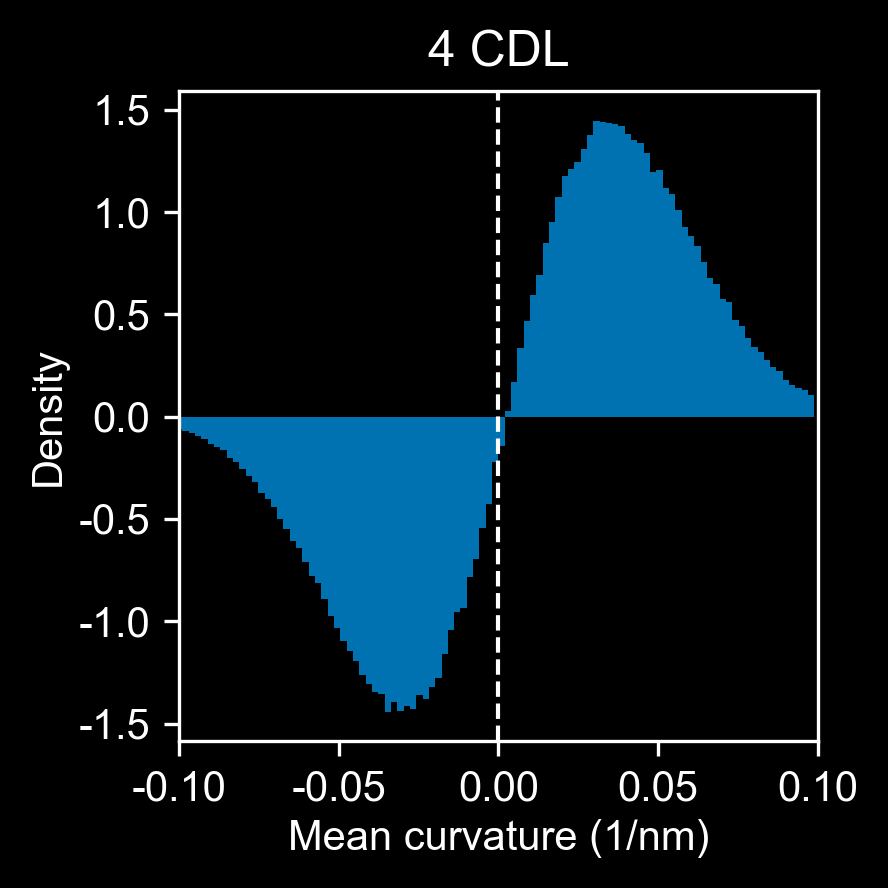

17 Overall mean: 0.001929771454982268; PC mean -0.0004405748464974815


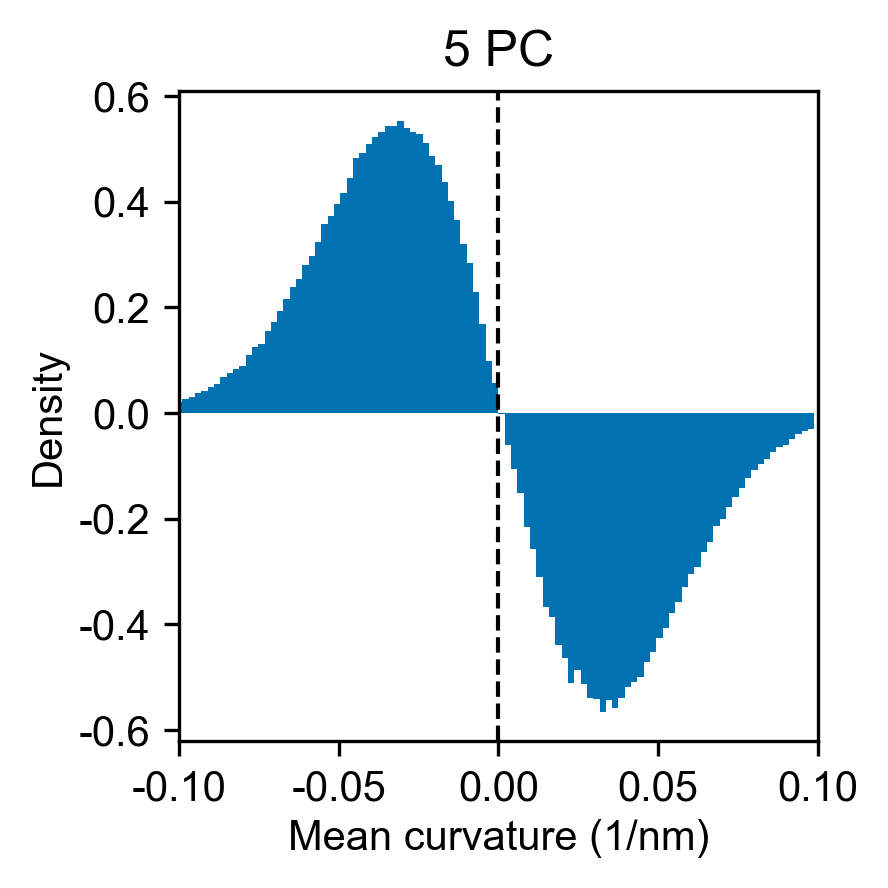

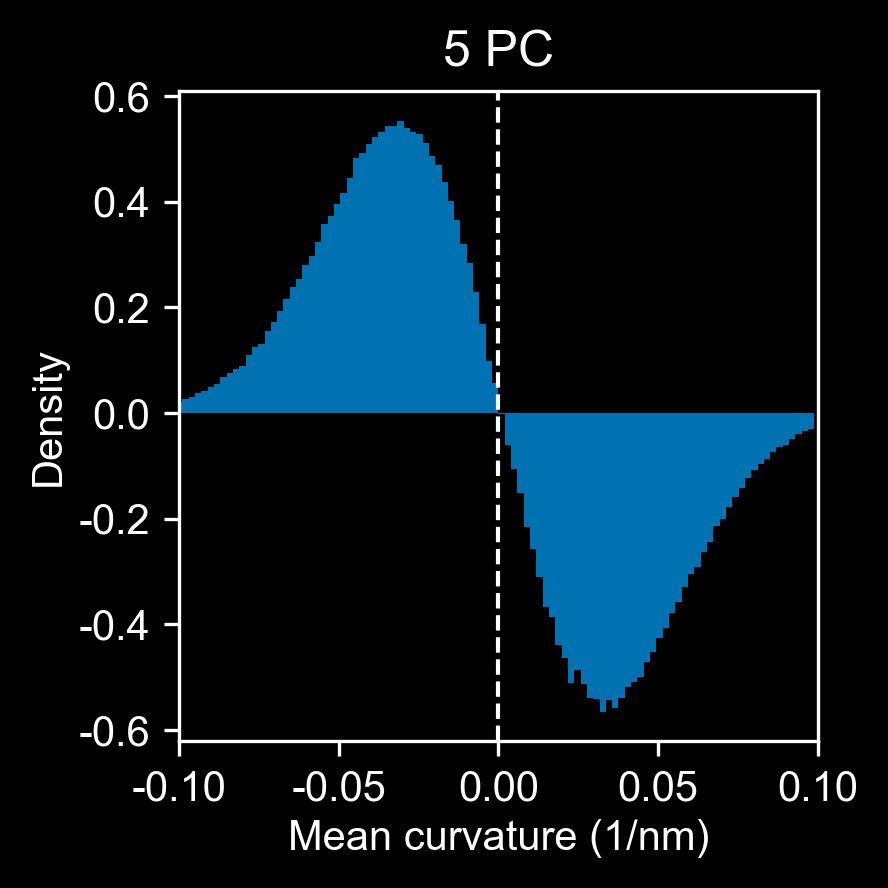

17 Overall mean: 0.001929771454982268; PE mean 0.0033559180859726594


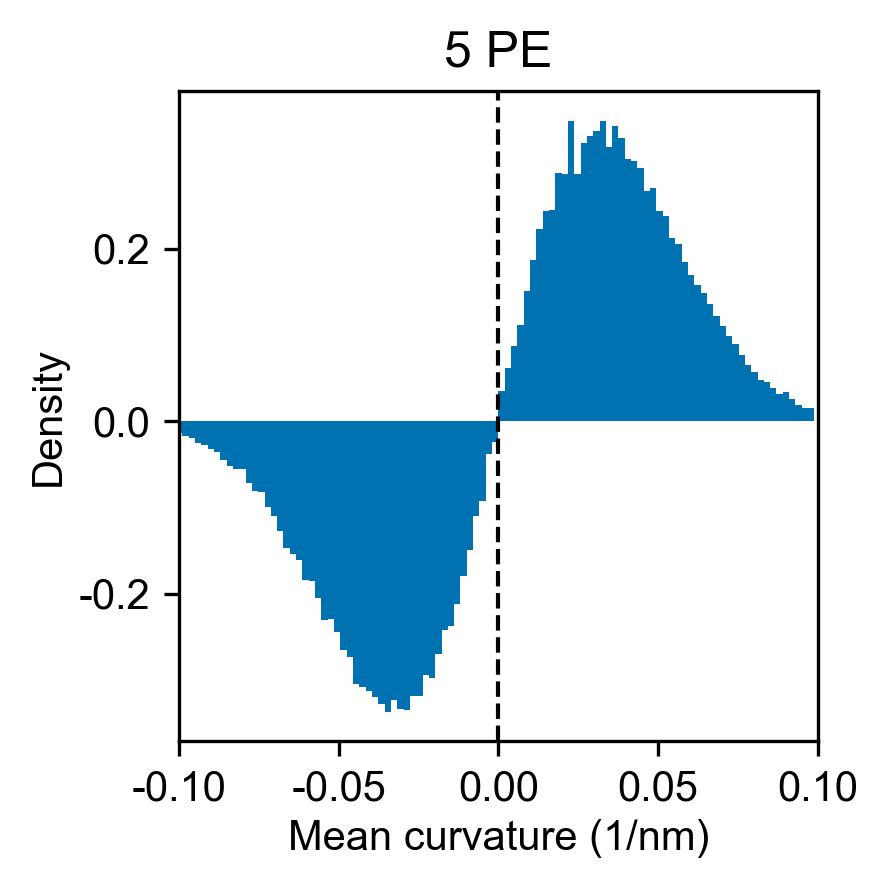

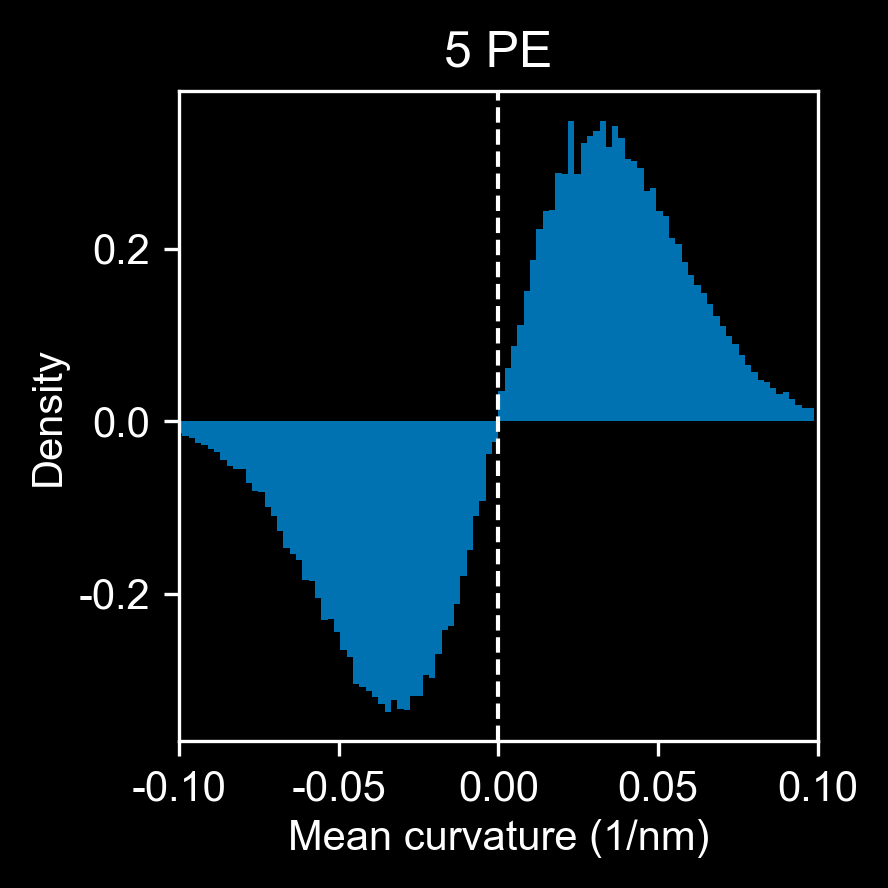

17 Overall mean: 0.001929771454982268; CDL mean 0.00763937032594365


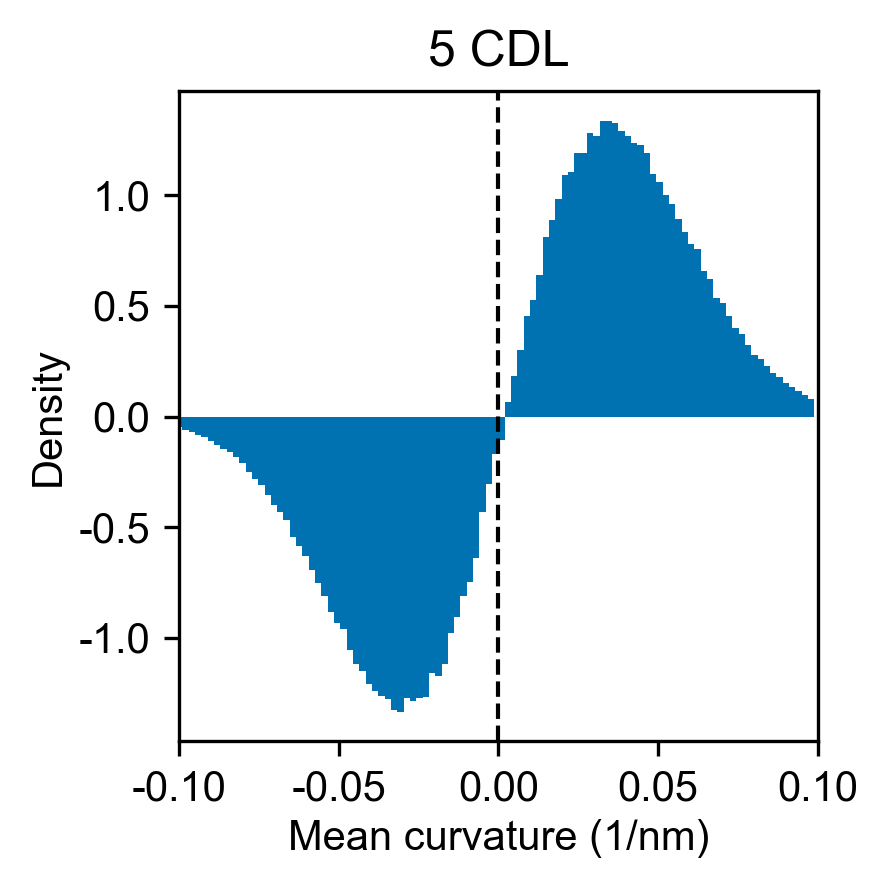

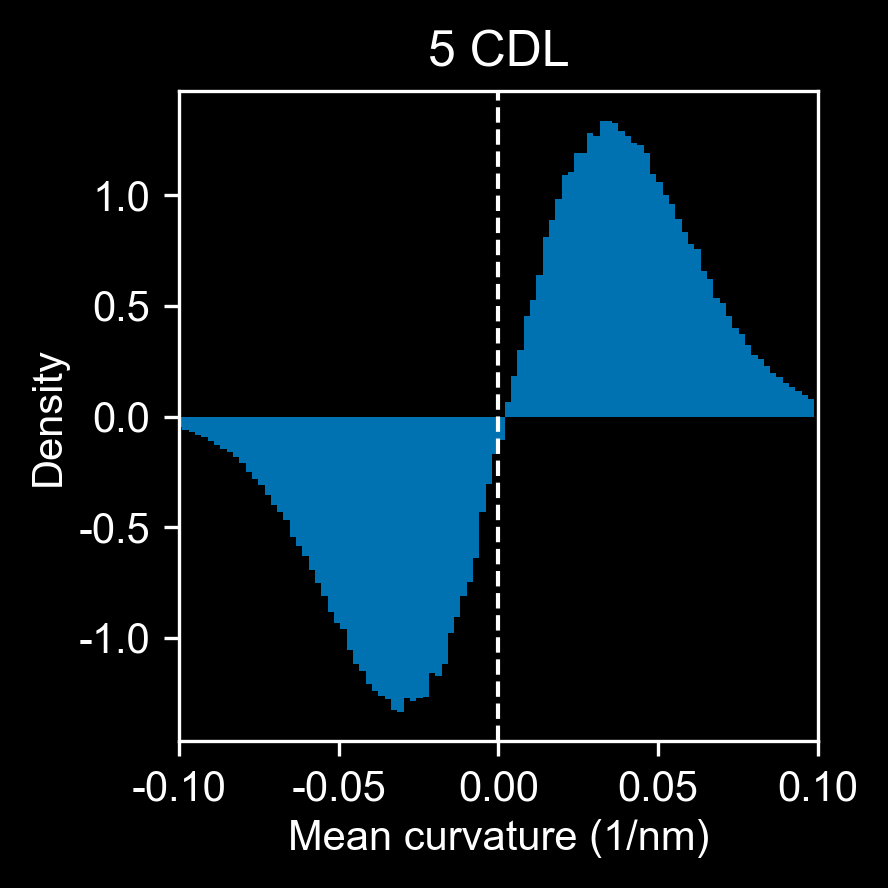

18 Overall mean: 0.0018158494693358968; PC mean -0.0003337690457388439


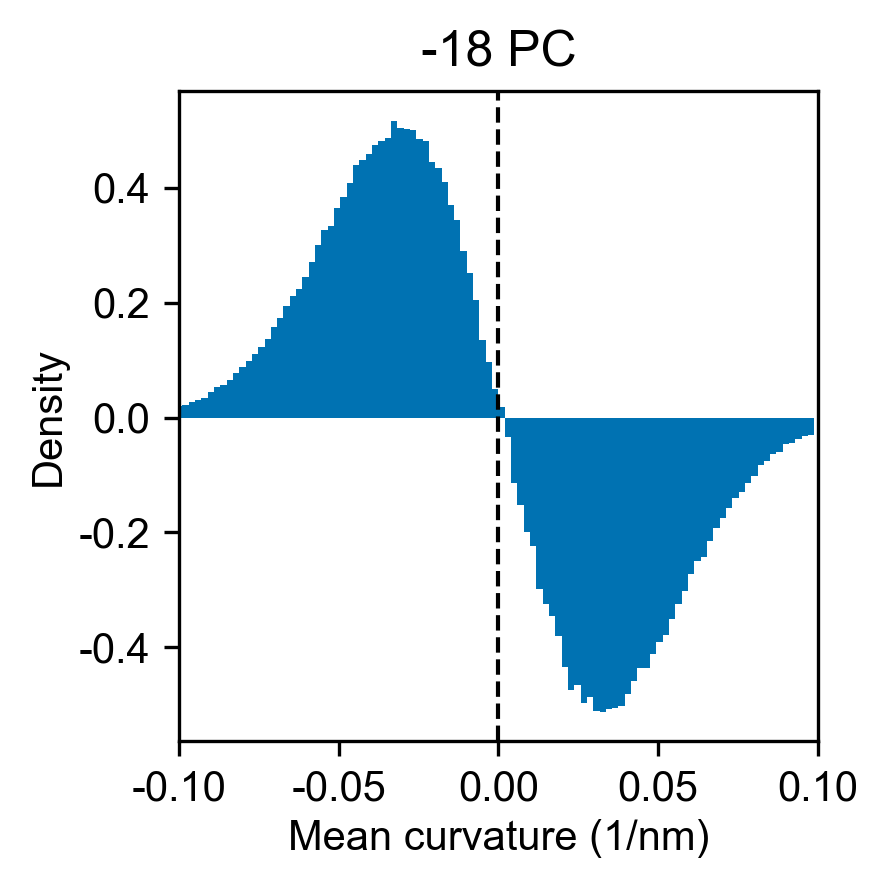

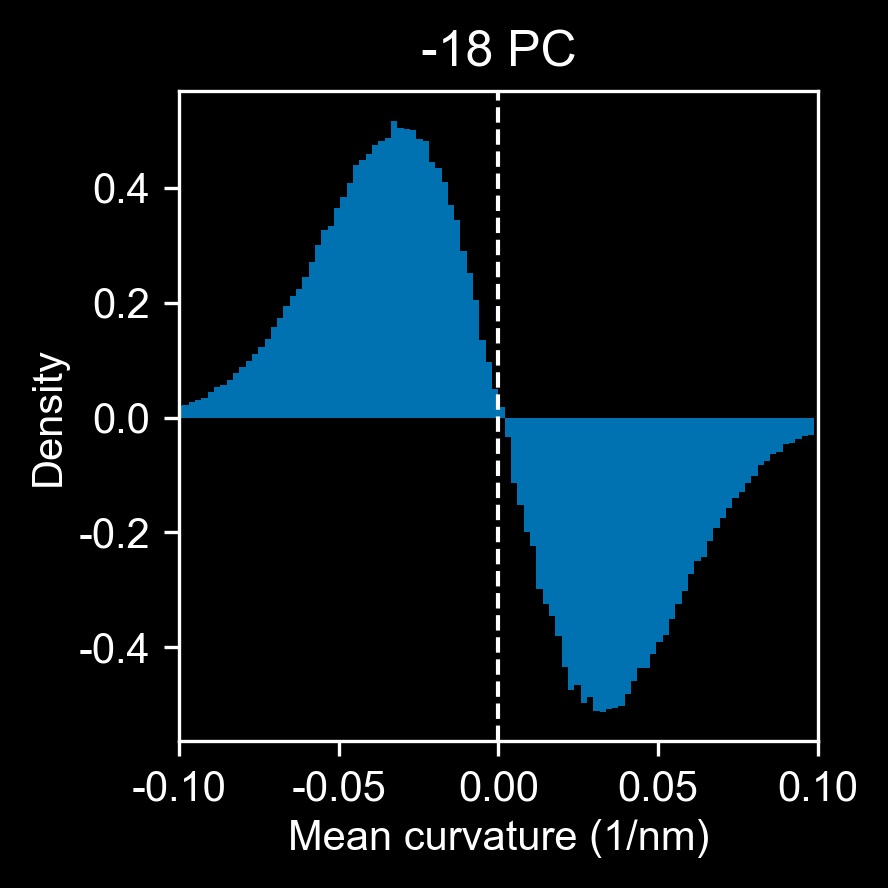

18 Overall mean: 0.0018158494693358968; PE mean 0.0033849156152886643


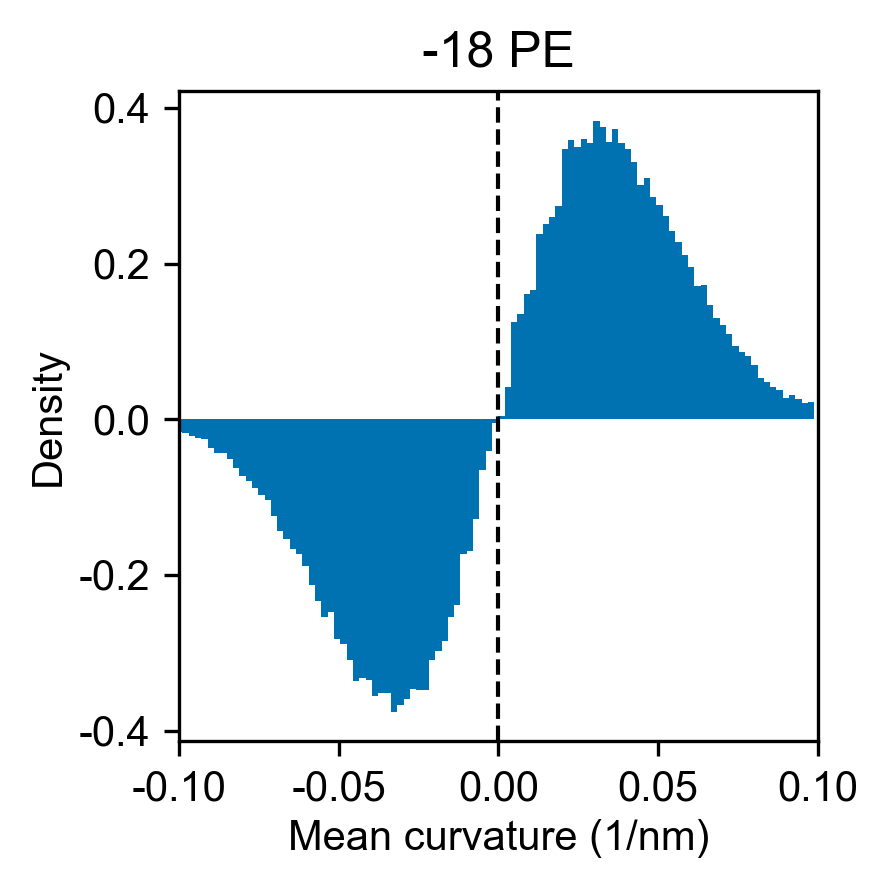

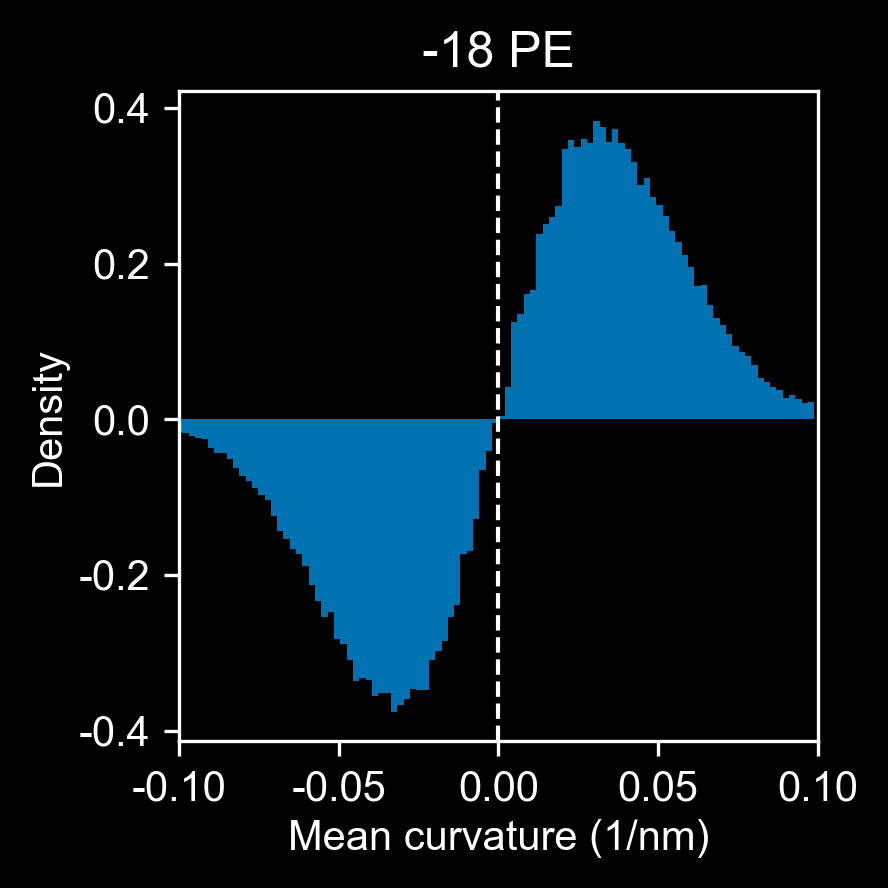

18 Overall mean: 0.0018158494693358968; CDL mean 0.007662006664061699


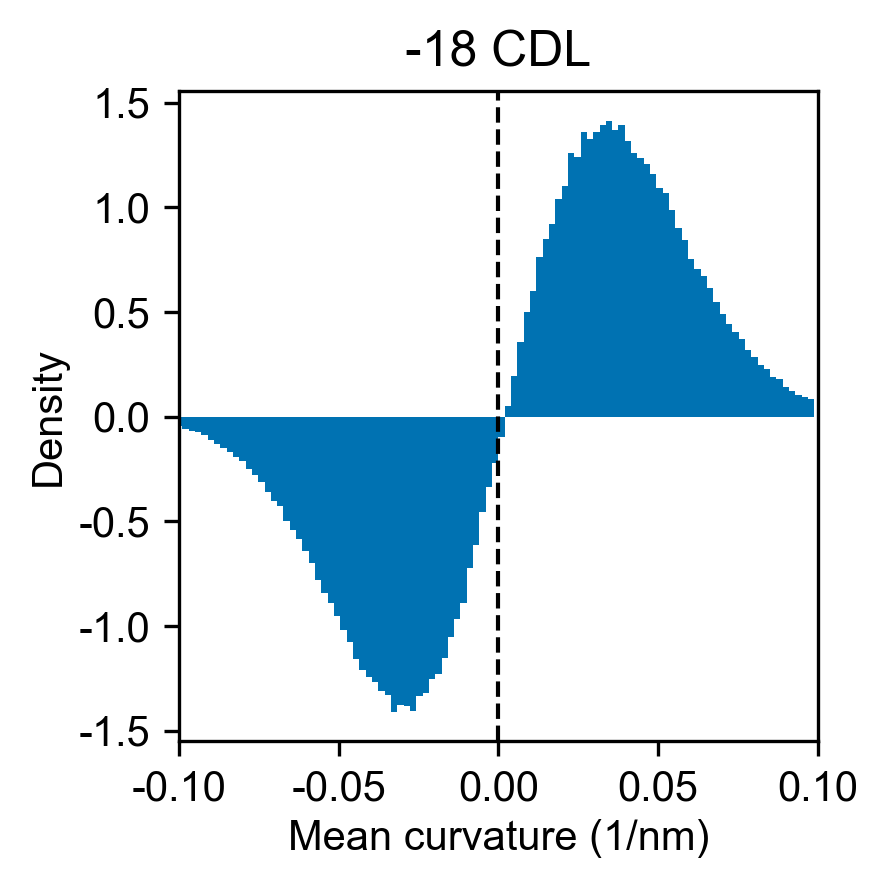

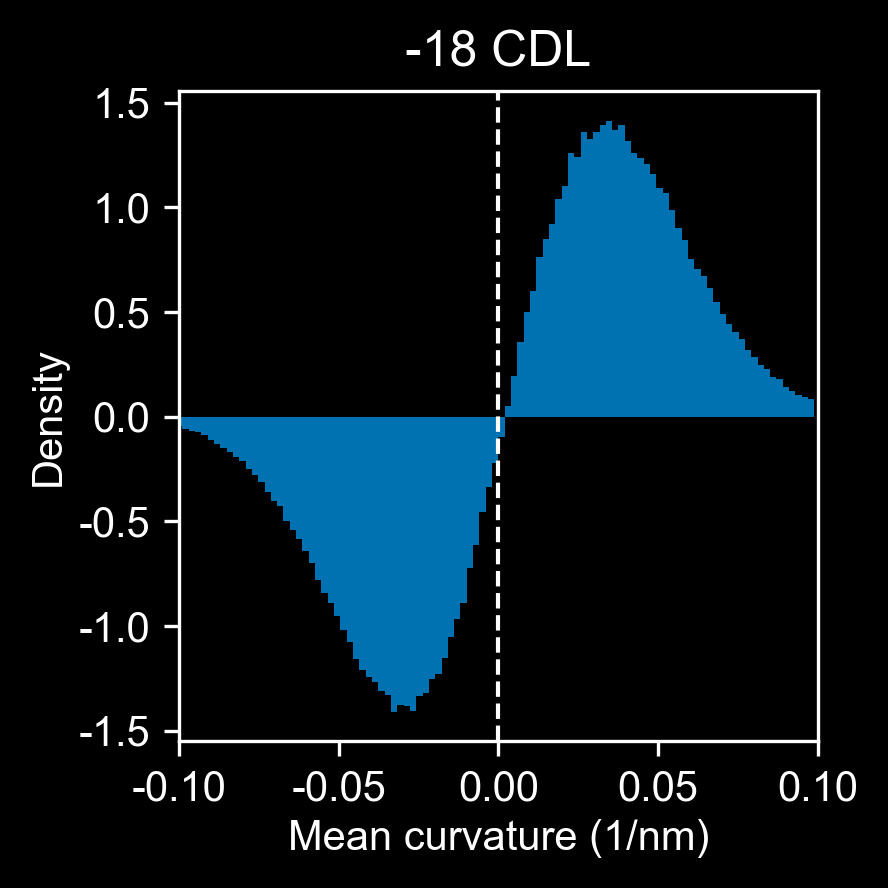

19 Overall mean: 0.002701980383547498; CDL mean 0.002701980383547498


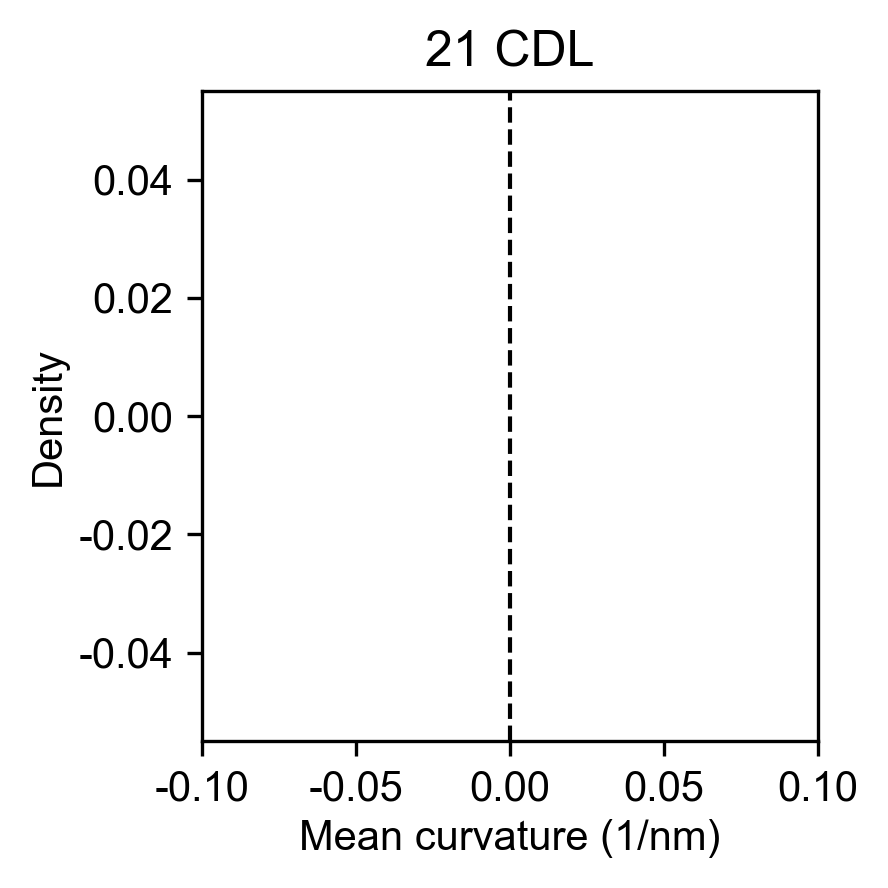

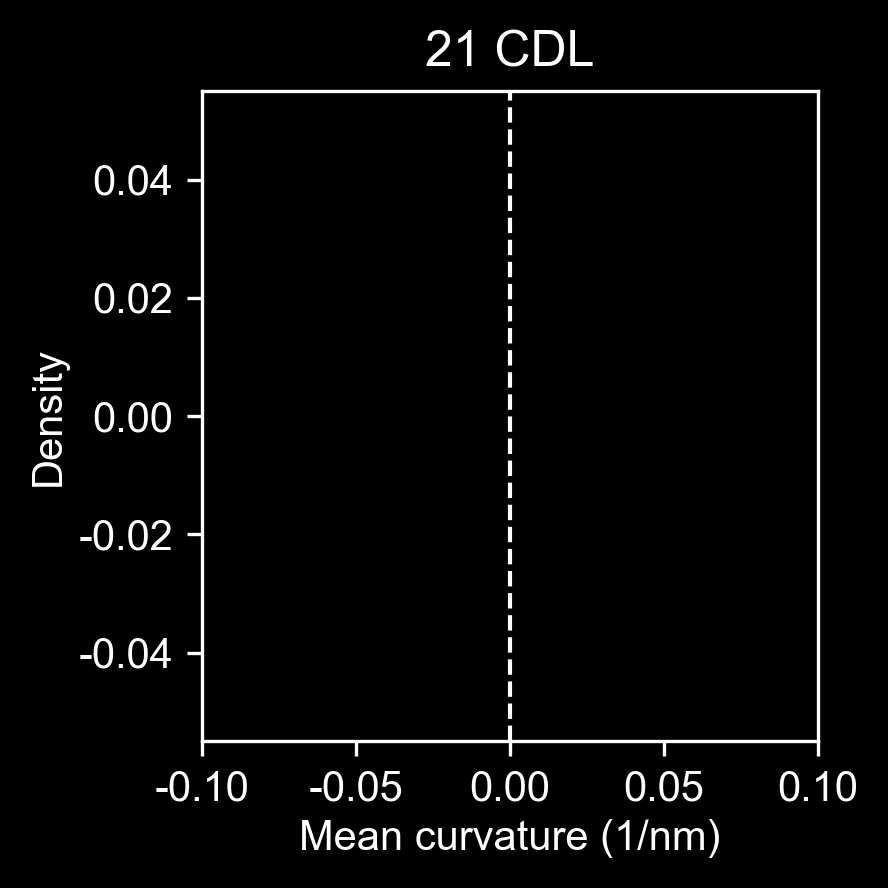

20 Overall mean: 0.001737656117577094; PC mean -0.0008689147144557004


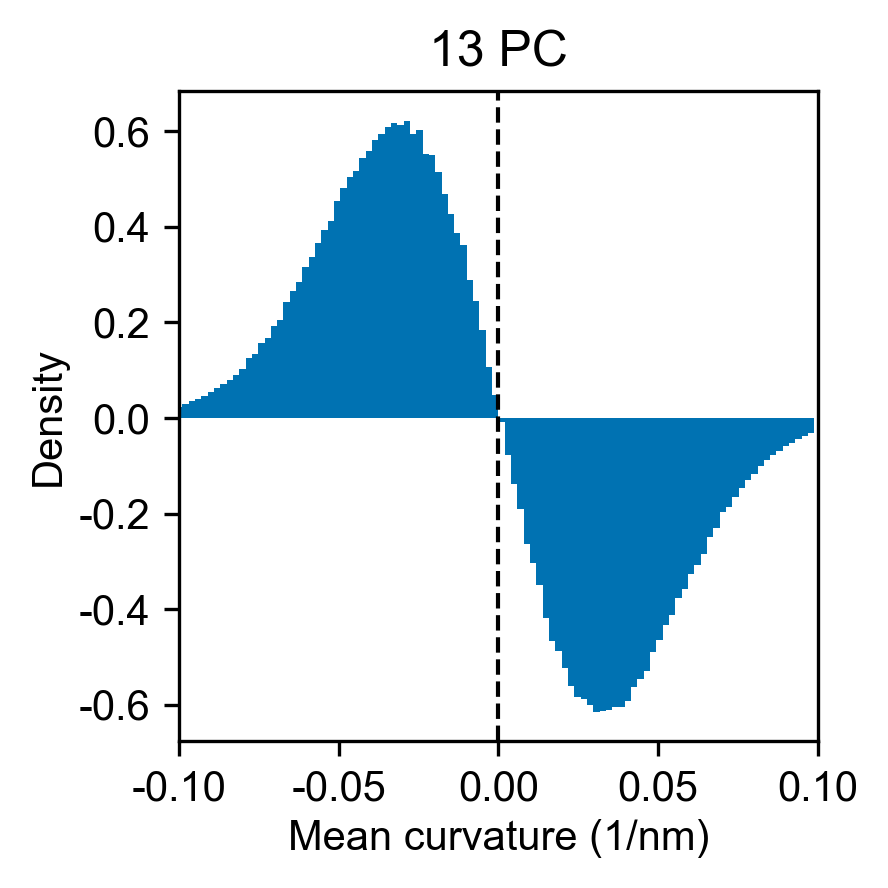

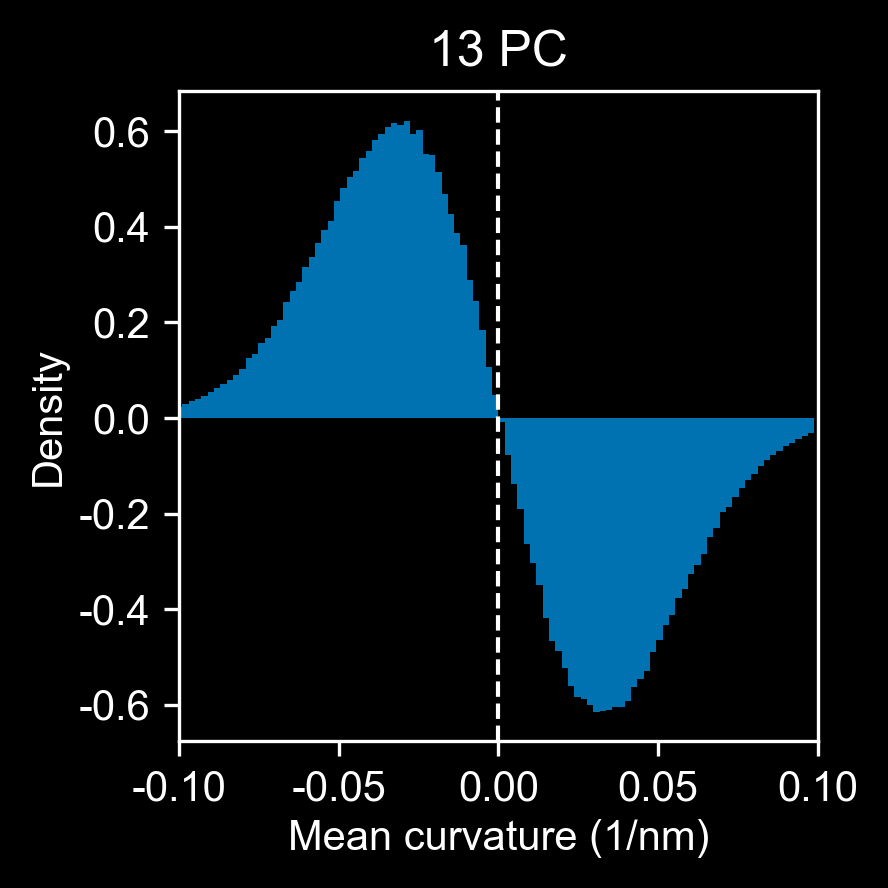

20 Overall mean: 0.001737656117577094; PE mean 0.0031033771414996913


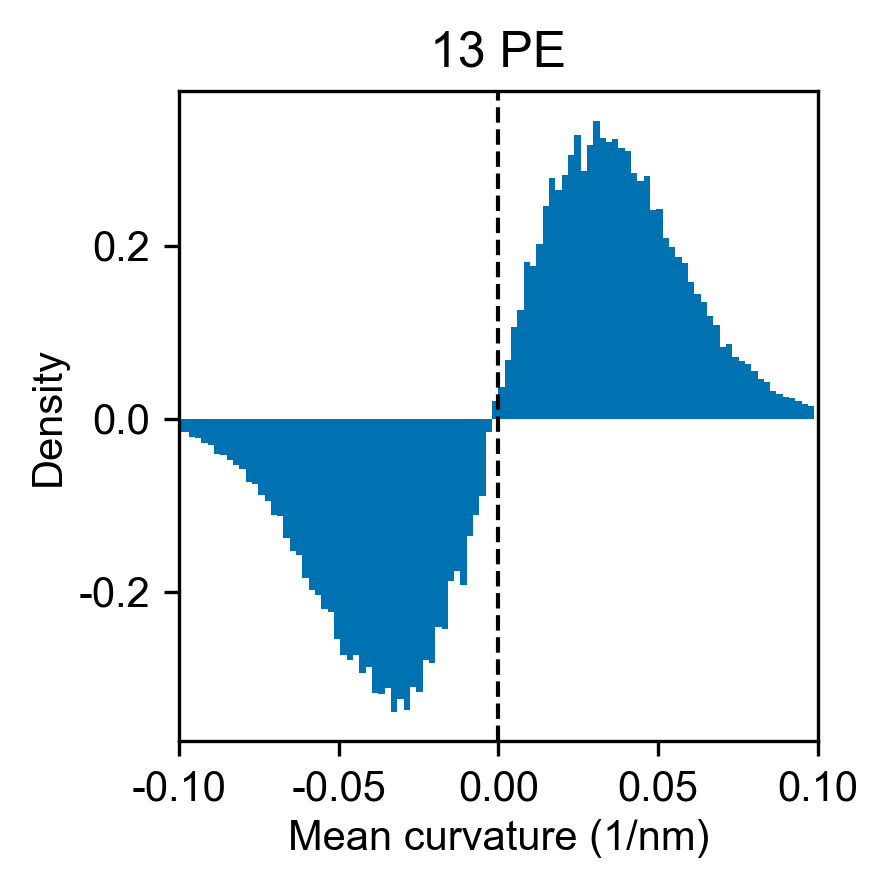

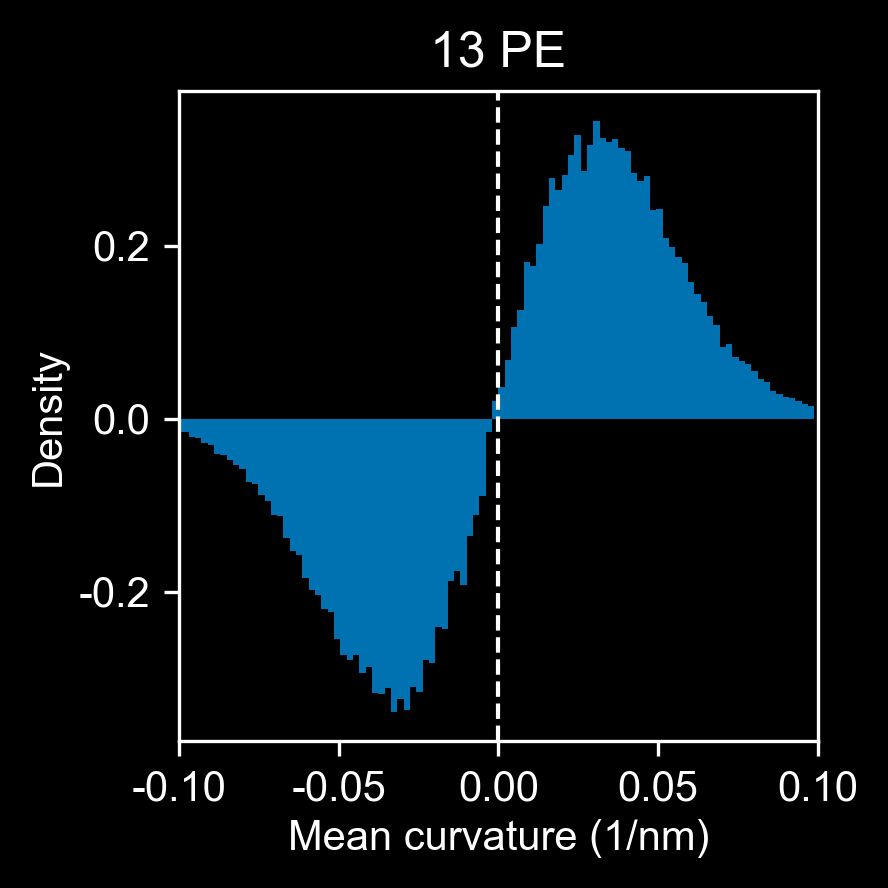

20 Overall mean: 0.001737656117577094; CDL mean 0.006212304279063391


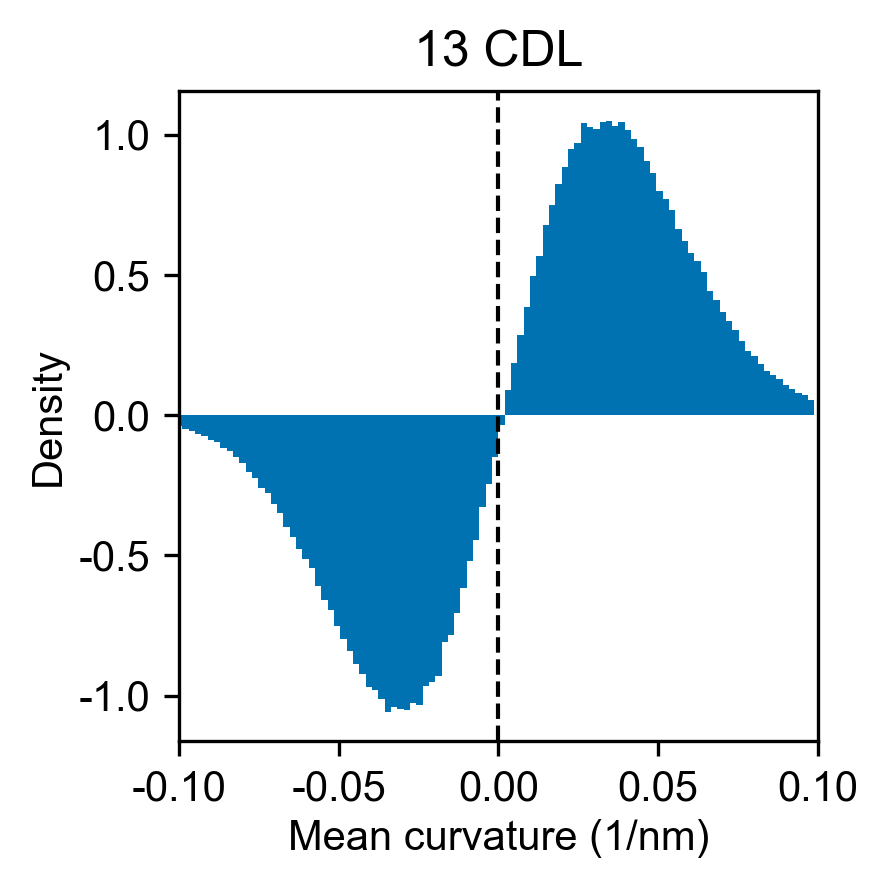

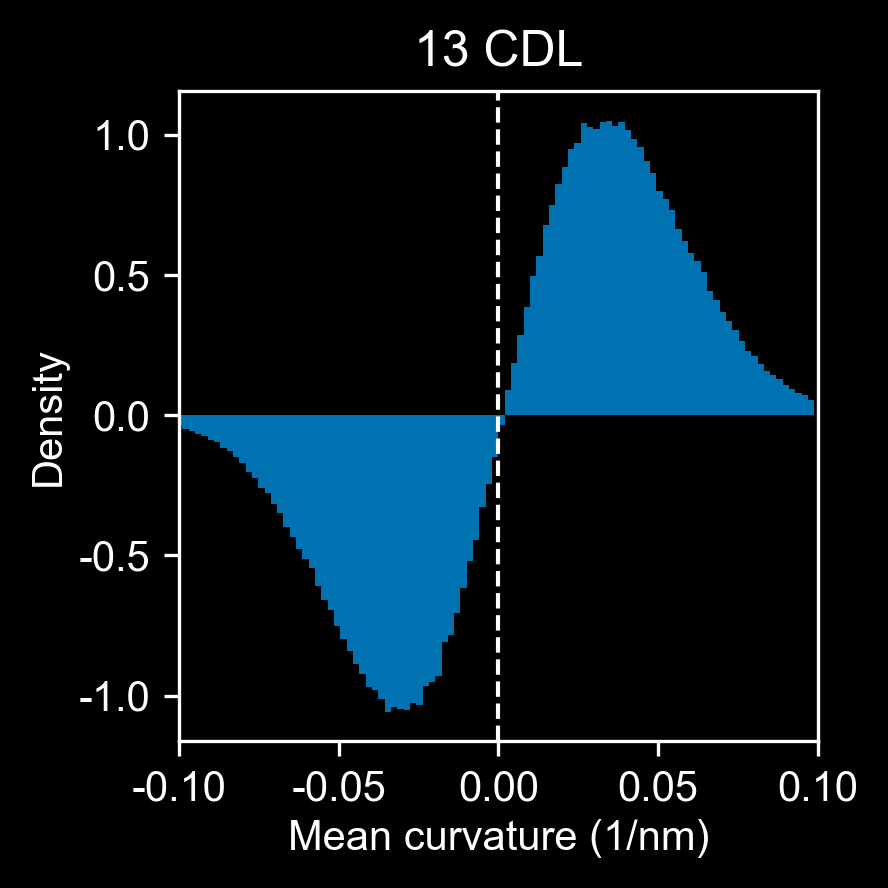

21 Overall mean: 0.0021320677784356203; PC mean -0.0008578470287976328


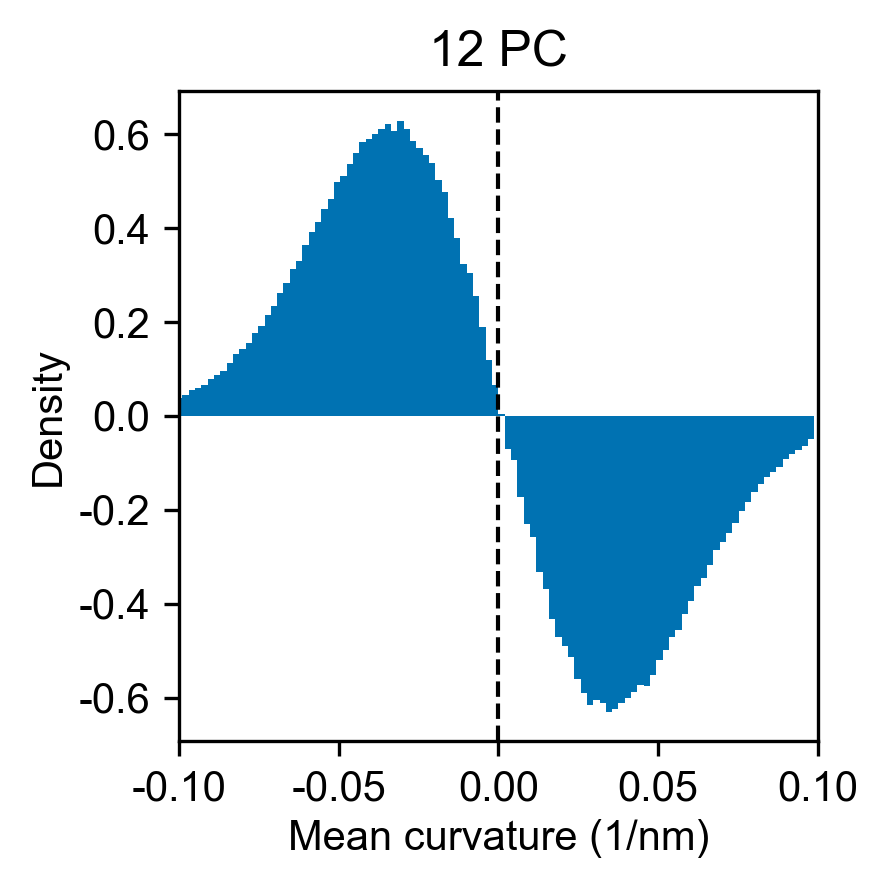

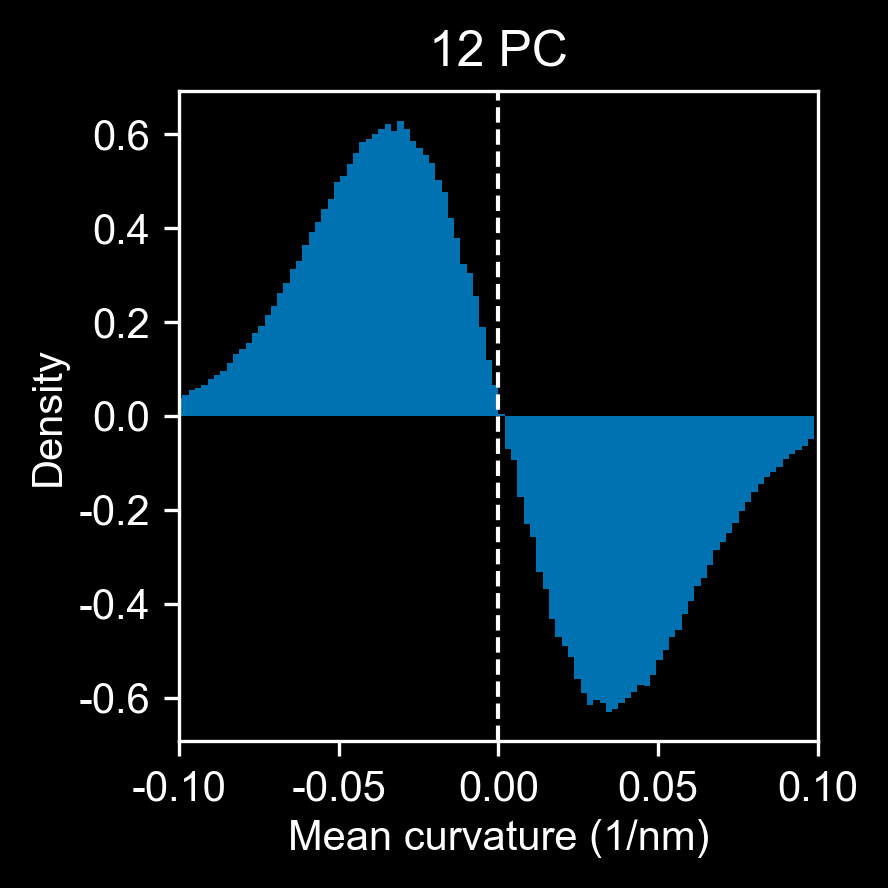

21 Overall mean: 0.0021320677784356203; PE mean 0.003506794605931397


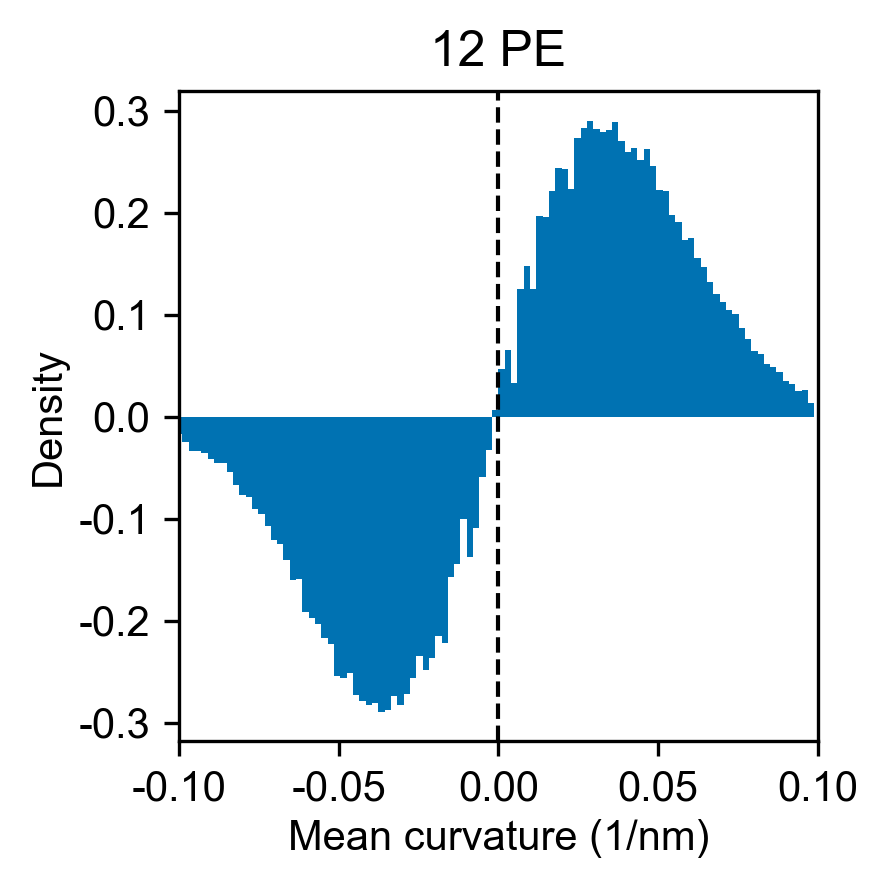

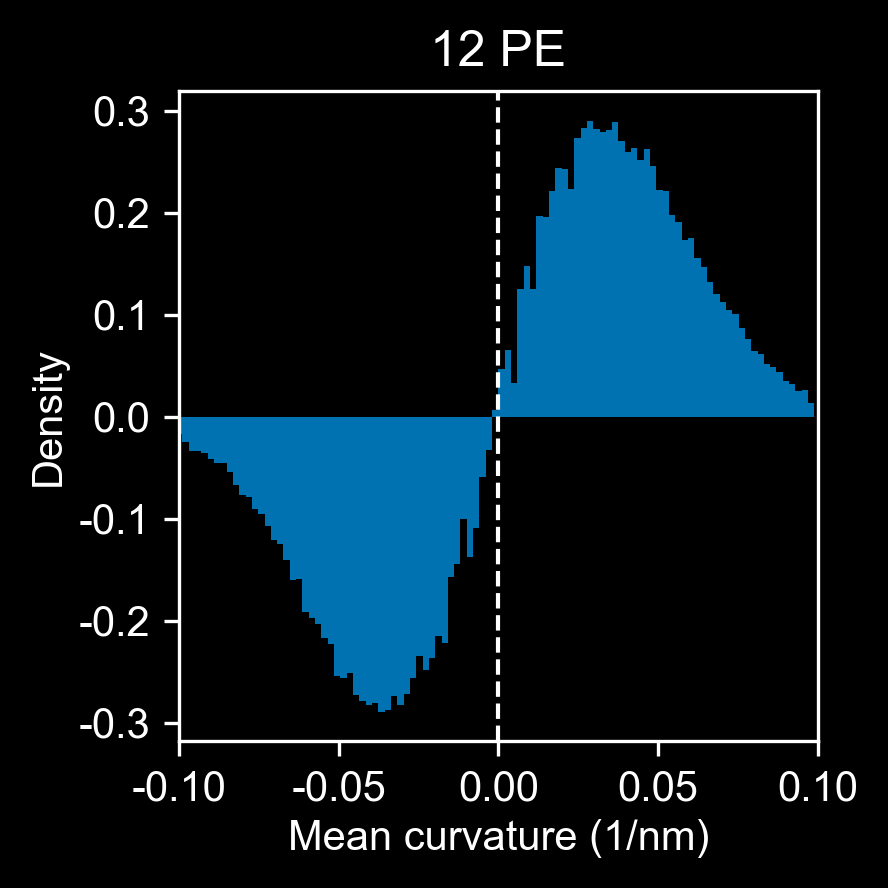

21 Overall mean: 0.0021320677784356203; CDL mean 0.007548732178305572


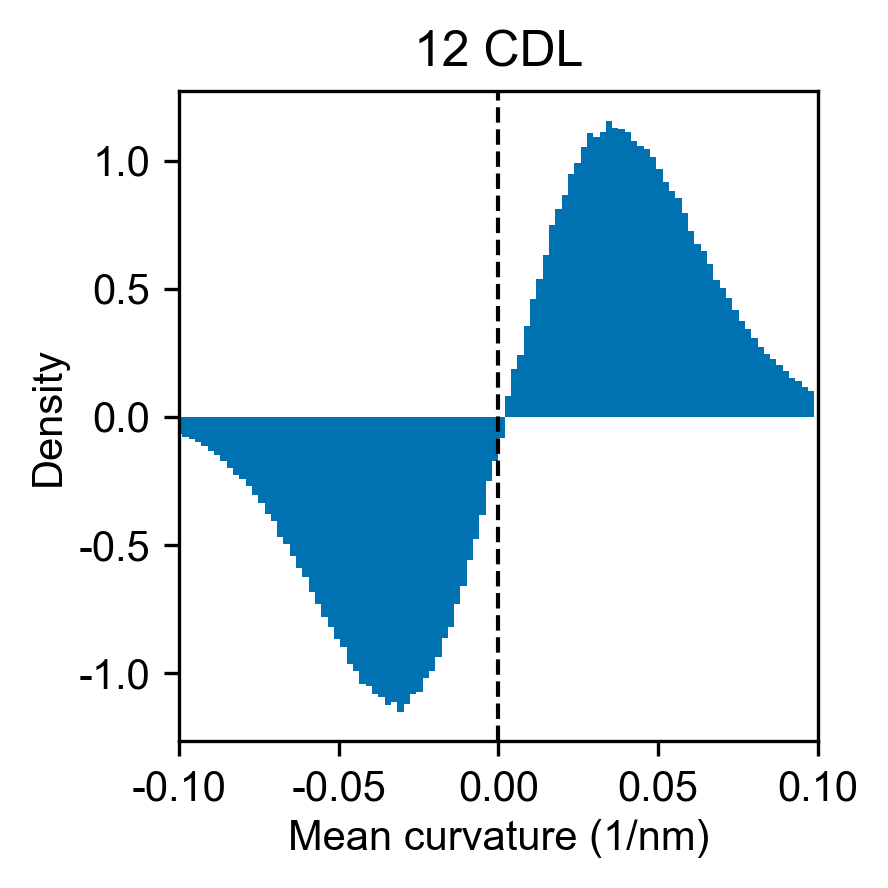

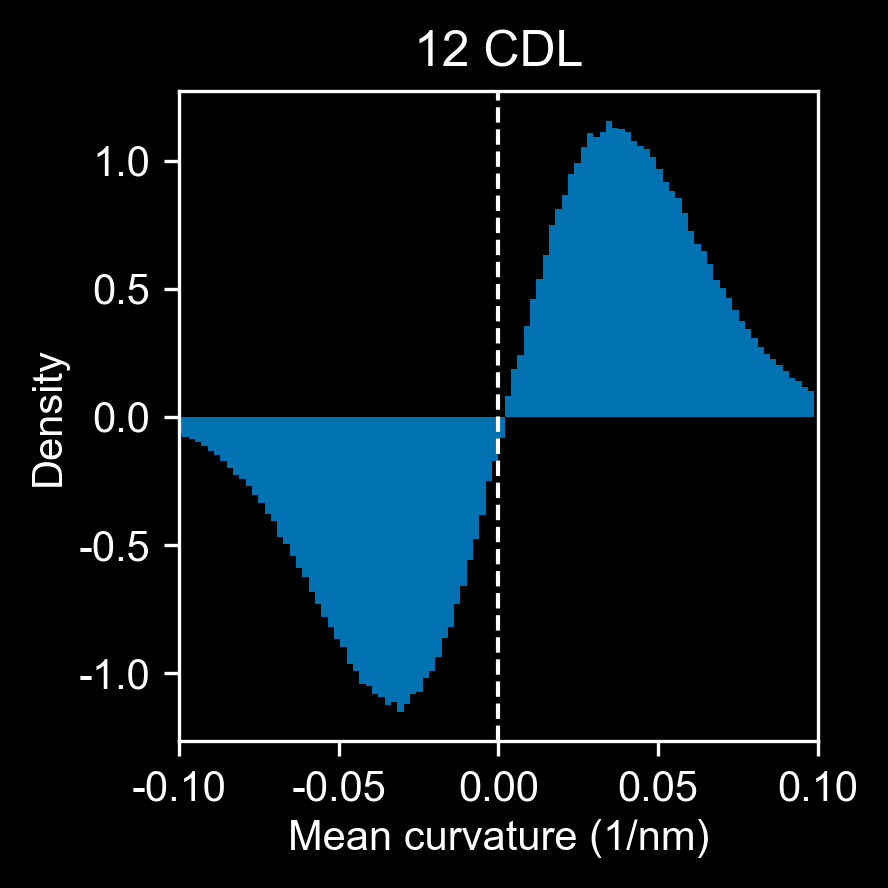

22 Overall mean: 0.0020098749478276758; PC mean -0.0005776461864115186


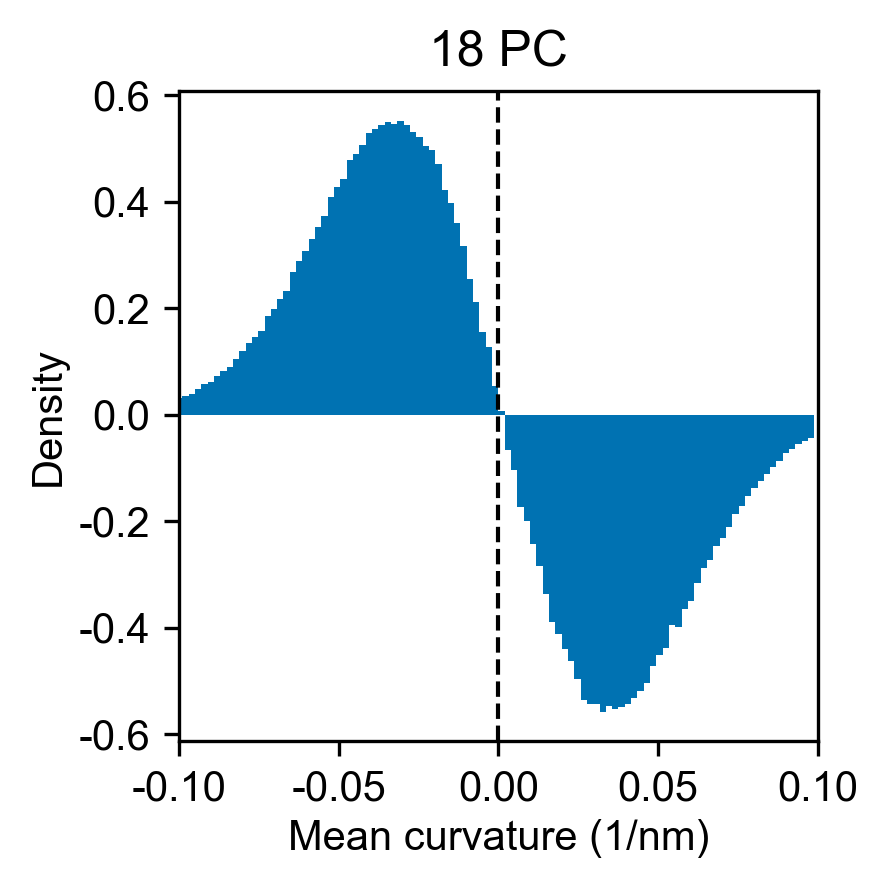

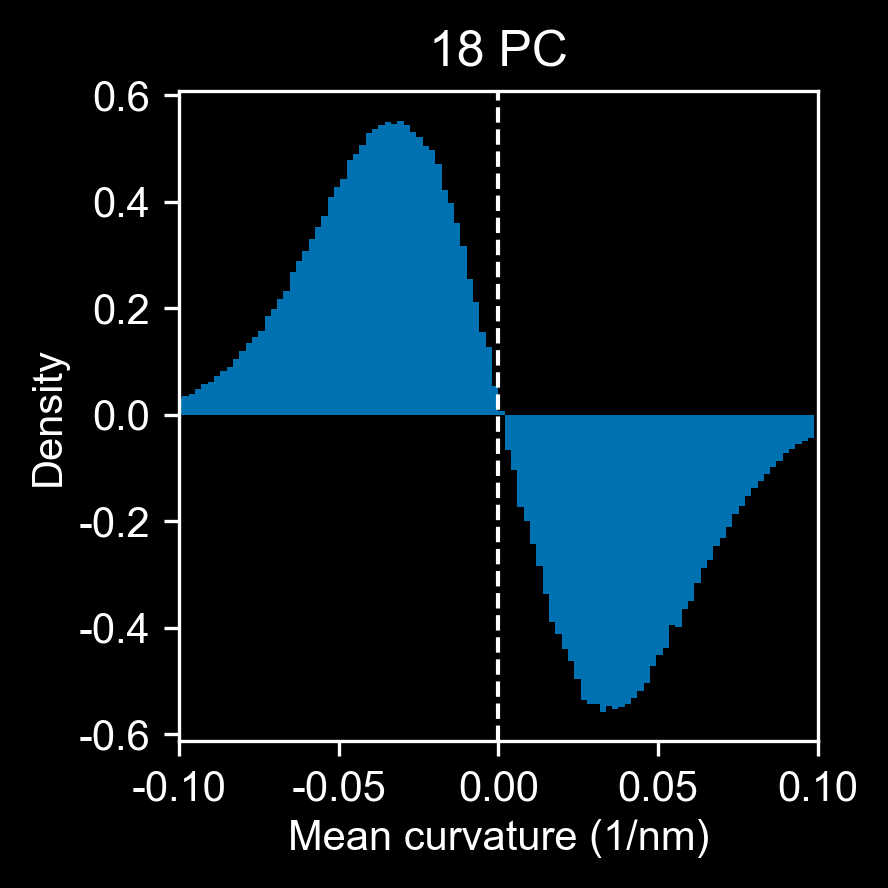

22 Overall mean: 0.0020098749478276758; PE mean 0.0035513760241828126


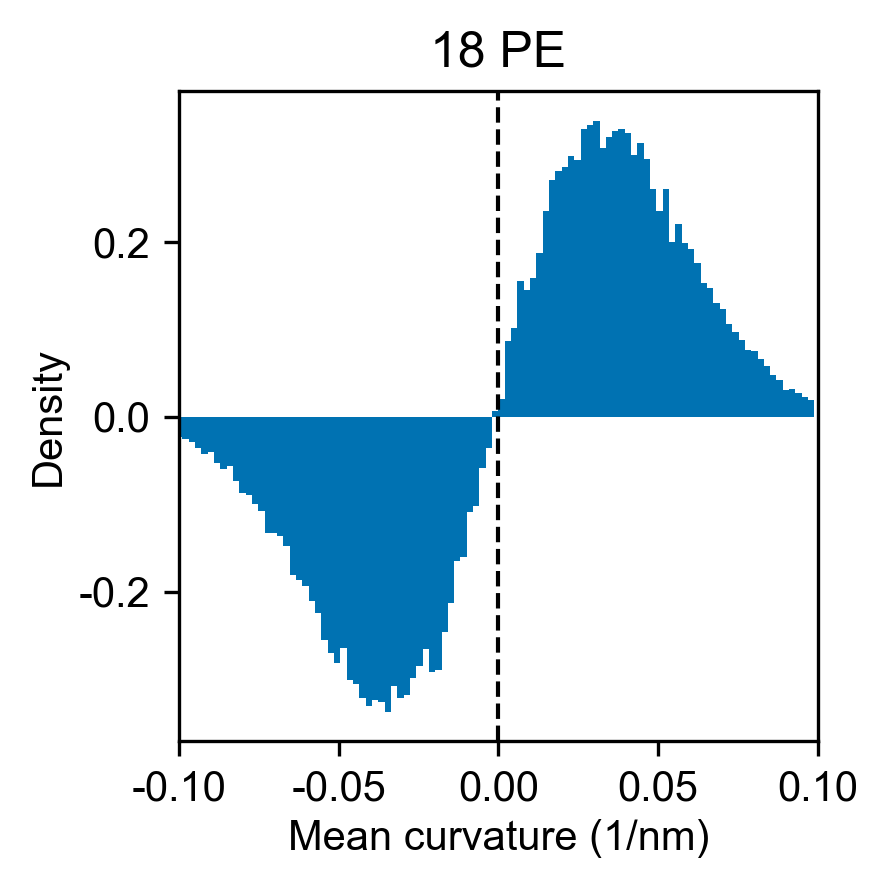

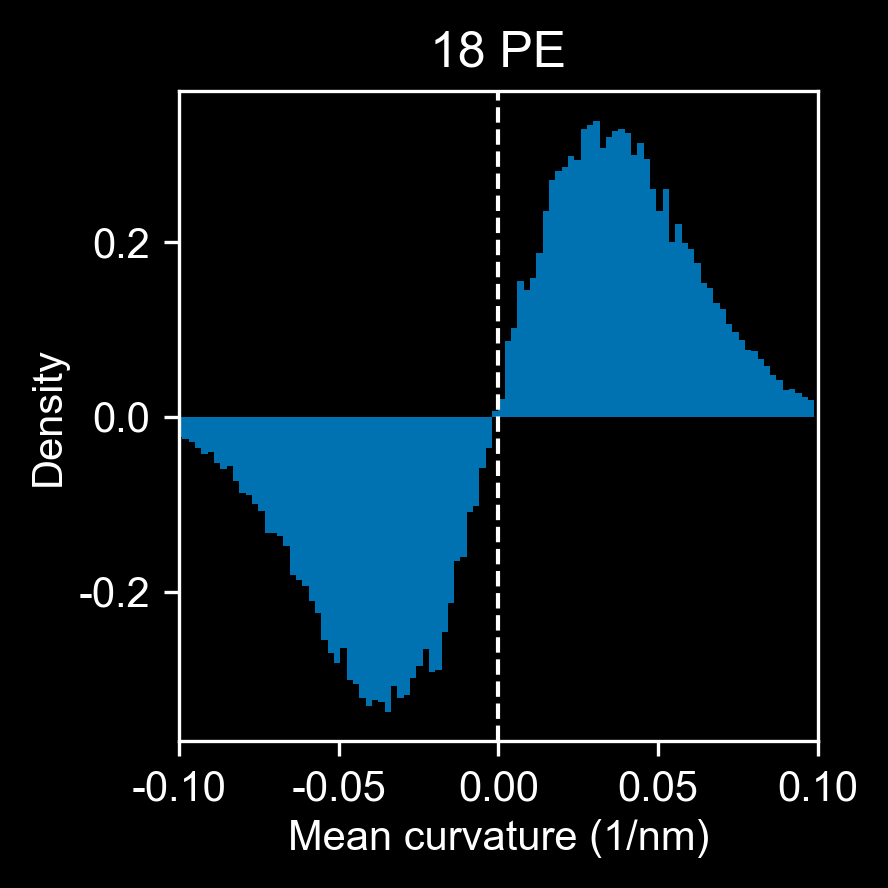

22 Overall mean: 0.0020098749478276758; CDL mean 0.008129762209229438


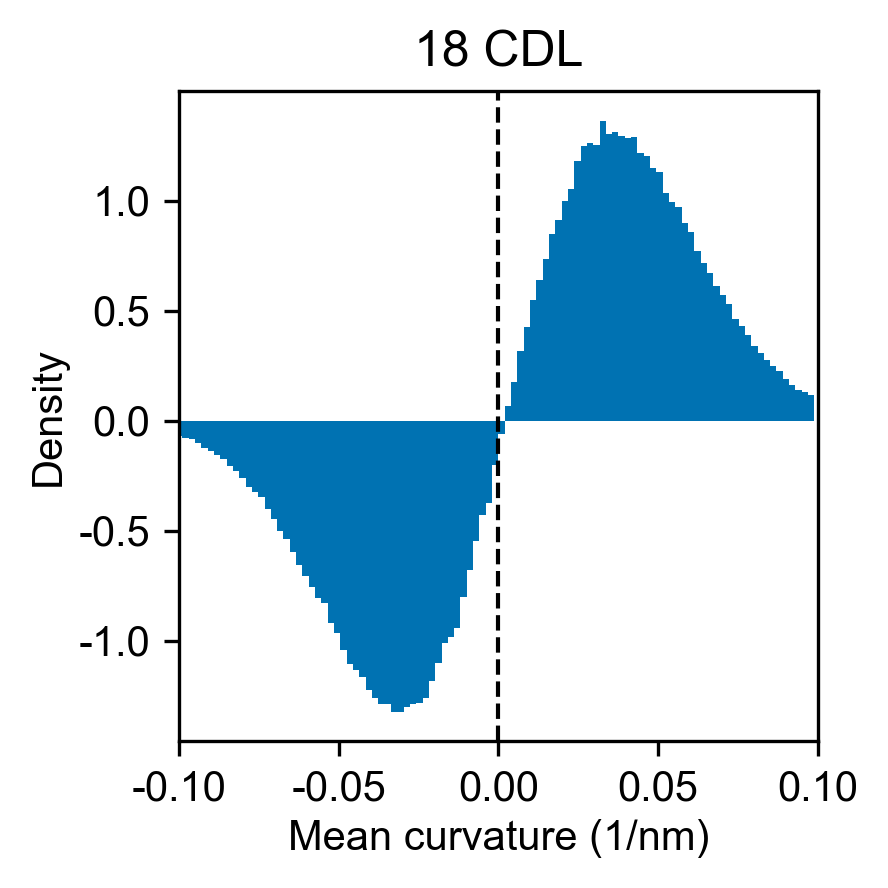

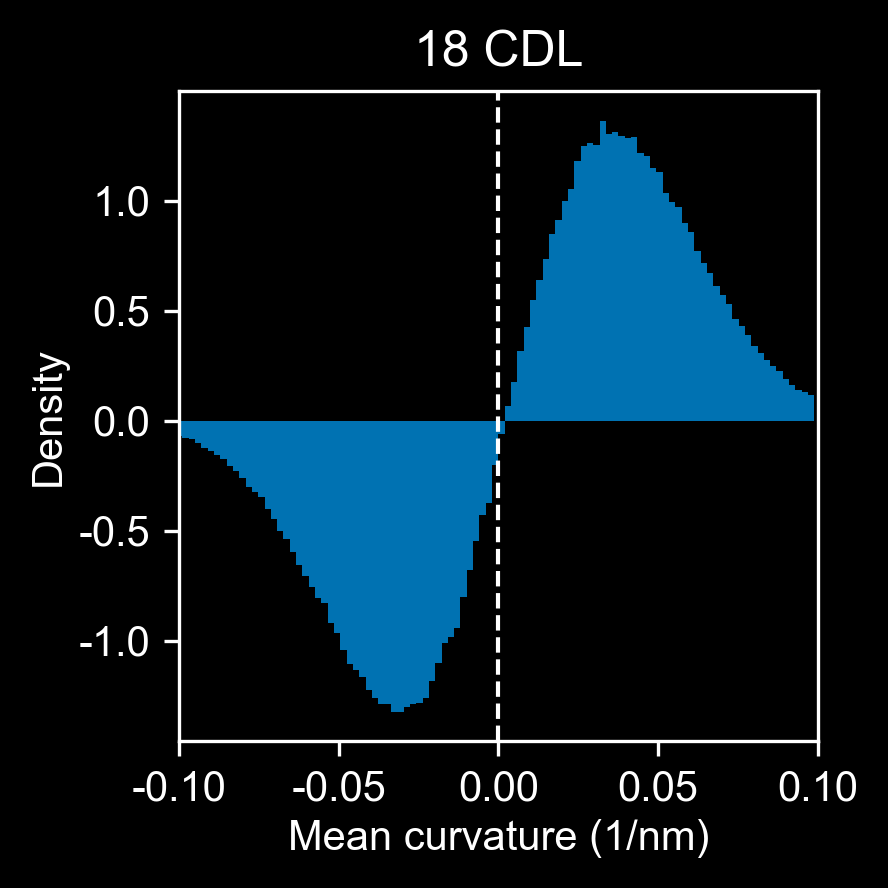

23 Overall mean: 0.0019156772760803818; PC mean -2.5177514556985704e-05


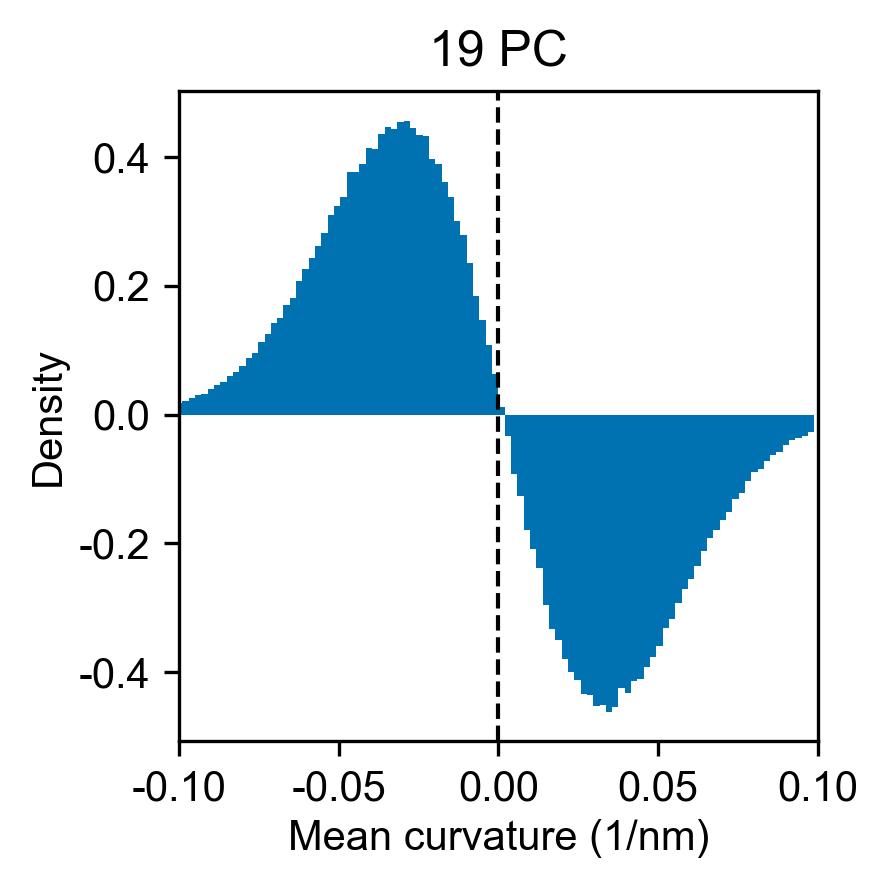

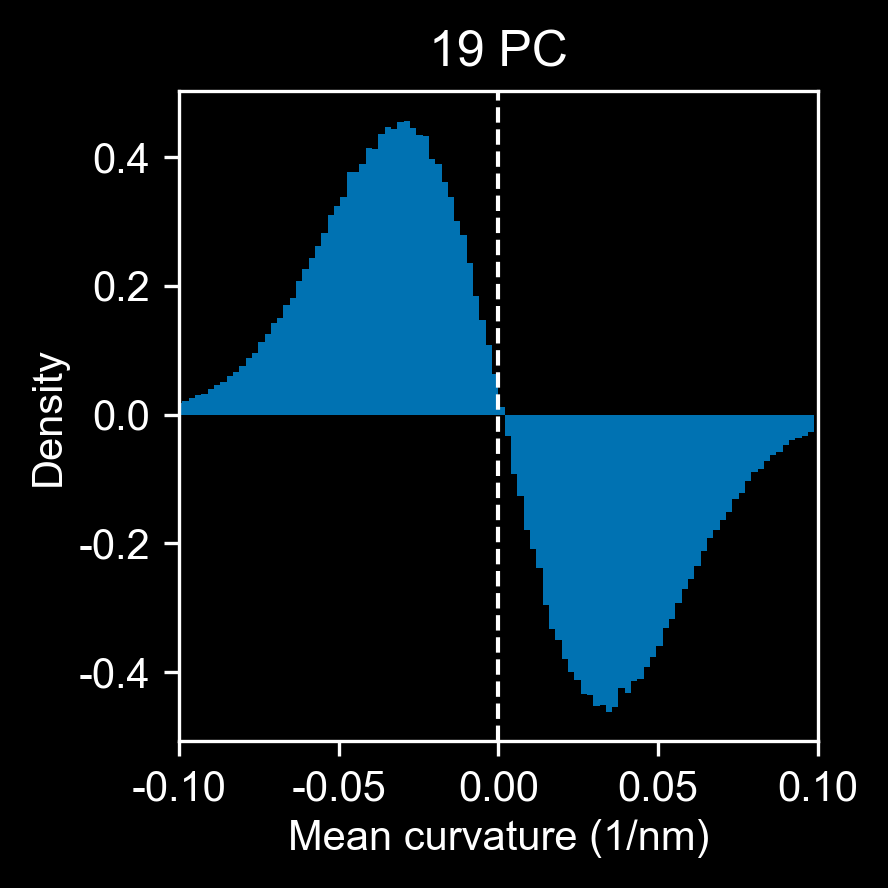

23 Overall mean: 0.0019156772760803818; PE mean 0.0037045043224047556


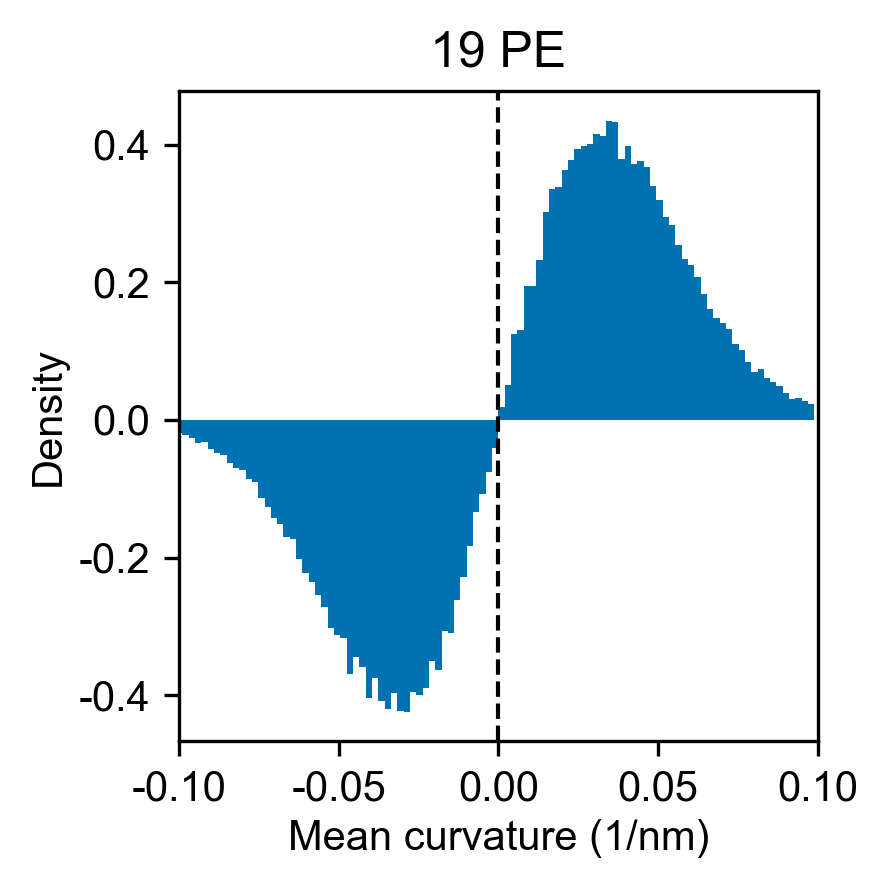

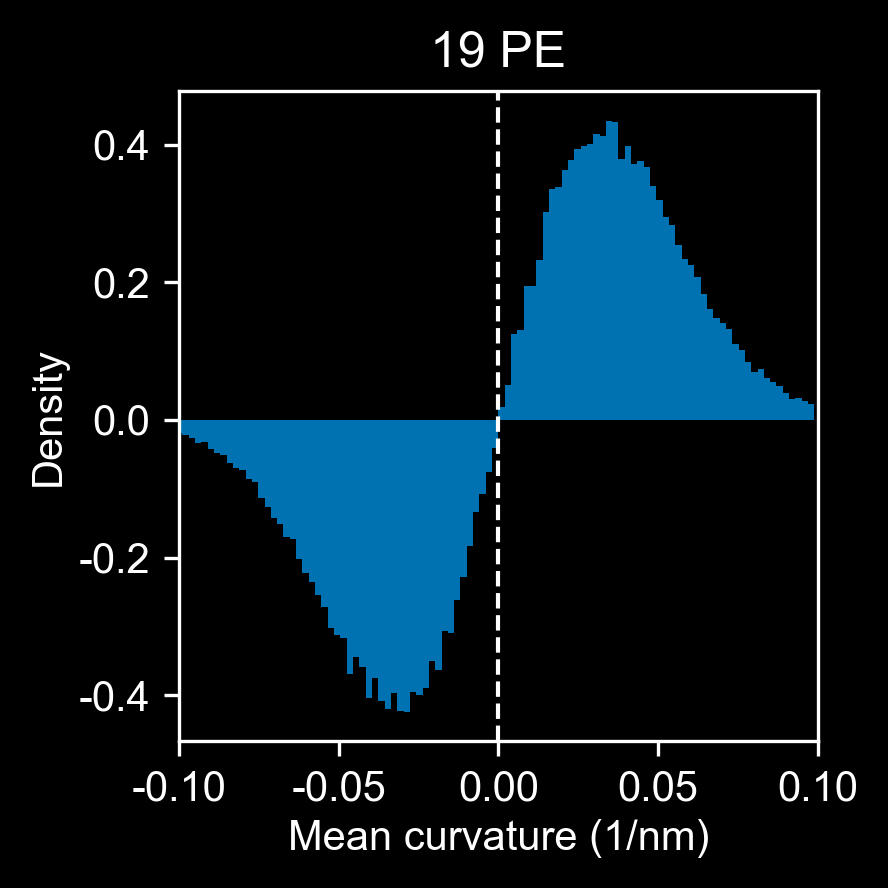

23 Overall mean: 0.0019156772760803818; CDL mean 0.008711936284472106


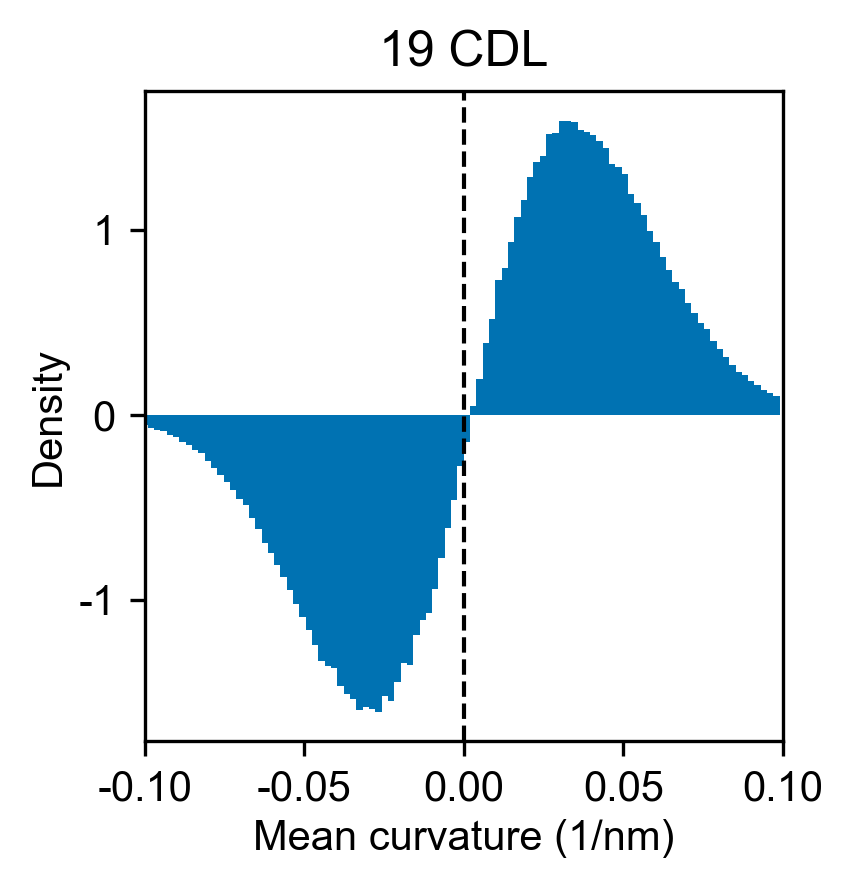

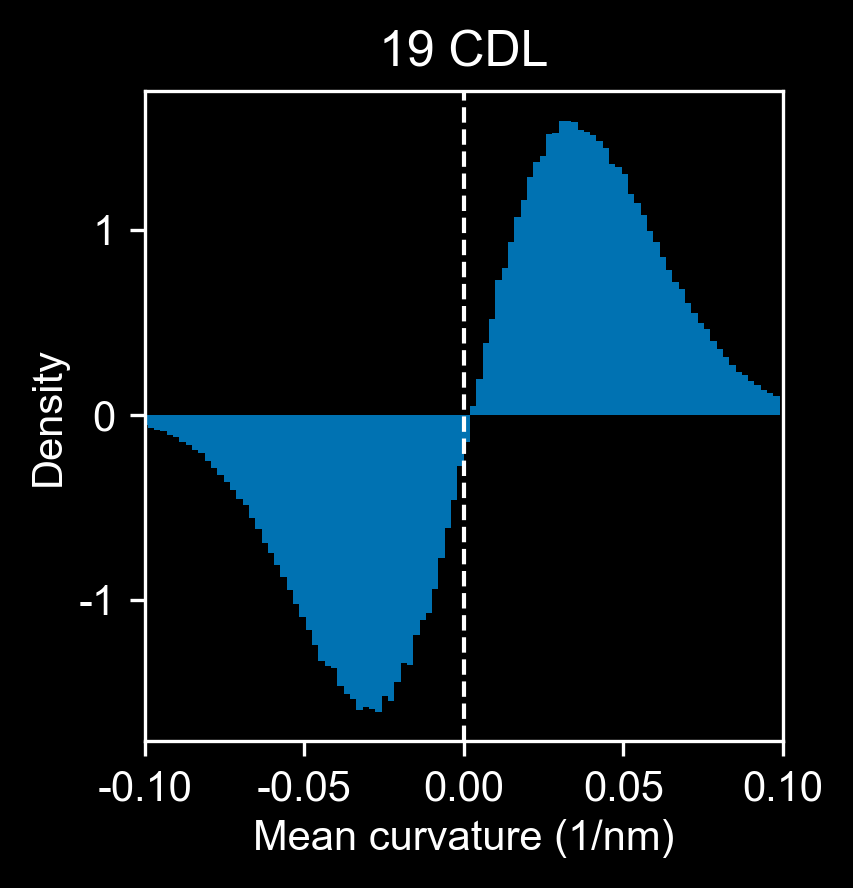

24 Overall mean: 0.001988364843649337; PC mean -0.0007263428092937049


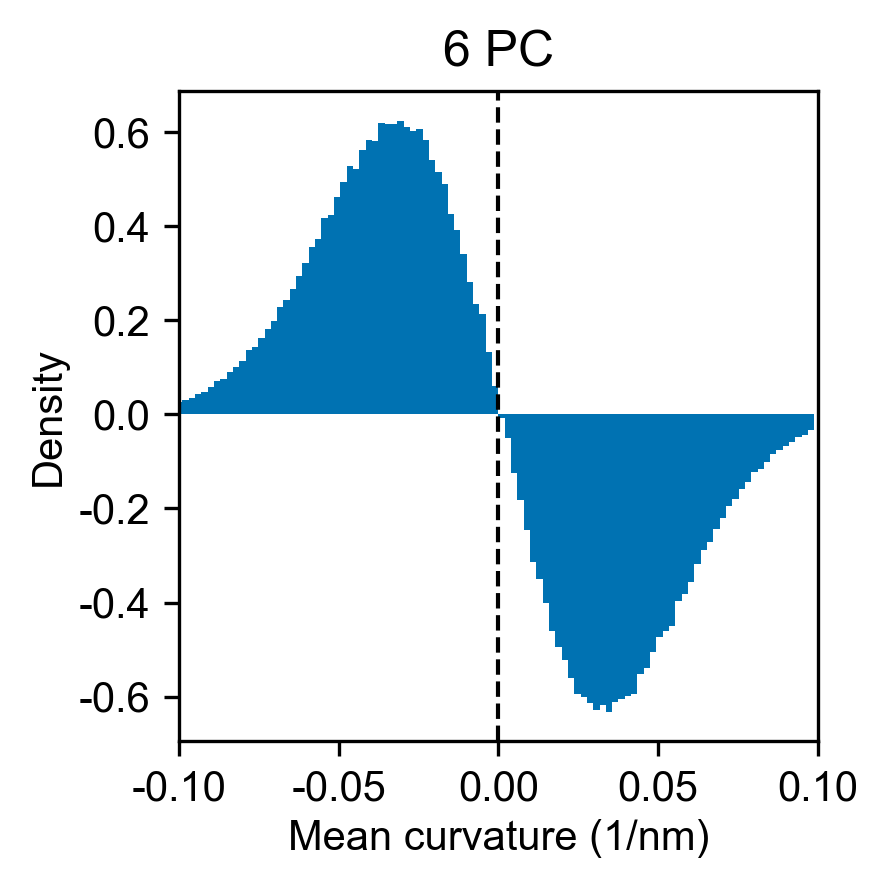

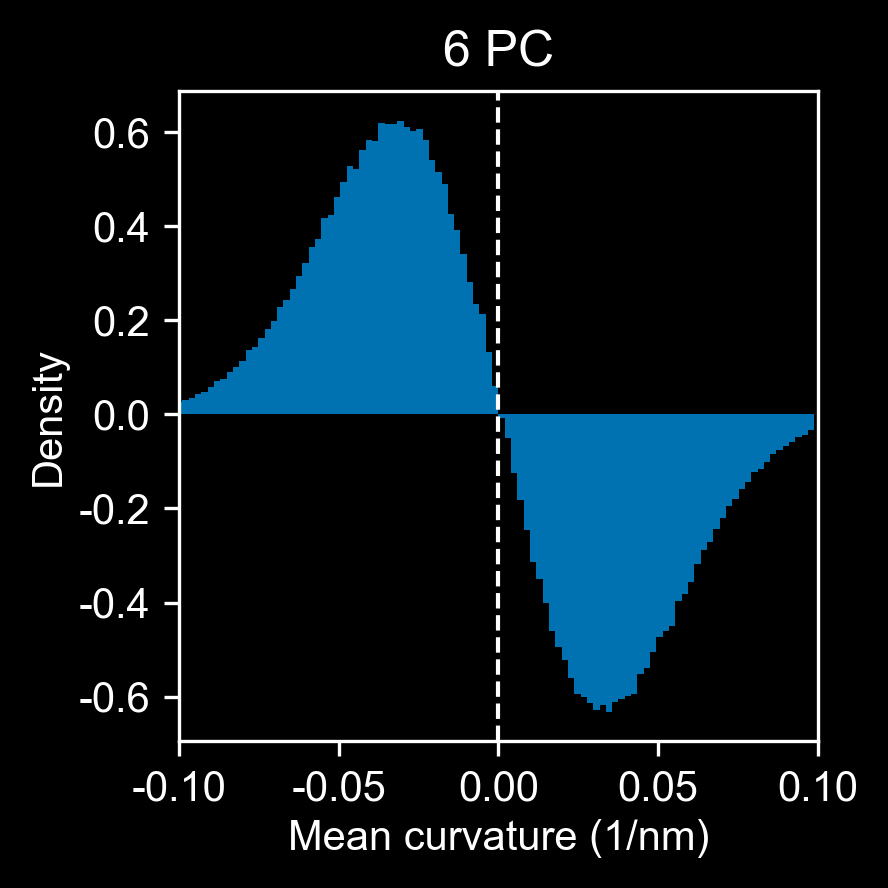

24 Overall mean: 0.001988364843649337; PE mean 0.0031244081279944084


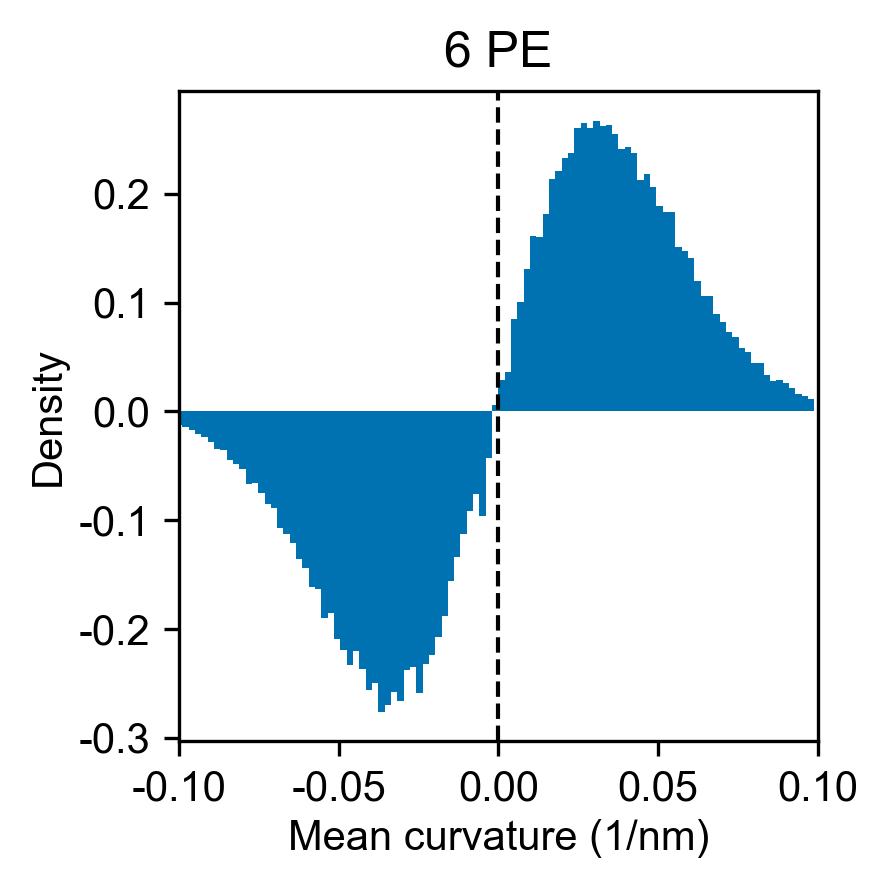

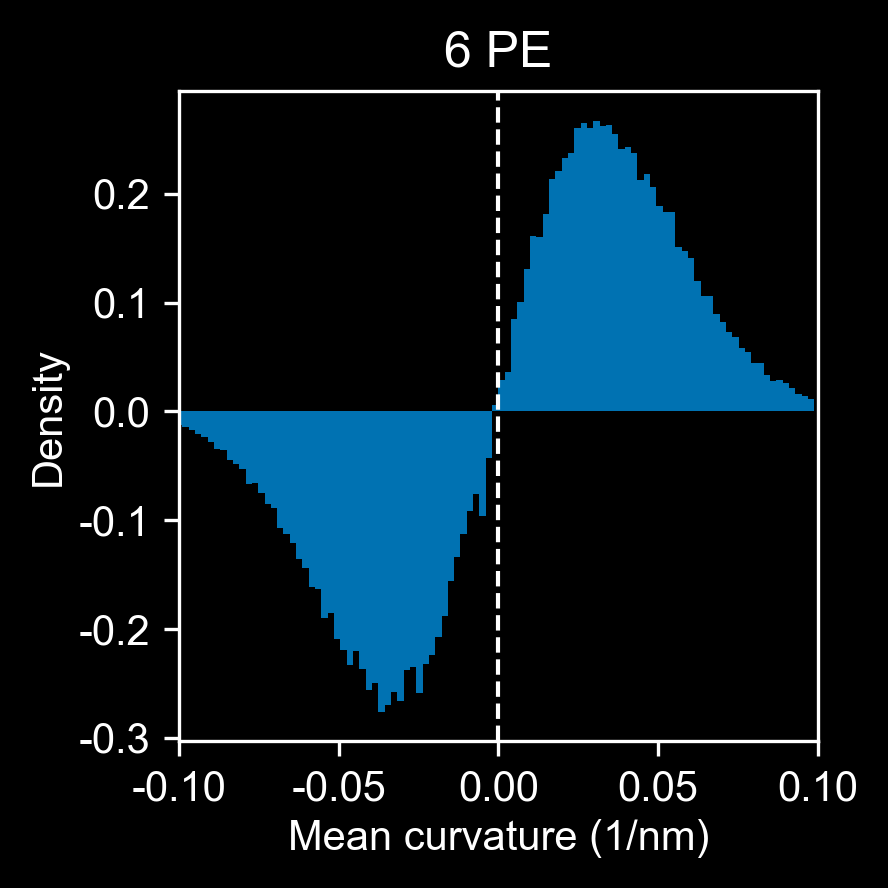

24 Overall mean: 0.001988364843649337; CDL mean 0.007774853491788208


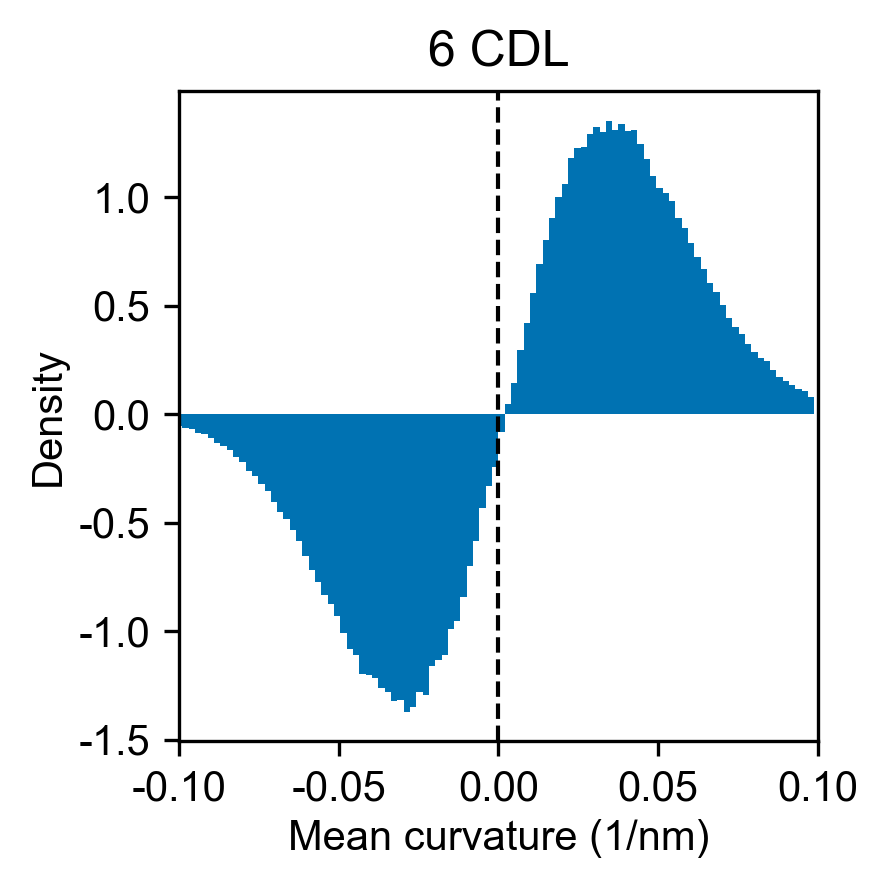

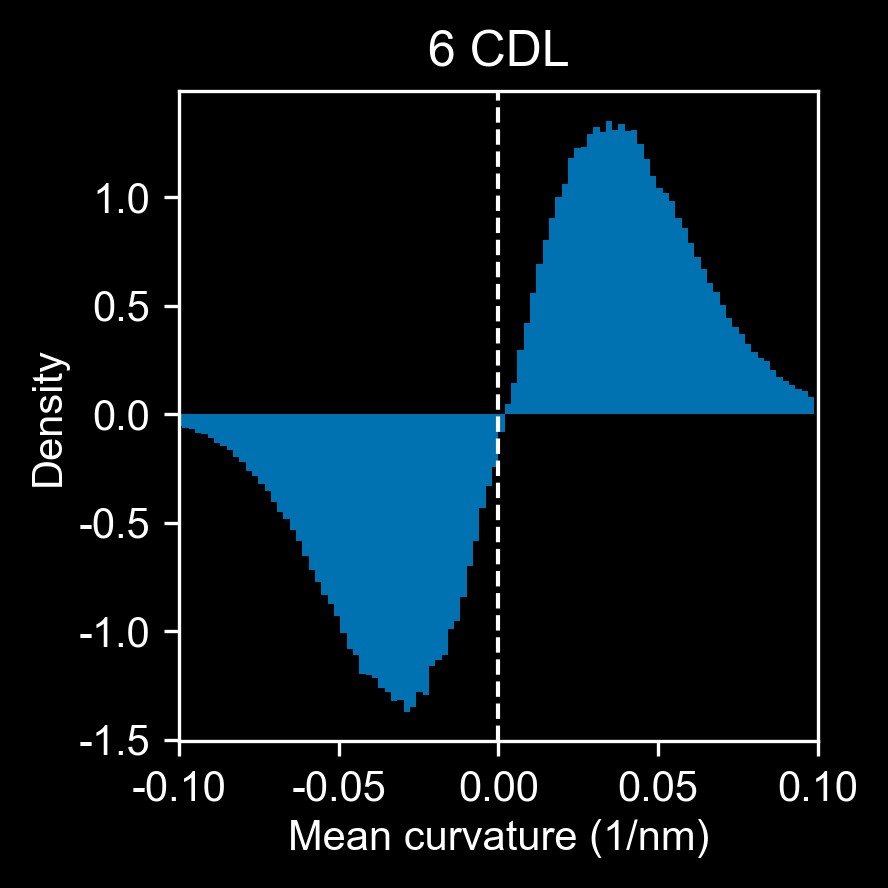

1_vbt Overall mean: 0.002232759972369594; PC mean -0.0004714194539967659


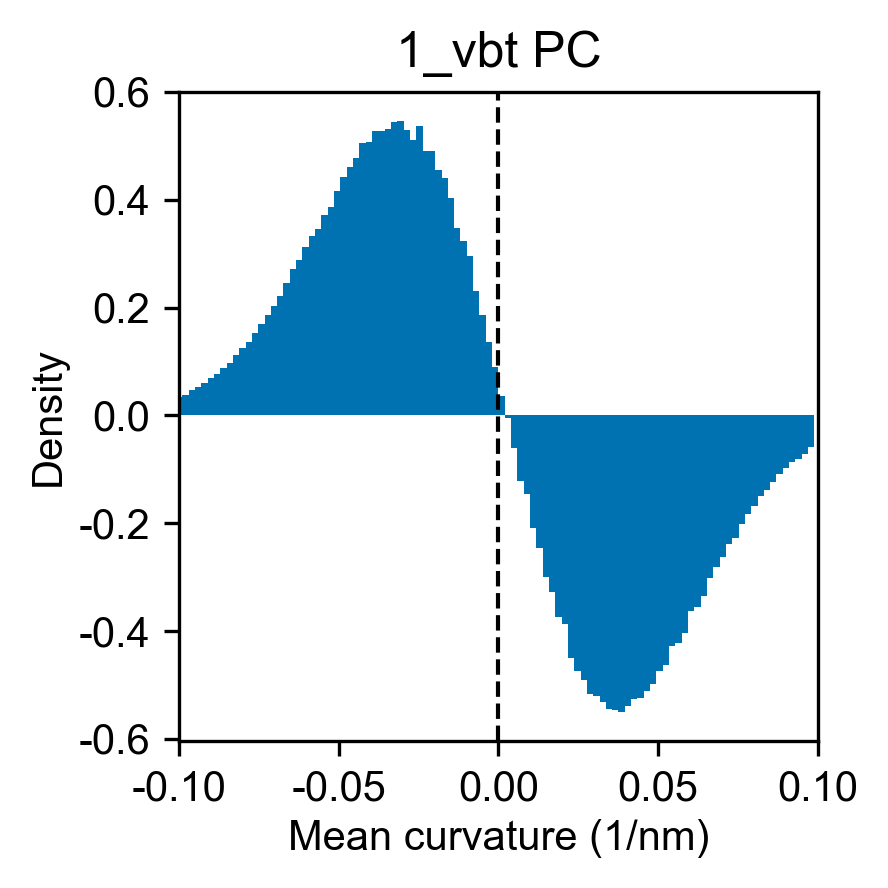

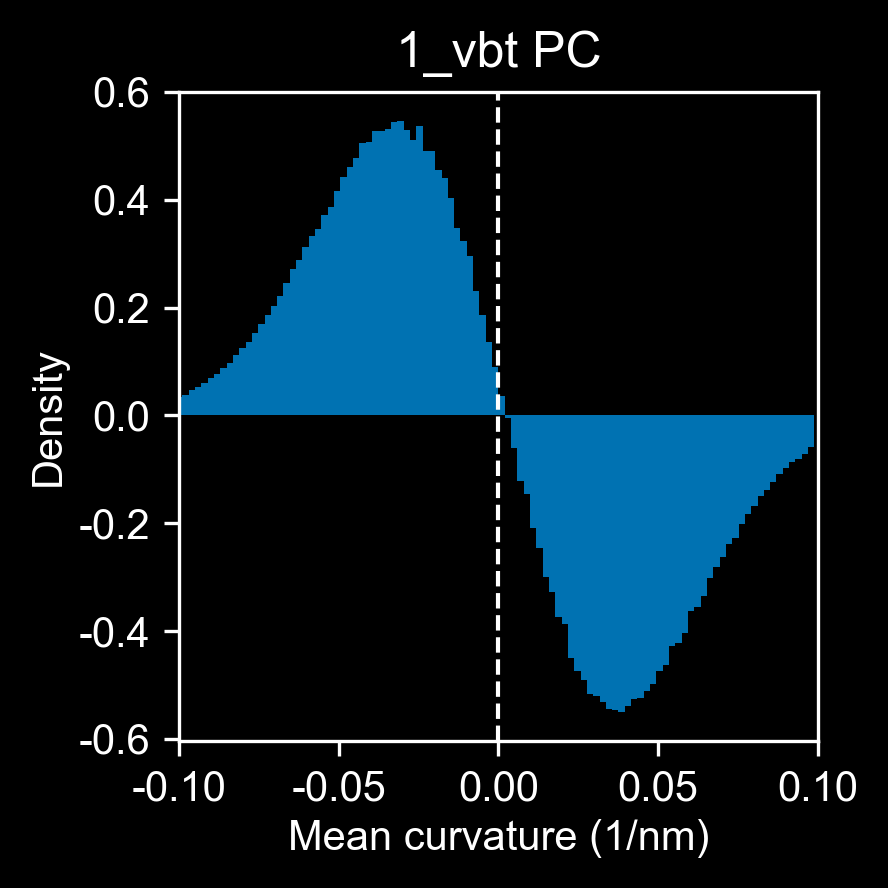

1_vbt Overall mean: 0.002232759972369594; PE mean 0.0037146784307936524


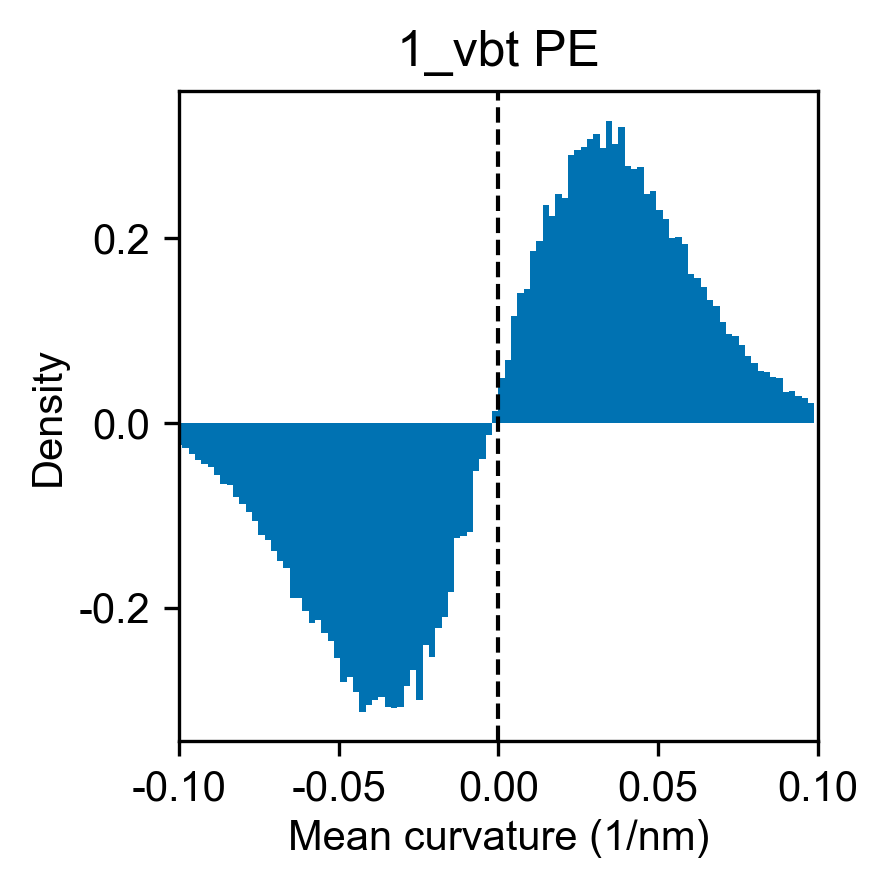

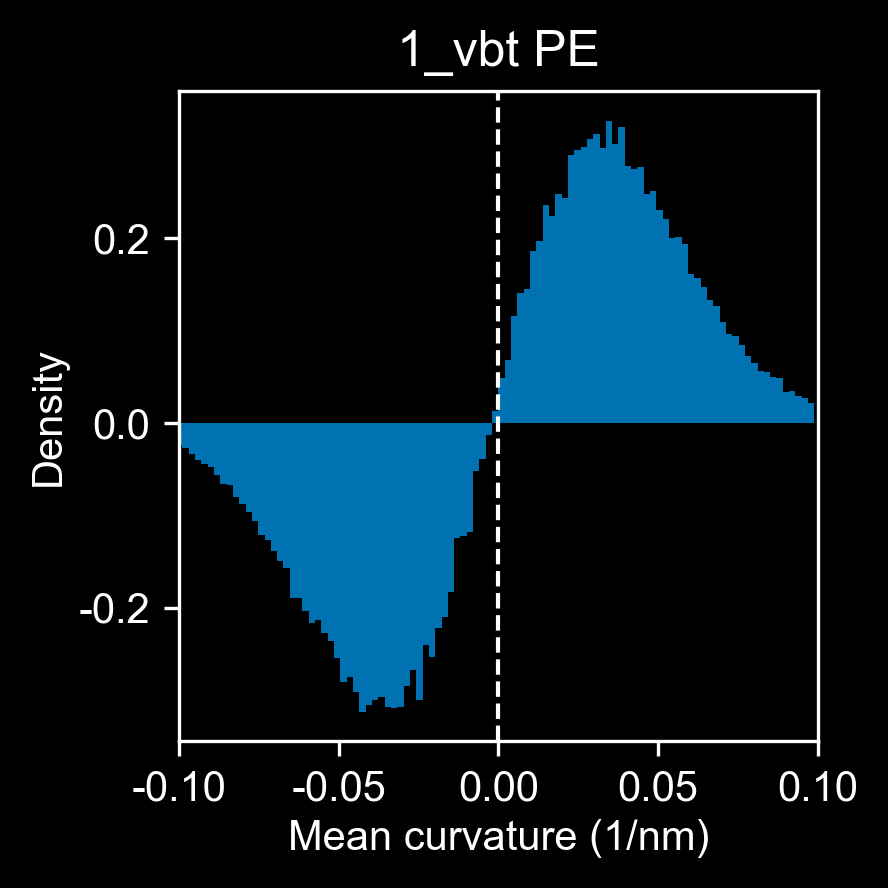

1_vbt Overall mean: 0.002232759972369594; CDL mean 0.011606932744659765


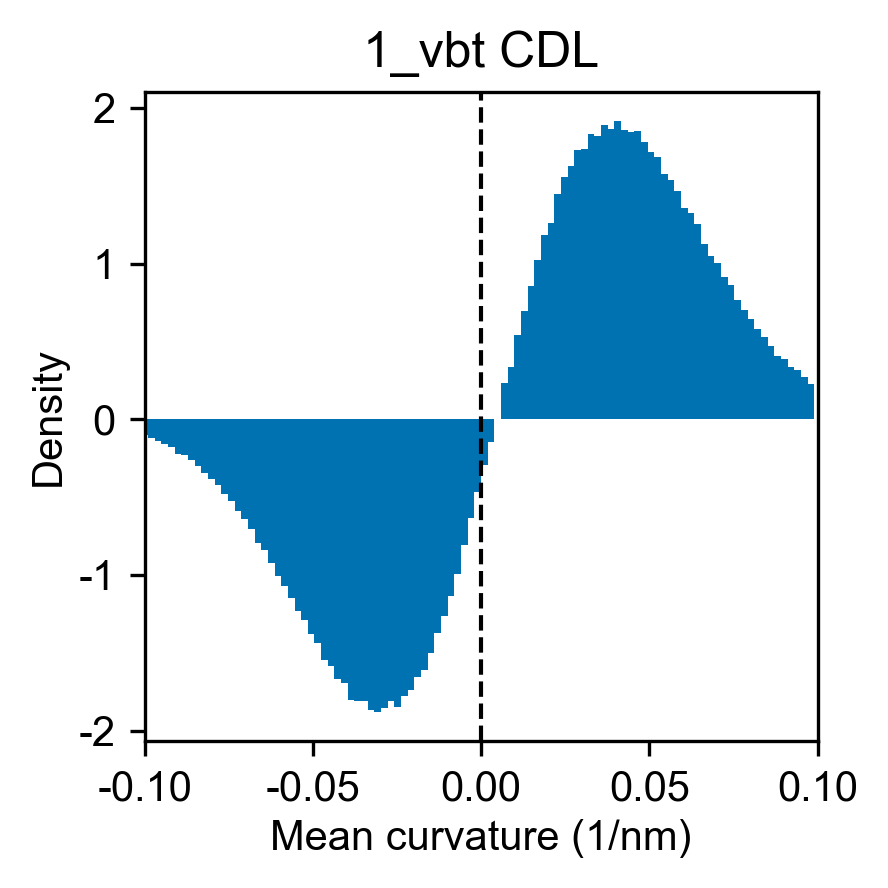

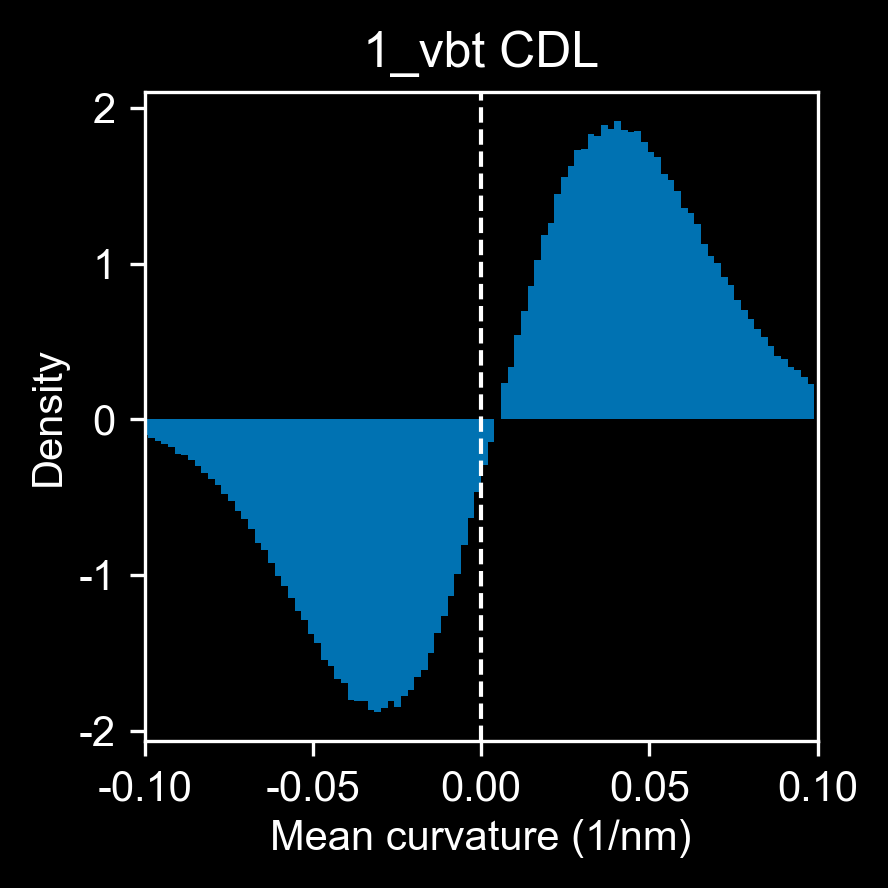

In [5]:
show_figs = True
curr_fig_path = Path("Figures/curvature_histograms_diff")
curr_fig_path.mkdir(parents=True, exist_ok=True)

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]
        bin_range = [-0.1, 0.1]

        hsn, hs_bins = np.histogram(hs, bins=101, range=tuple(bin_range), density=True)
        asn, as_bins = np.histogram(ahs, bins=101, range=tuple(bin_range), density=True)
        print(f"{sim} Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}")

        for style, style_ext in plot_styles:
            with plt.style.context(style):
                if style_ext:
                    ecolor = "white"
                else:
                    ecolor = "black"
                fig, ax = plt.subplots(1, 1, figsize=(3, 3))  # sharex=True,

                # Lipid specific minus all
                ax.bar(hs_bins[:-1], hsn - asn, width=hs_bins[1] - hs_bins[0])
                ax.axvline(0, color=ecolor, linestyle="--", linewidth=1)

                ax.set_xlabel(r"Mean curvature (1/nm)")
                ax.set_ylabel(r"Density")

                if sim == "1_vbt":
                    ax.set_title(f"1_vbt {lipid}")
                else:
                    ax.set_title(f"{util.sim_to_final_index[int(sim)]} {lipid}")
                ax.set_xlim(bin_range)
                # ax.set_ylim(-0.5, 0.5)

                fig.tight_layout()

                if sim == "1_vbt":
                    save_fig(fig, curr_fig_path / f"1_vbt_{lipid}{style_ext}")
                else:
                    save_fig(
                        fig,
                        curr_fig_path
                        / f"{util.sim_to_final_index[int(sim)]}_{lipid}{style_ext}",
                    )

                if show_figs:
                    plt.show()

                fig.clear()
                plt.close(fig)


In [7]:
curvature_first_moment = {}
curvature_zero_moment = {}
curvature_second_moment = {}

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    curvature_zero_moment[sim] = {}
    curvature_first_moment[sim] = {}
    curvature_second_moment[sim] = {}
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]
        bin_range = [-0.1, 0.1]
        hsn, hs_bins = np.histogram(hs, bins=101, range=bin_range, density=True)
        asn, as_bins = np.histogram(ahs, bins=101, range=bin_range, density=True)

        # Lipid specific minus all
        diff = hsn - asn
        bin_centers = ((hs_bins + np.roll(hs_bins, -1)) / 2)[:-1]

        moment = np.sum(diff * bin_centers) * (bin_centers[1] - bin_centers[0])
        second_moment = np.sum(diff * bin_centers * bin_centers) * (
            bin_centers[1] - bin_centers[0]
        )
        curvature_zero_moment[sim][lipid] = np.sum(diff) * (
            bin_centers[1] - bin_centers[0]
        )

        curvature_first_moment[sim][lipid] = moment
        curvature_second_moment[sim][lipid] = second_moment
        if sim != "1_vbt":
            print(
                f"{sim} {util.sim_to_final_index[int(sim)]} moment: {moment}; Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}"
            )
        else:
            print(
                f"{sim} moment: {moment}; Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}"
            )


1 1 moment: -0.002704890890815208; Overall mean: 0.002261808074561688; PC mean -0.0005740728491340568
1 1 moment: 0.0014591416129029608; Overall mean: 0.002261808074561688; PE mean 0.0037789871539560932
1 1 moment: 0.009469760941178223; Overall mean: 0.002261808074561688; CDL mean 0.01219562336374424
2 2 moment: -0.0030249347725432403; Overall mean: 0.002226541334229931; PC mean -0.0009355962844656776
2 2 moment: 0.0010766987709031027; Overall mean: 0.002226541334229931; PE mean 0.003347573092968328
2 2 moment: 0.009549467287842065; Overall mean: 0.002226541334229931; CDL mean 0.01219952464404505
3 -3 moment: -0.0026248577404992487; Overall mean: 0.00209896589240203; PC mean -0.0006310653106858711
3 -3 moment: 0.0012758048102108996; Overall mean: 0.00209896589240203; PE mean 0.00341697326010026
3 -3 moment: 0.008851400690790111; Overall mean: 0.00209896589240203; CDL mean 0.011310431801862506
4 7 moment: -0.0008010860372521691; Overall mean: 0.0016949382257829726; PC mean 0.00088141785

In [8]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


light_factor = 0.8

p = sns.color_palette("colorblind")

# palette = [lighten_color(p[i], j) for i, j in [(7, 1),(7, light_factor),(8,1),(8,light_factor),(0,1),(0,light_factor),(2,1),(2,light_factor)]]

# sns.palplot(palette)
# sns.palplot(p)


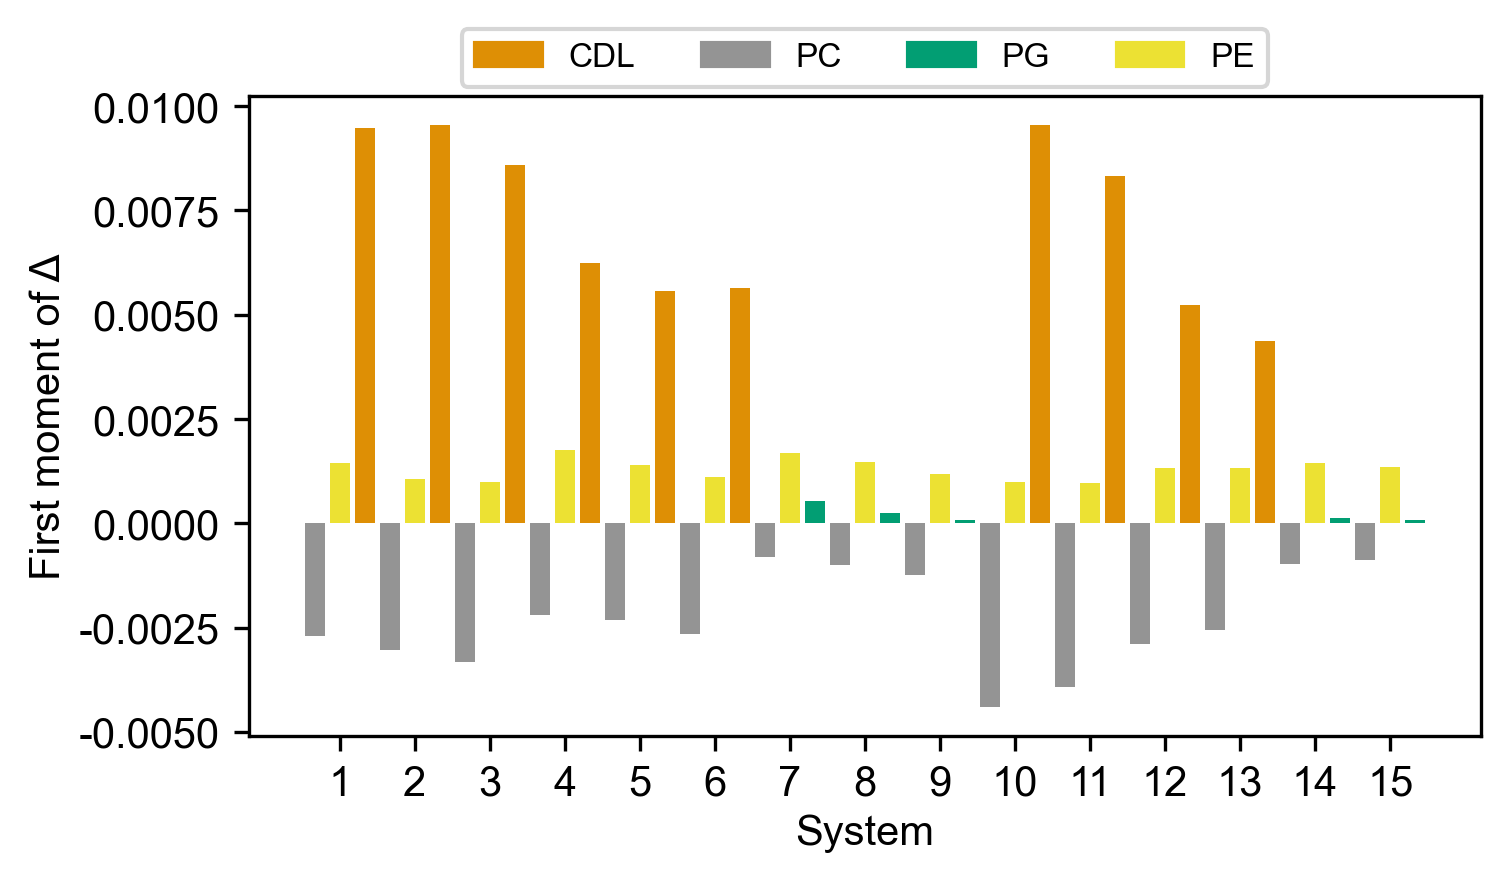

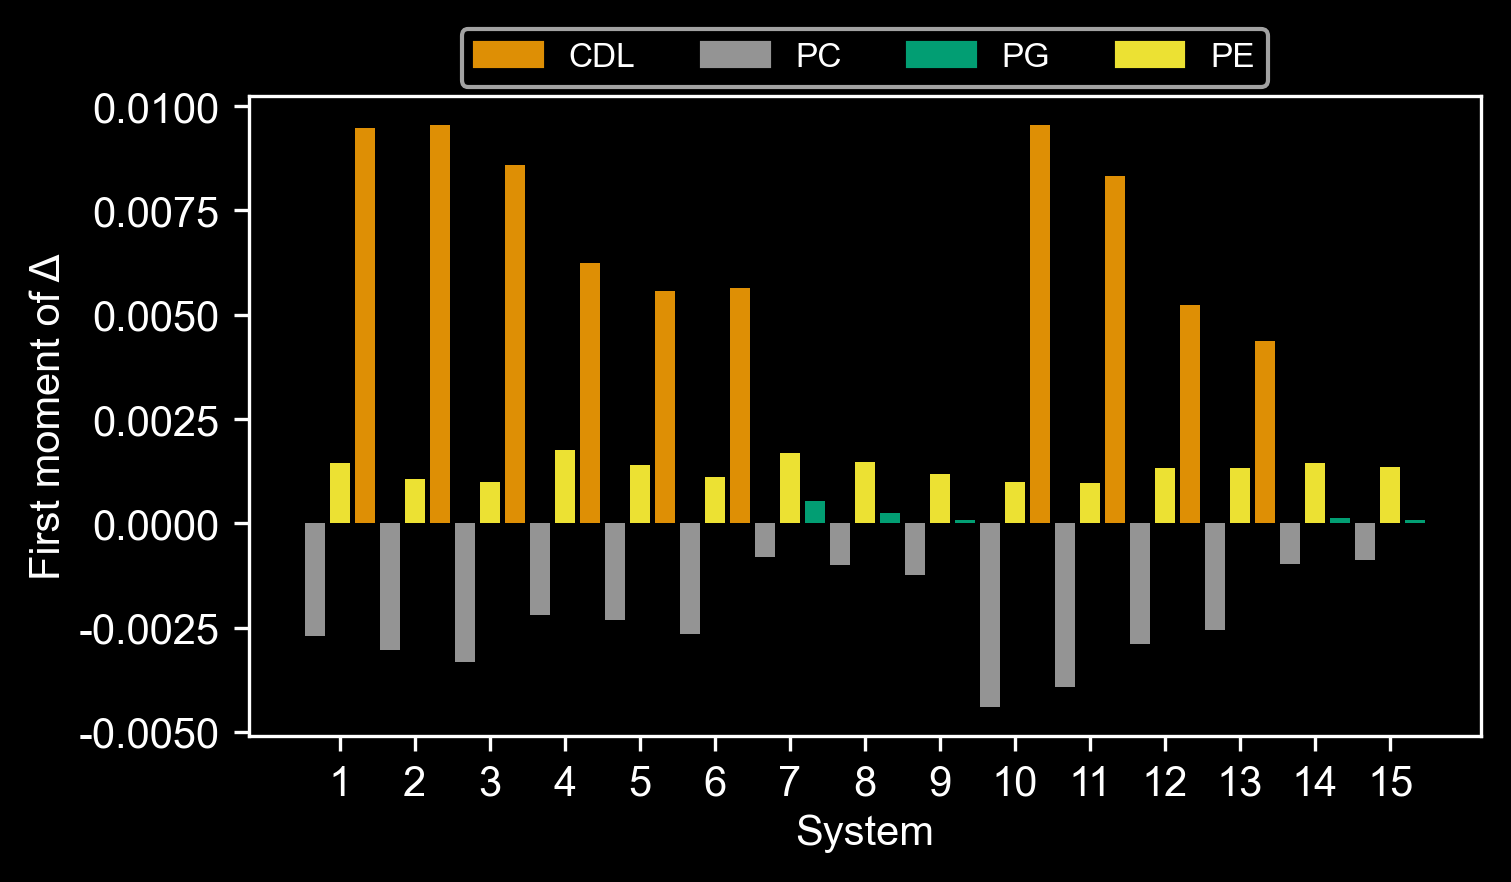

In [9]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_first_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_first_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("First moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"first_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)


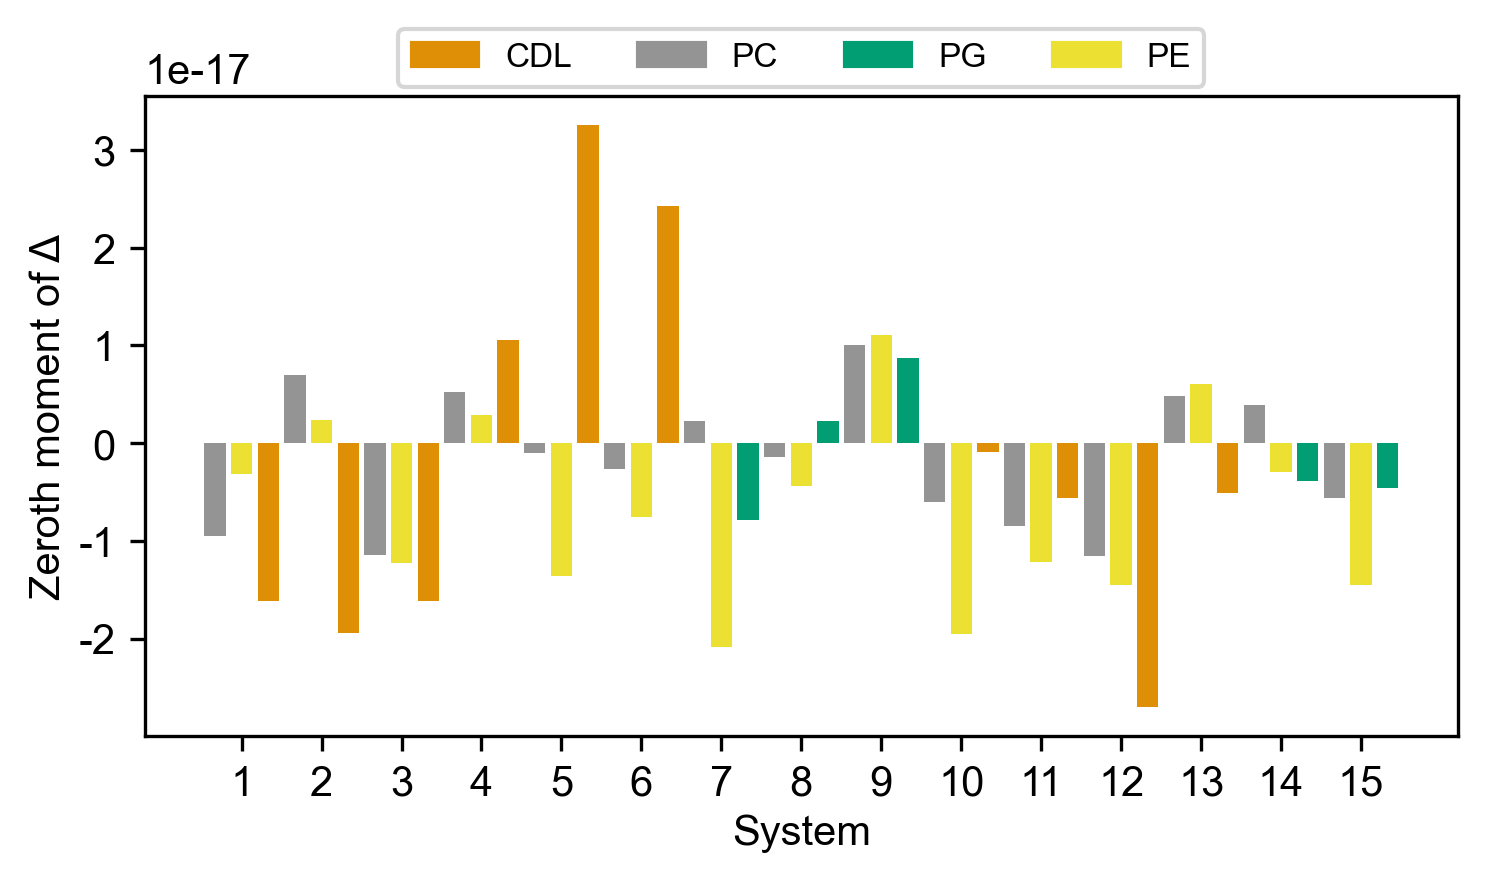

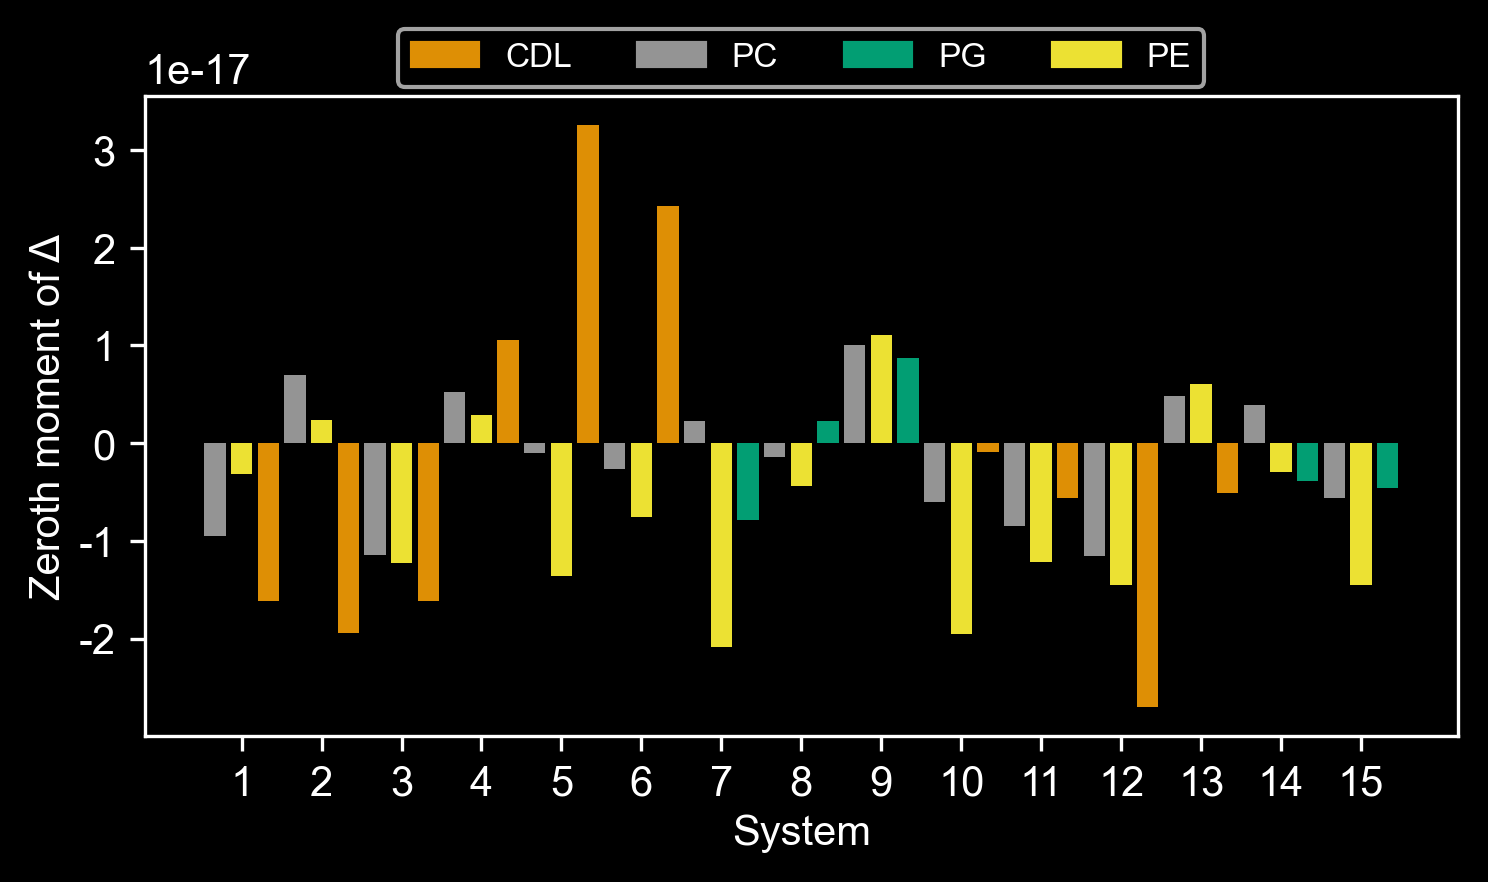

In [10]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_zero_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_zero_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("Zeroth moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"zero_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)


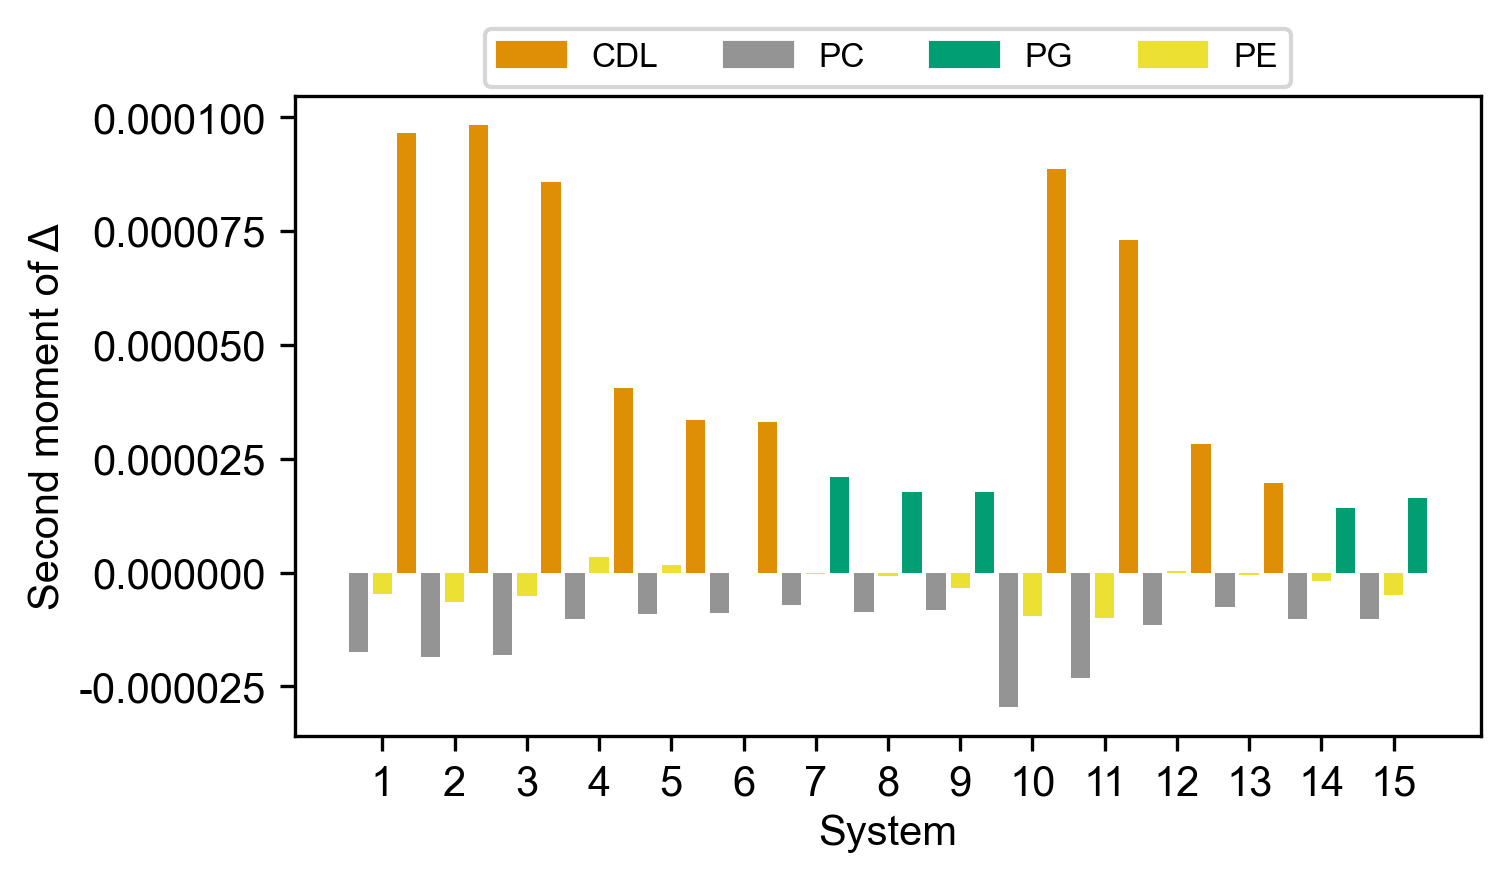

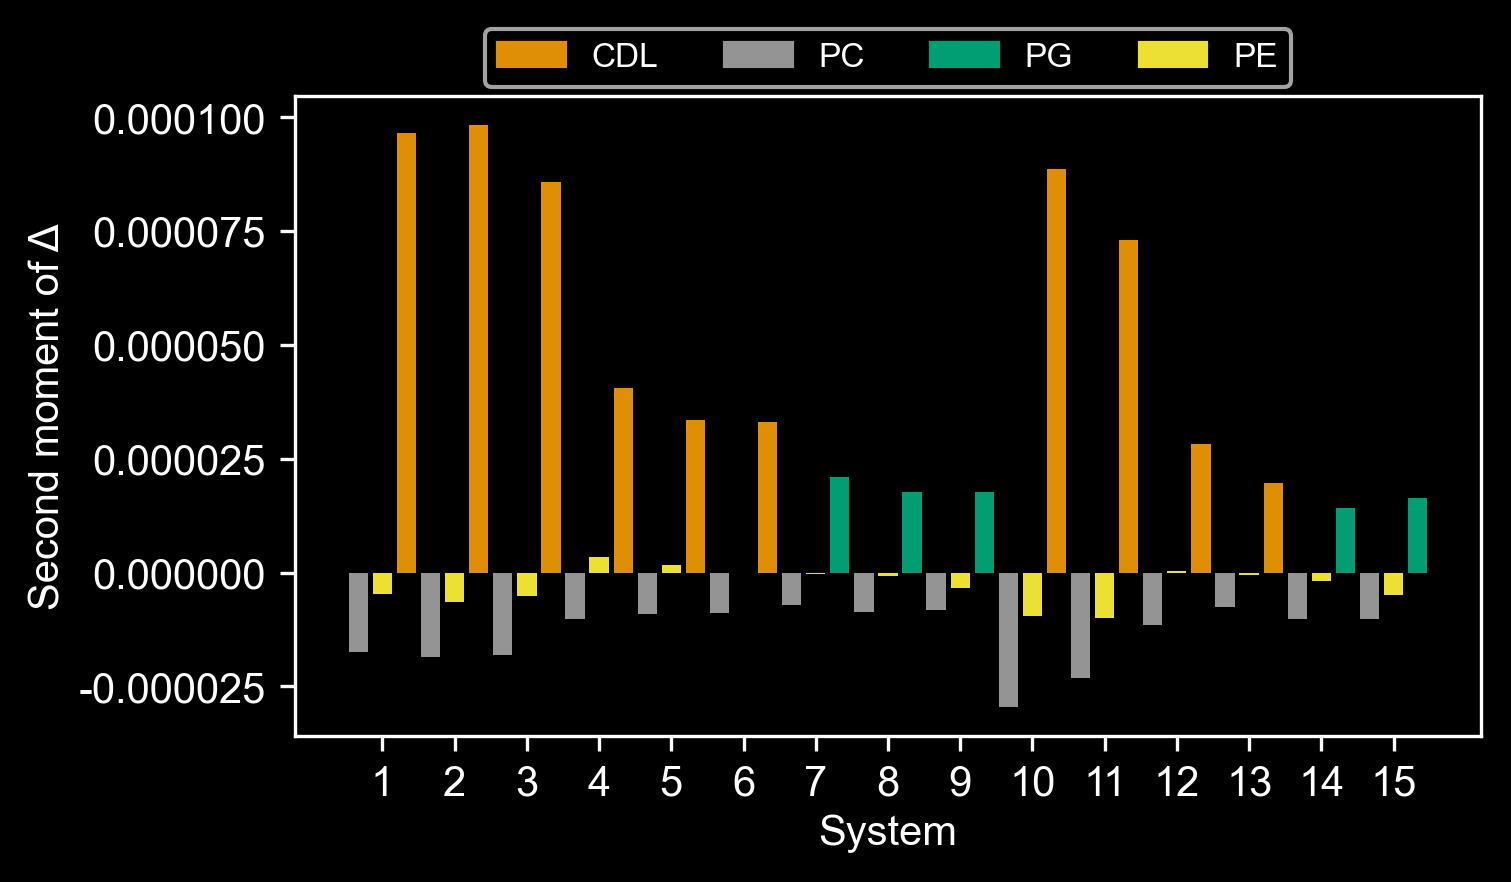

In [11]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_second_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_second_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("Second moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"second_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)
